In [1]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019




In [2]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = False
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/'
project_name = "paper_epo"
costumized_glycan_identifier = True
external_profile_naming= True
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'project_name': 'paper_epo',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/source_data/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_substructure_glycoct_dict.json',
 'substruct

In [3]:
# meta_name = pd.read_excel(os.path.join(working_addr,'source_data','abundance_table.xlsx'), sep='\t', )
# reload(pipeline_functions)
meta_name = pd.read_excel(os.path.join(working_addr,'source_data','abundance_table.xlsx'), sep='\t')
structure_loader = meta_name['glycan_id'].tolist()

data_type = 'local_glycoct'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)

# glycan_dict = glycan_io.load_glycan_dict_from_json(keywords_dict['glycan_glycoct_dict_addr'])
# structure_loader = meta_name['glycan_id'].tolist()
meta_name = meta_name.fillna(0)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/source_data/glycoct/
Saved /Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json for future use. You can use "used" in the datatype next time


In [4]:
print(glycan_dict.keys())

dict_keys(['1375.1', '1417.1', '1580.1', '1591.1', '1662.1', '1754.1', '1795.1', '1836.1', '2040.2', '2040.1', '2070.1', '2081.2', '2081.1', '2156.1', '2244.2', '2244.1', '2244.3', '2285.1', '2326.1', '2401.1', '2401.2', '2489.1', '2530.1', '2605.3', '2605.1', '2605.4', '2605.2', '2605.5', '2646.1', '2693.5', '2693.3', '2693.4', '2693.1', '2734.1', '2792.1', '2892.1', '2939.1', '2967.2', '2967.1', '2967.3', '3055.2', '3055.3', '3055.1', '3055.4', '3096.1', '3143.2', '3212.1', '3242.2', '3388.1', '3416.5', '3416.3', '3416.1', '3416.4', '3416.2', '3457.1', '3504.1', '3504.3', '3504.2', '3592.2', '3605.1', '3661.1', '3777.1', '3777.2', '3865.1', '3865.2', '3865.3', '3953.1', '4022.1', '4041.1', '4052.1', '4226.3', '4226.2', '4226.1', '4314.1', '4402.1', '4413.1', '4490.1', '4587.1', '4675.2', '4675.3', '4675.1', '4763.1', '4851.1', '4862.1', '5037.2', '5037.1', '5312.1', '5486.2', '5486.1'])


5


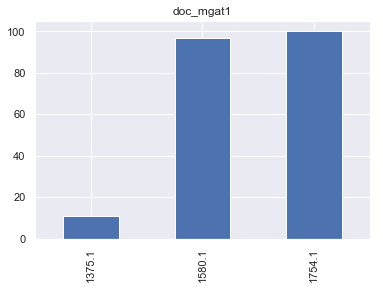

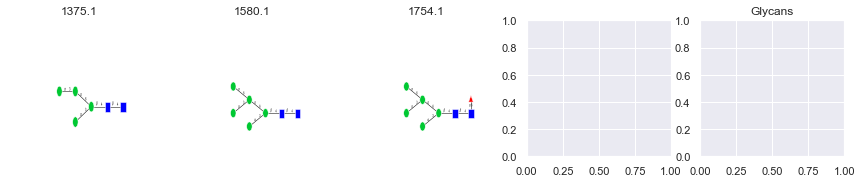

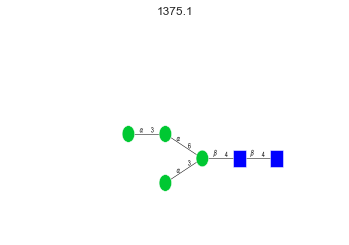

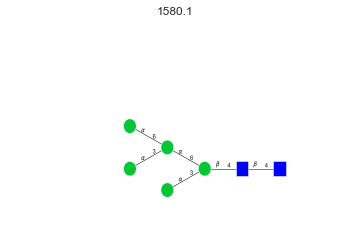

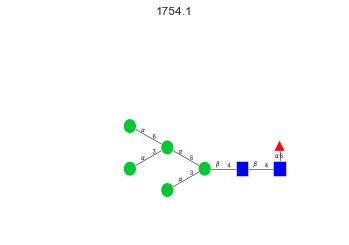

6


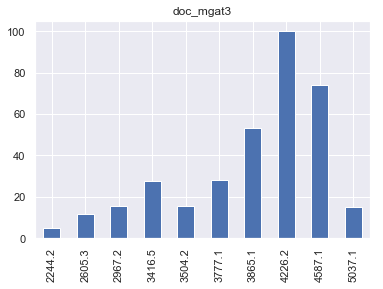

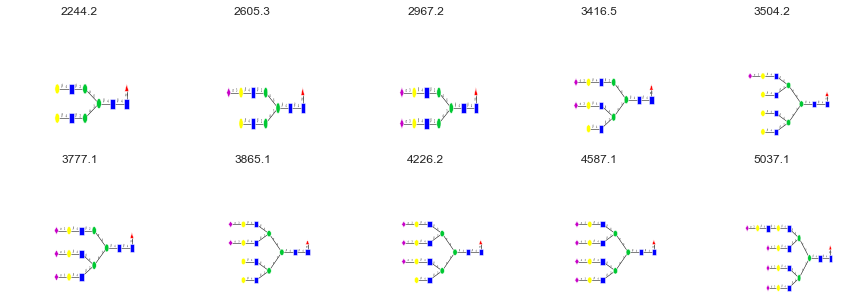

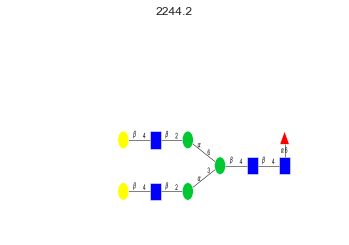

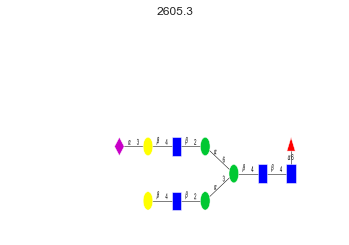

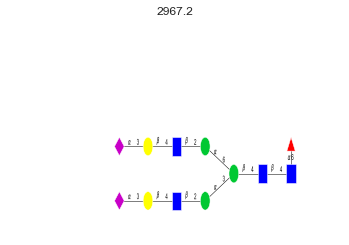

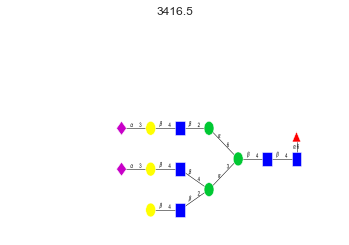

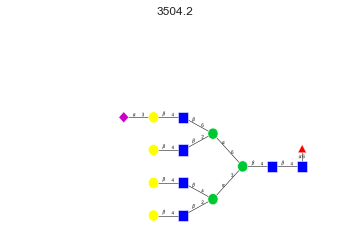

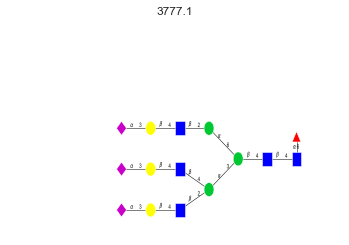

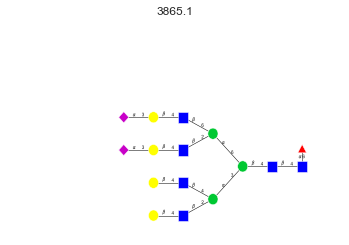

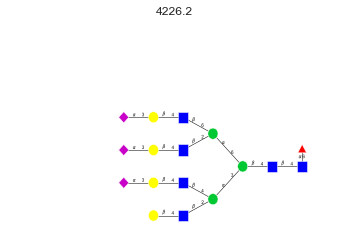

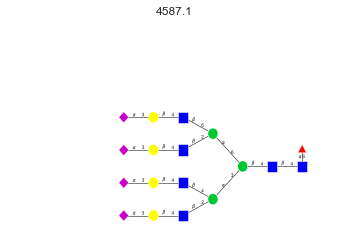

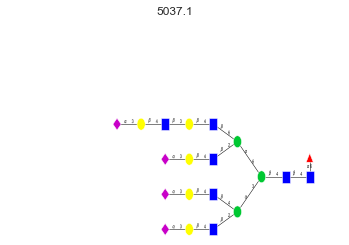

7


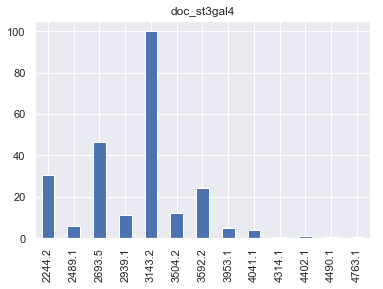

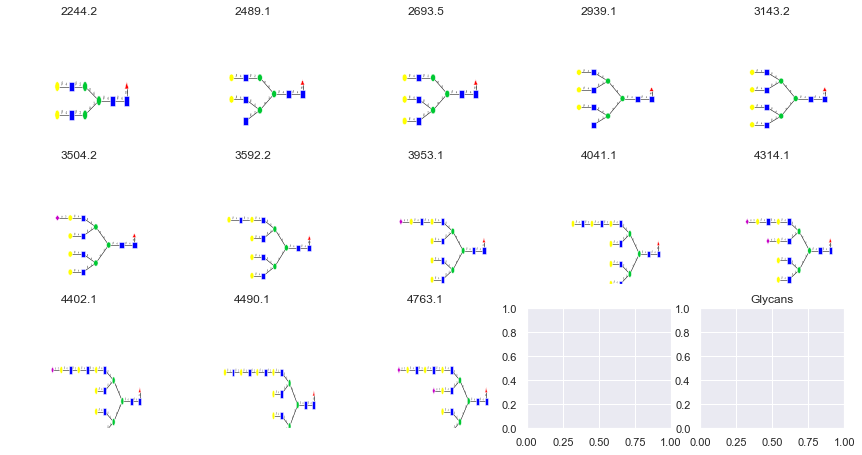

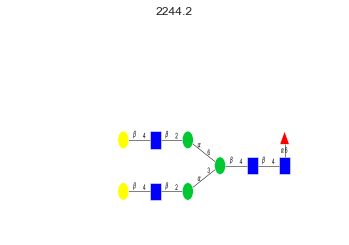

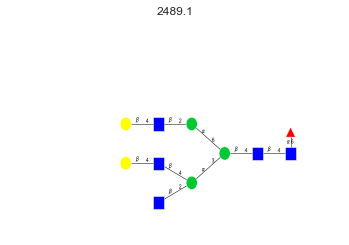

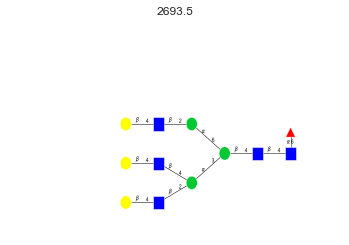

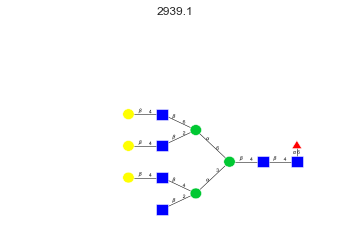

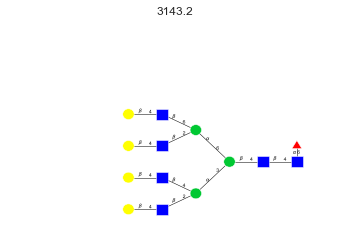

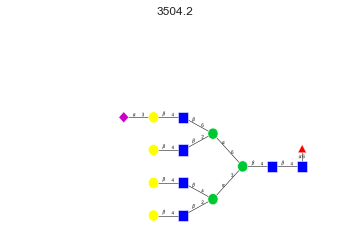

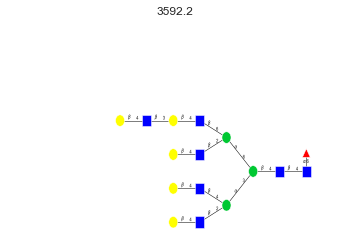

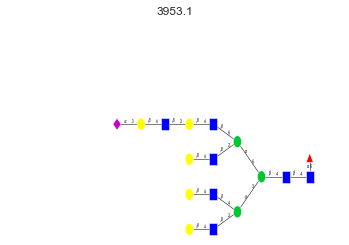

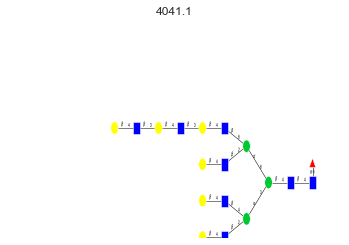

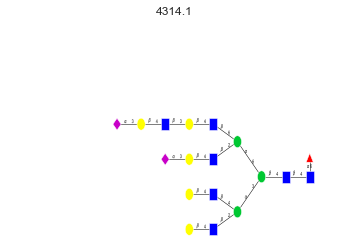

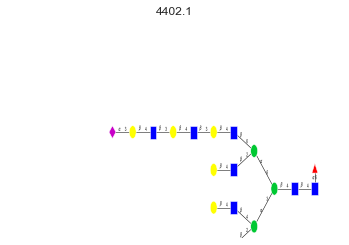

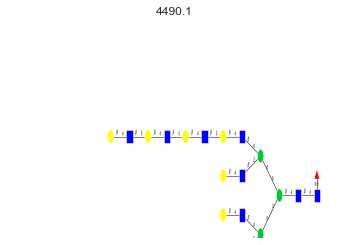

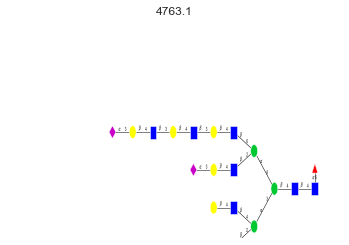

8


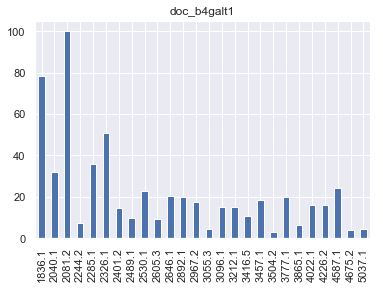

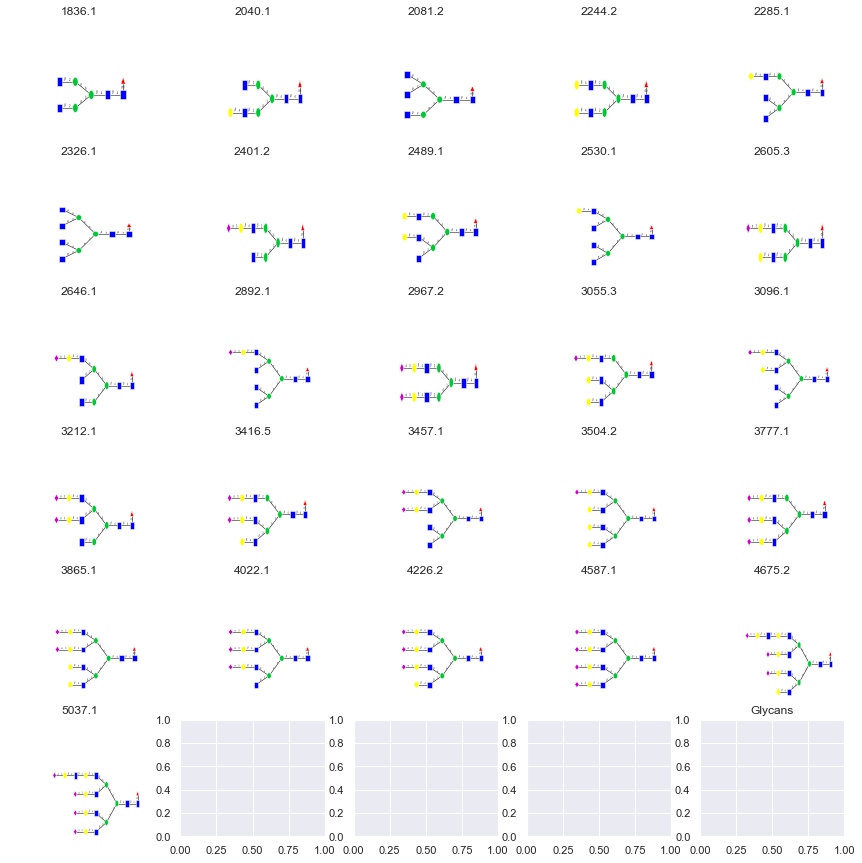

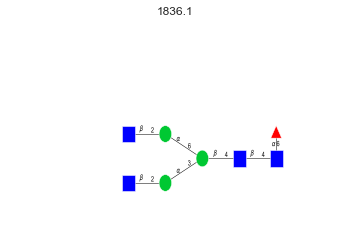

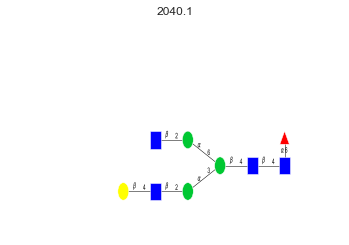

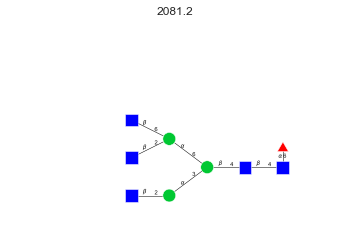

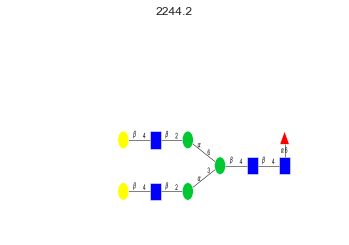

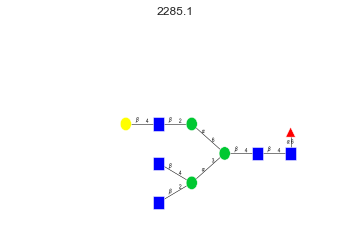

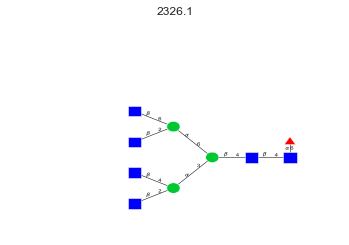

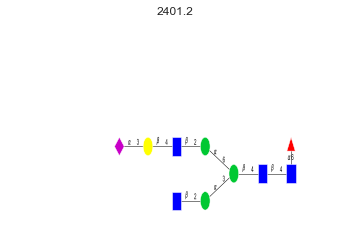

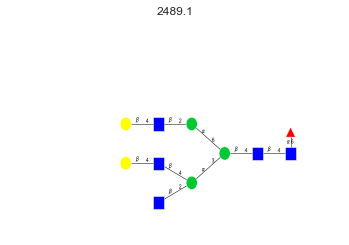

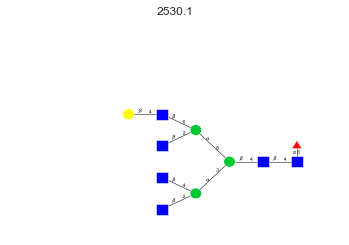

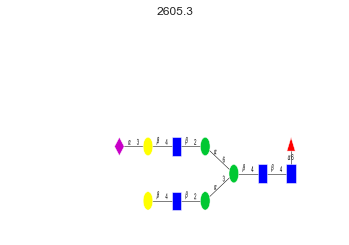

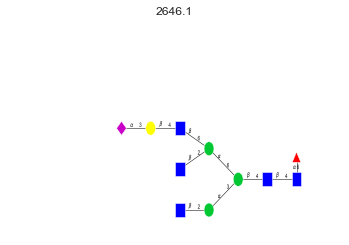

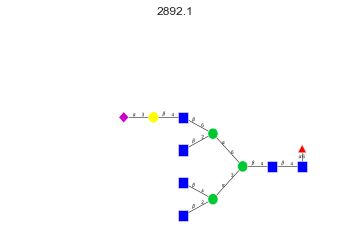

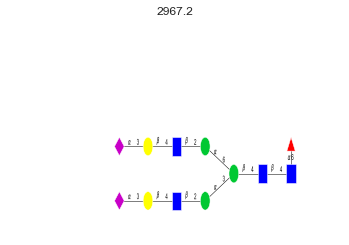

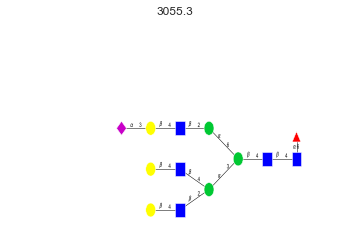

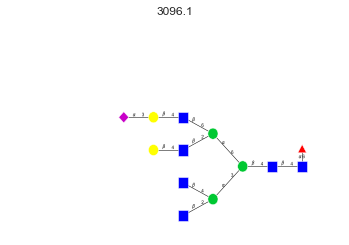

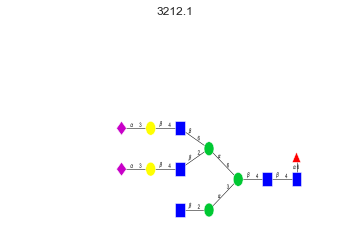

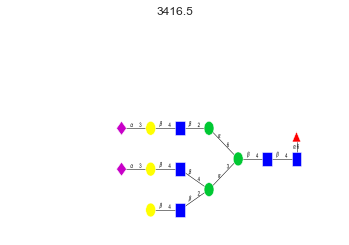

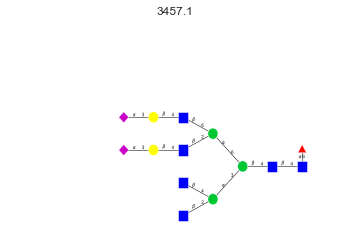

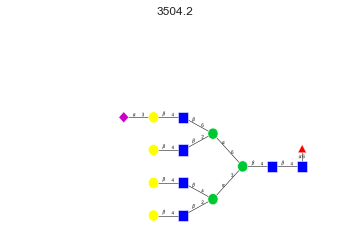

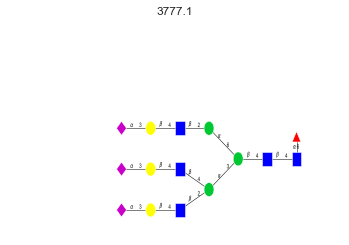

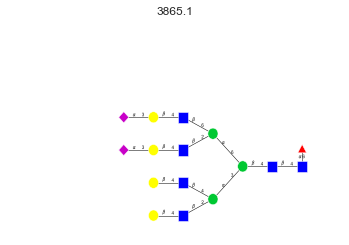

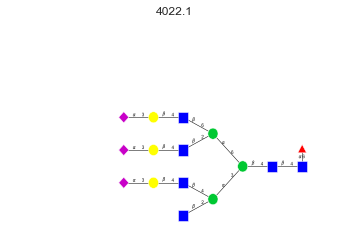

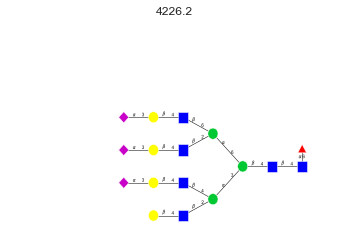

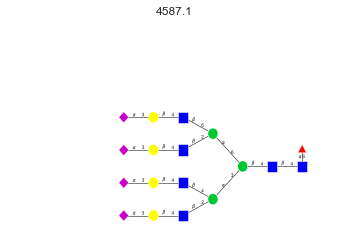

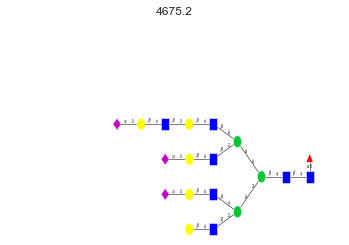

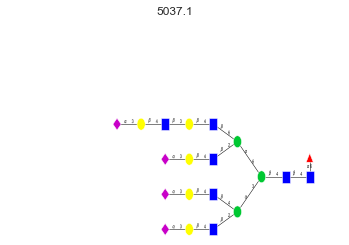

9


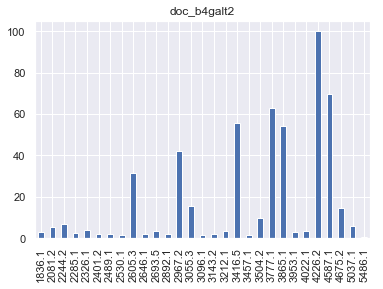

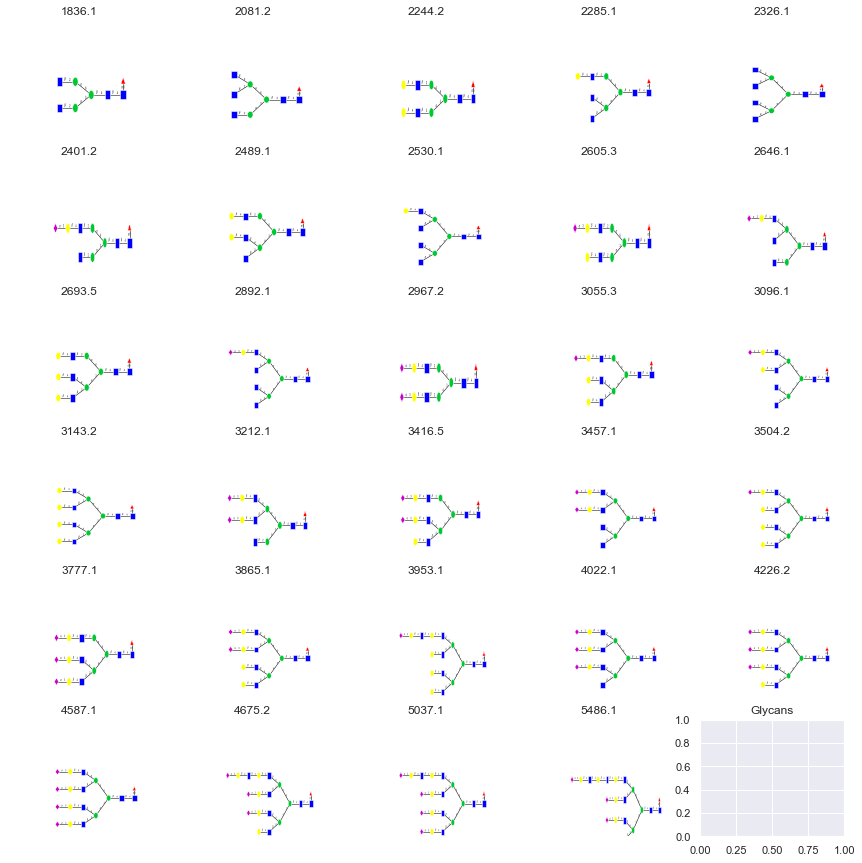

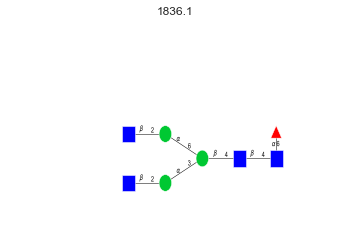

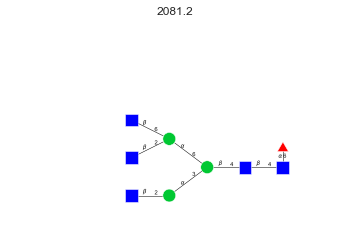

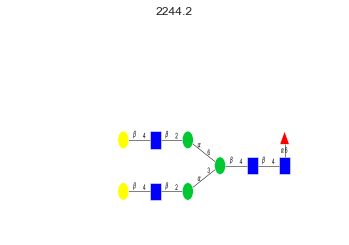

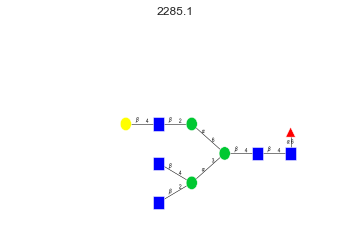

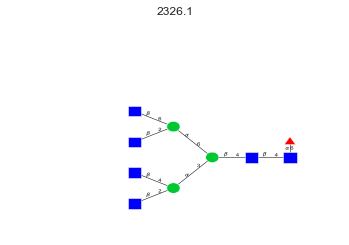

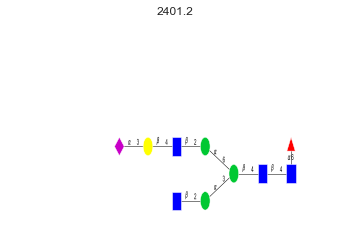

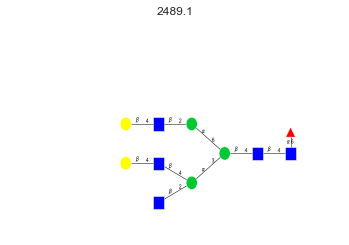

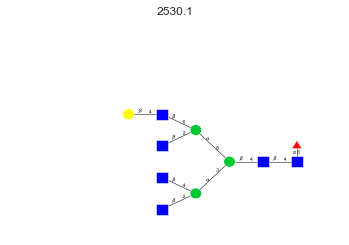

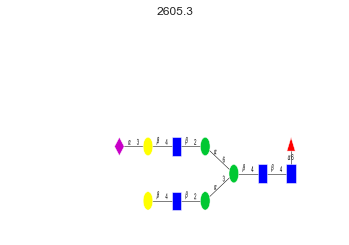

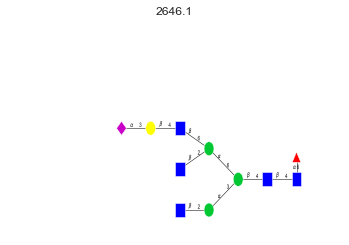

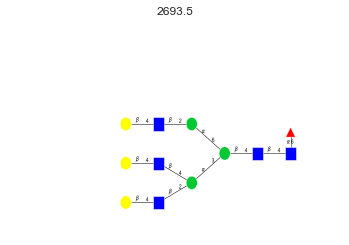

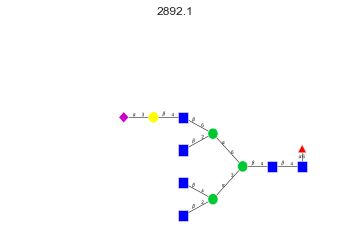

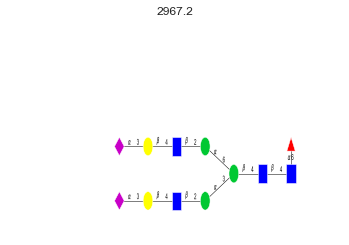

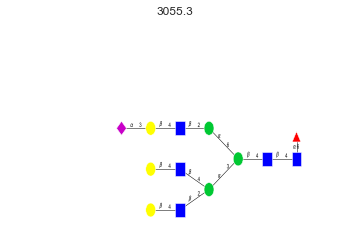

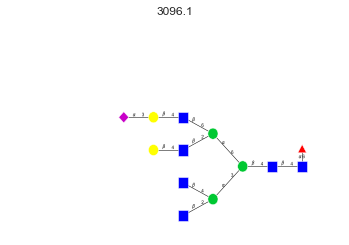

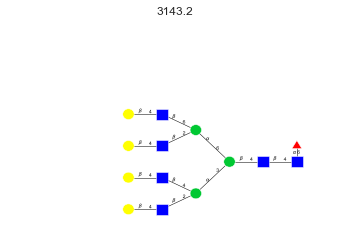

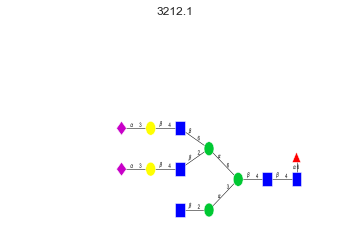

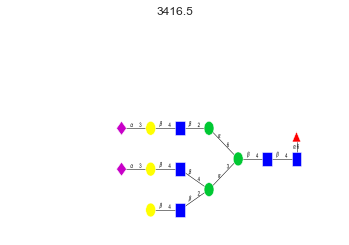

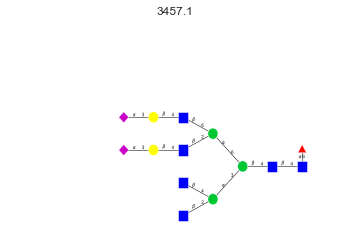

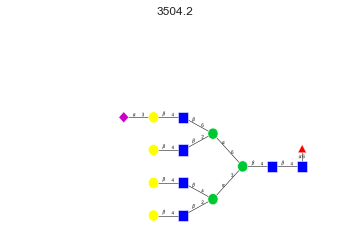

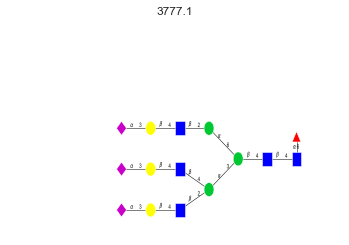

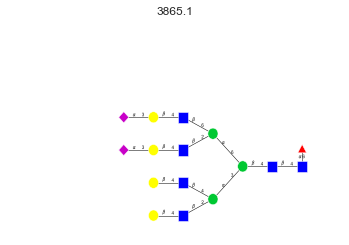

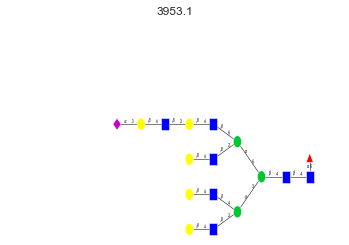

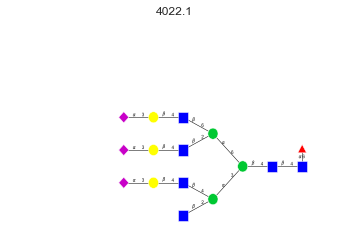

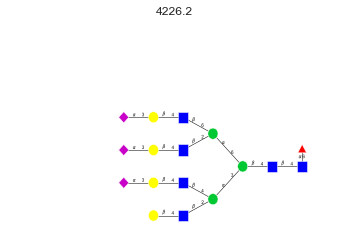

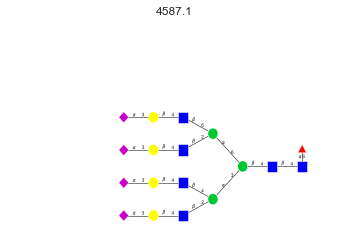

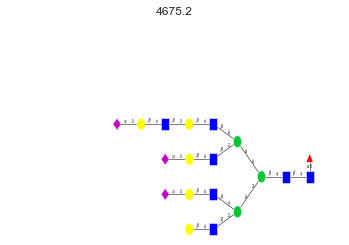

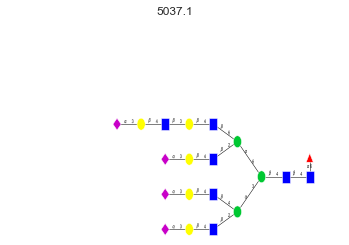

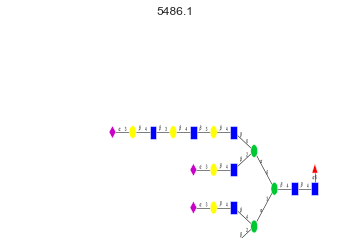

10


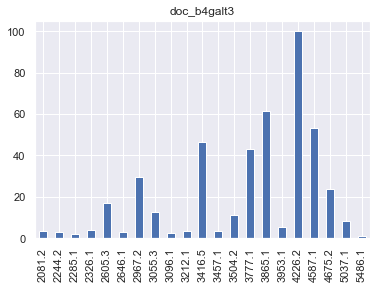

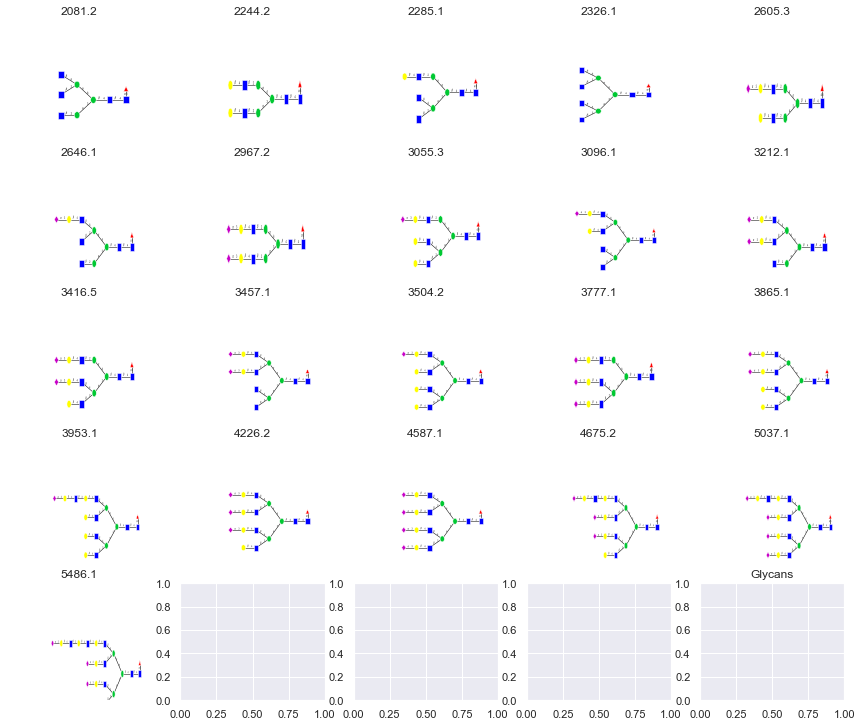

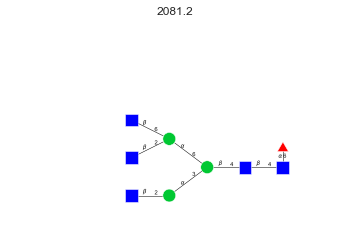

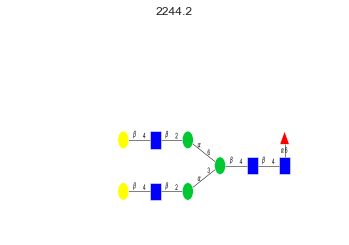

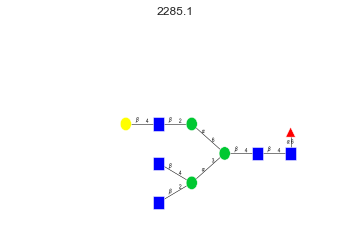

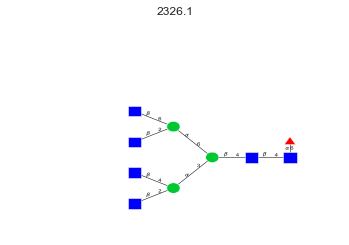

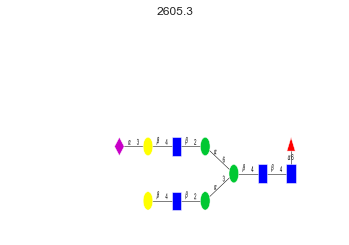

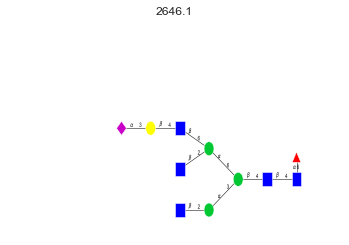

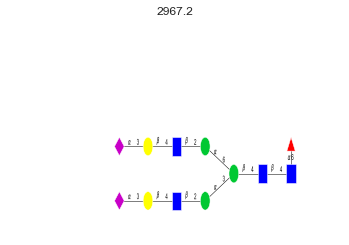

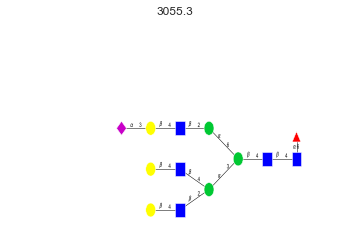

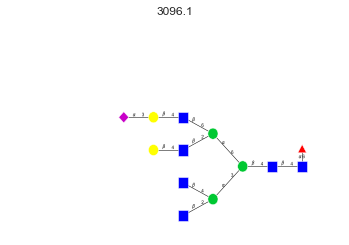

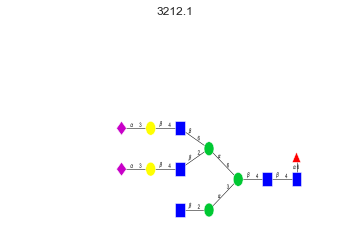

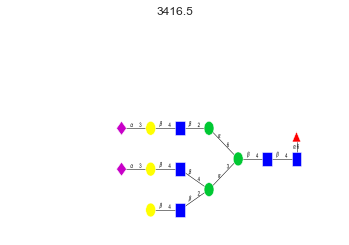

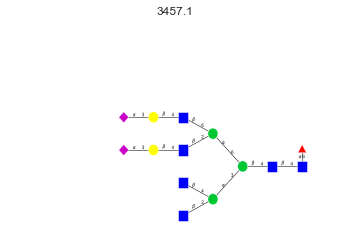

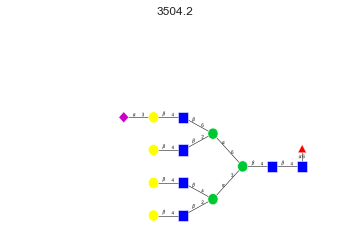

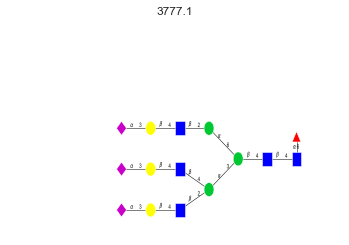

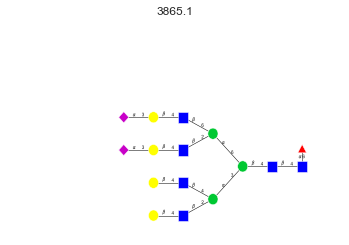

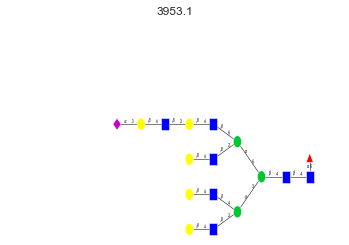

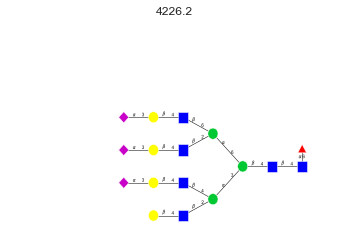

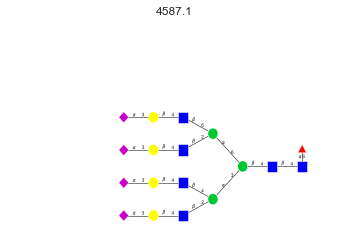

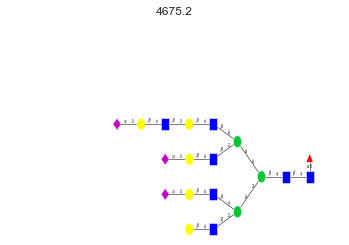

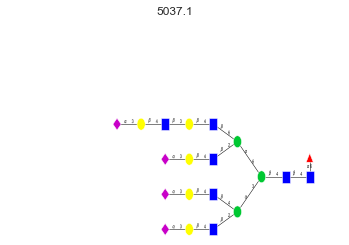

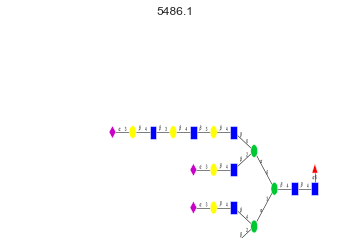

11


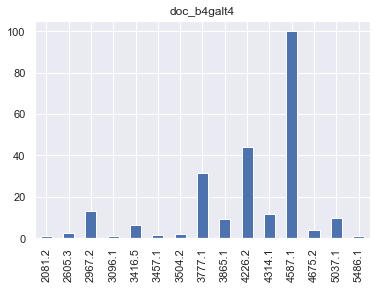

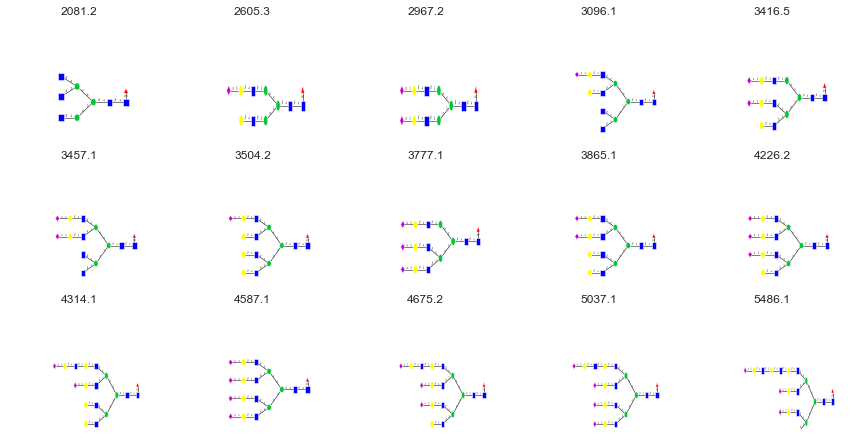

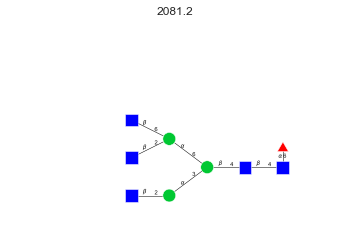

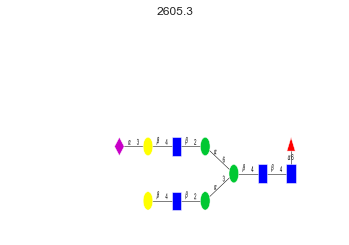

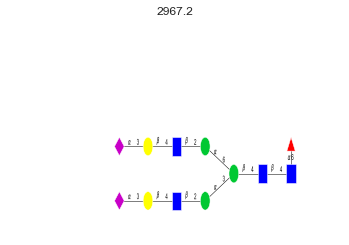

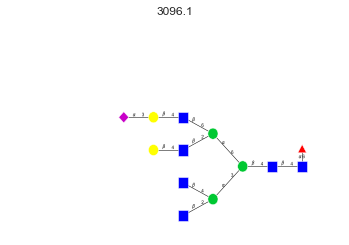

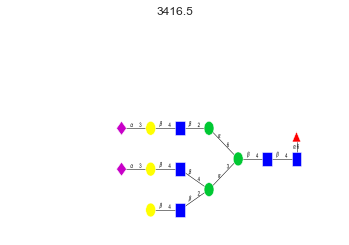

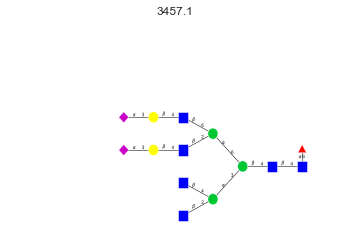

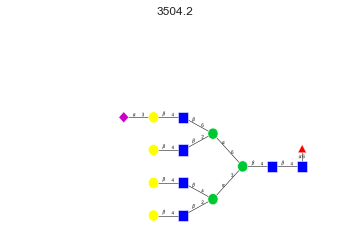

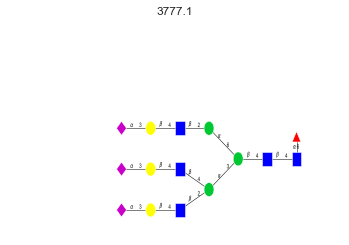

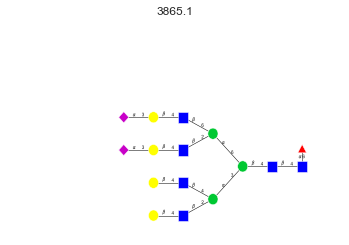

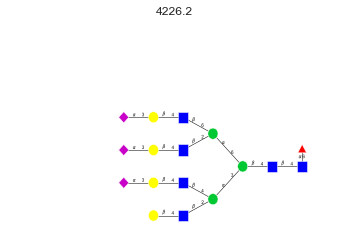

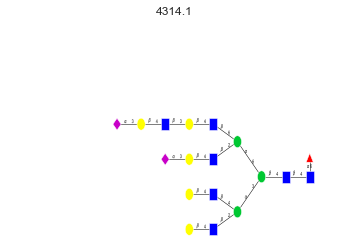

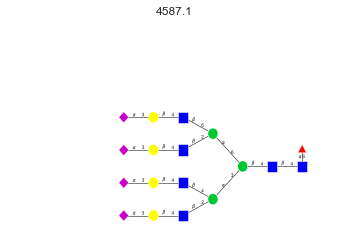

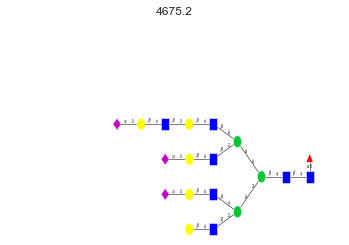

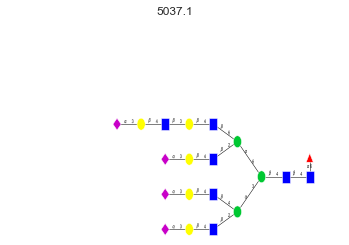

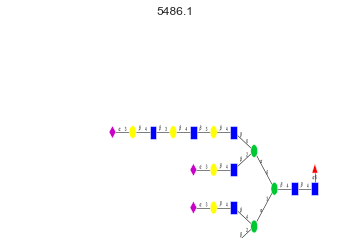

12


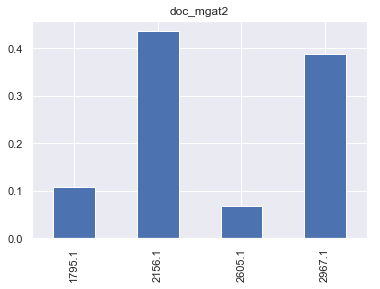

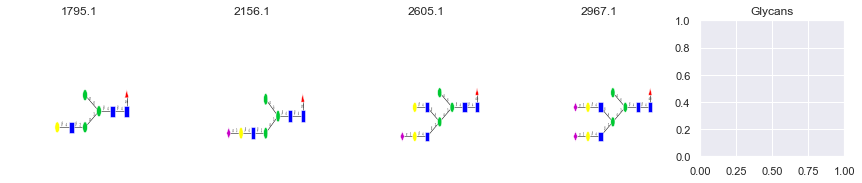

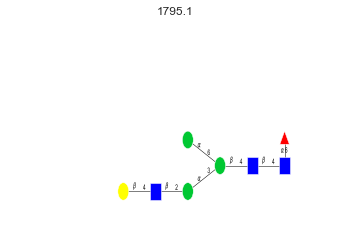

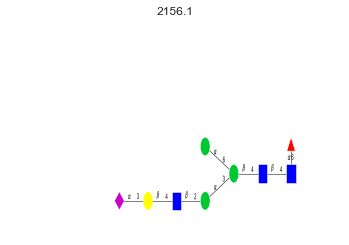

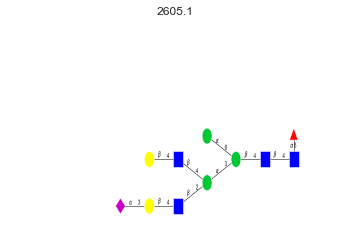

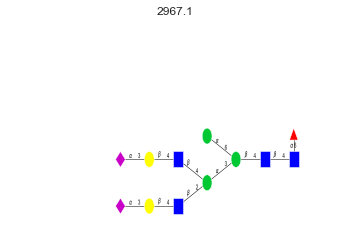

13


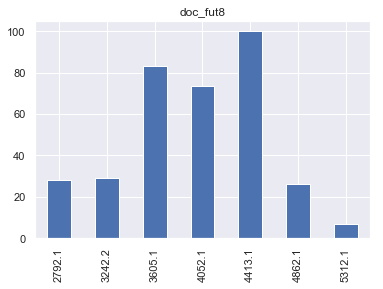

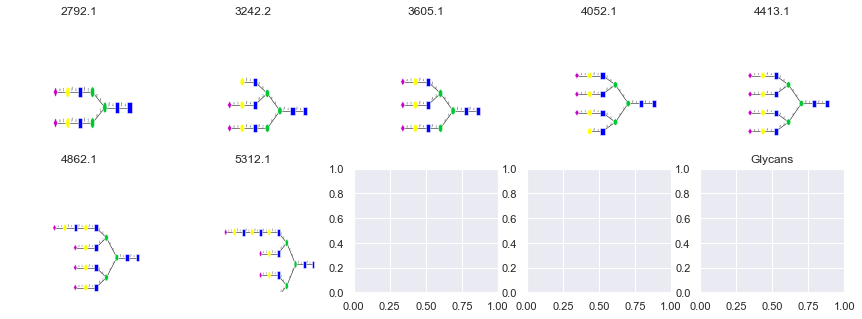

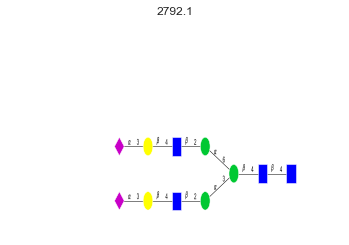

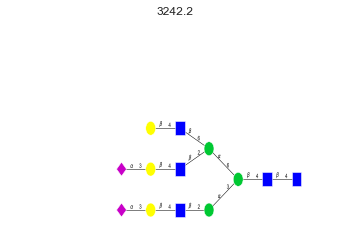

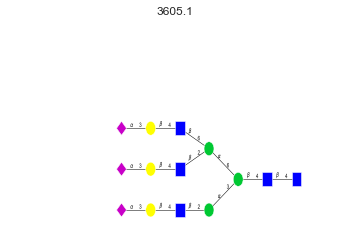

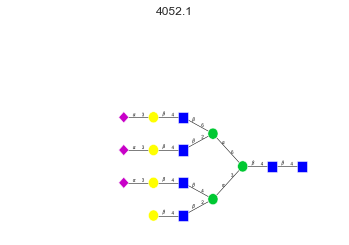

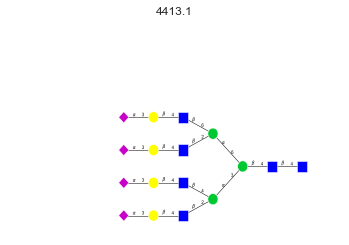

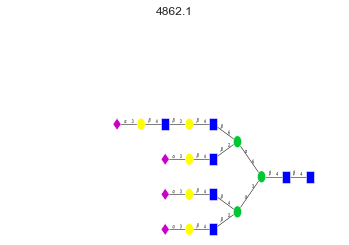

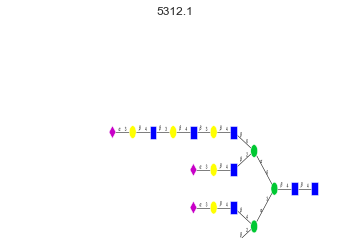

14


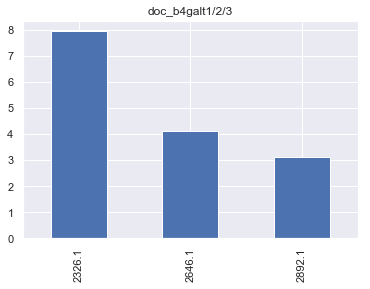

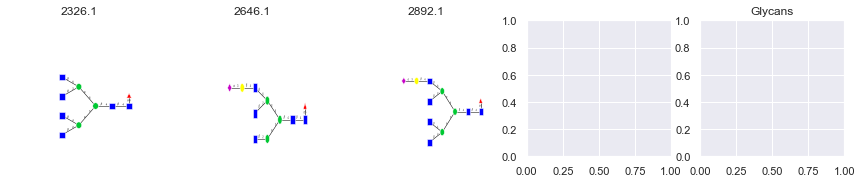

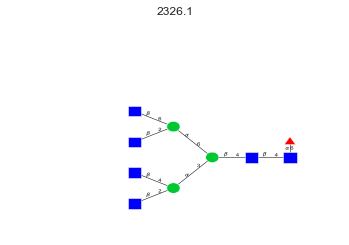

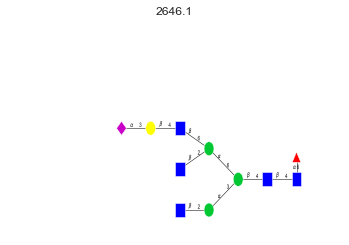

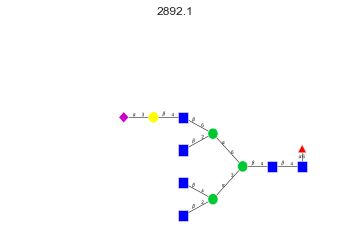

15


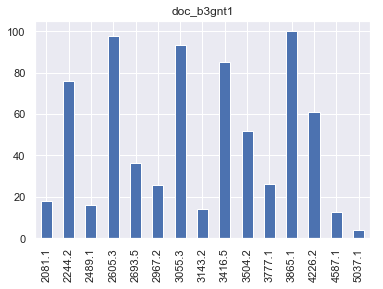

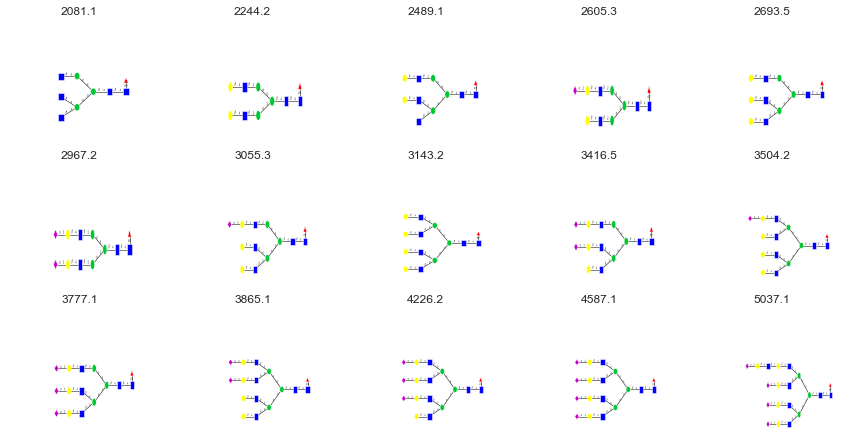

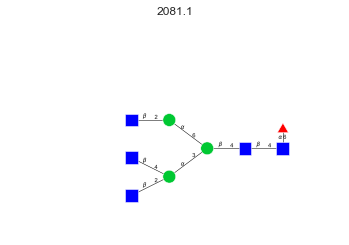

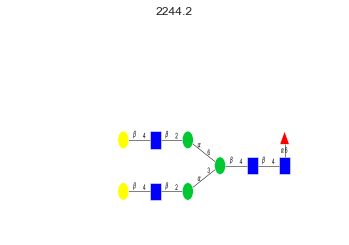

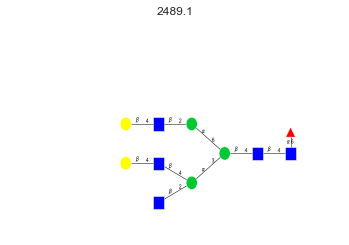

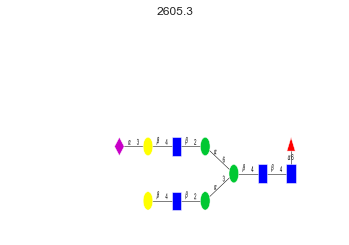

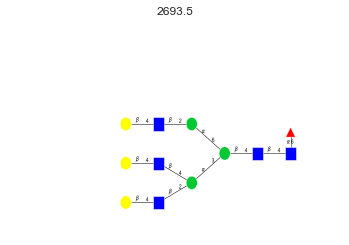

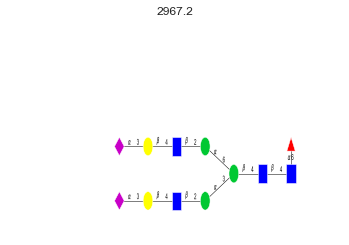

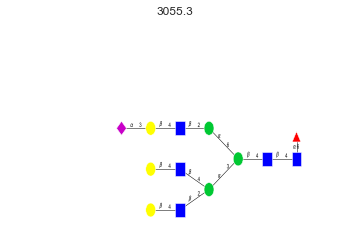

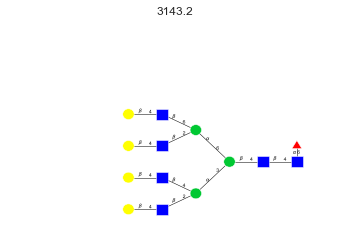

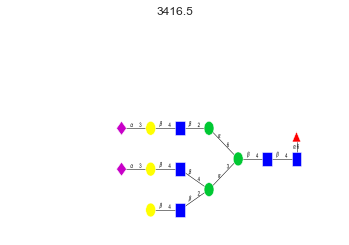

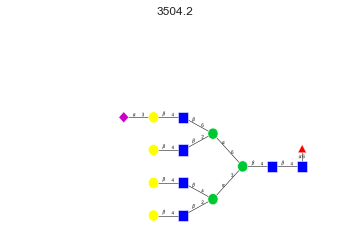

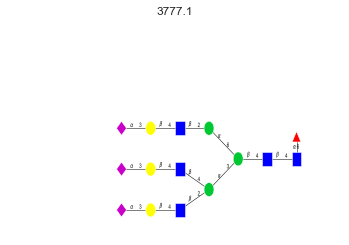

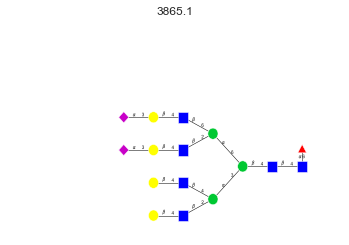

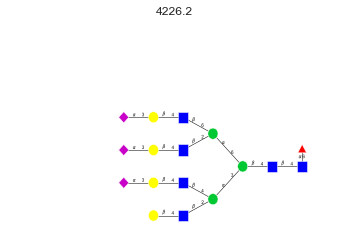

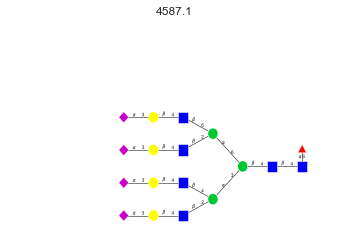

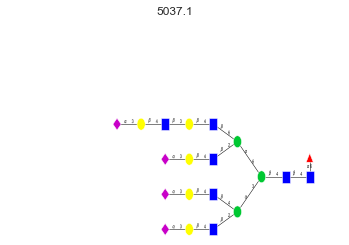

16


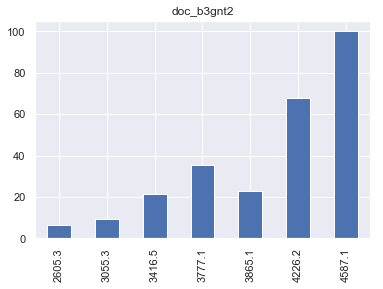

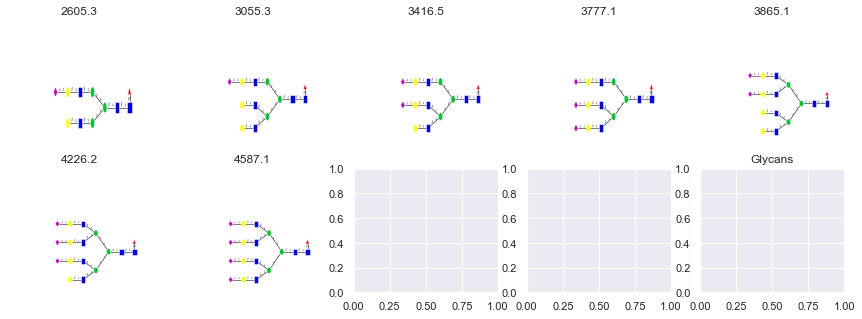

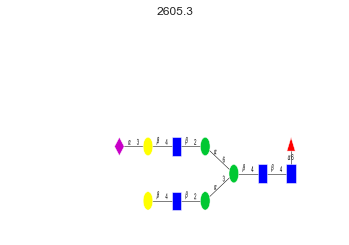

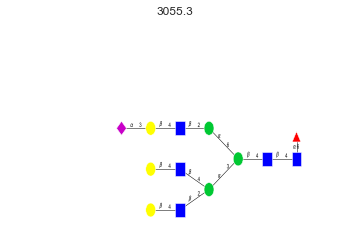

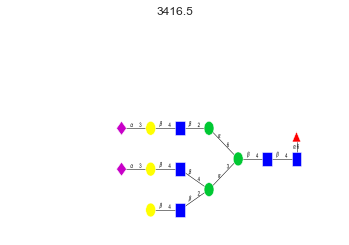

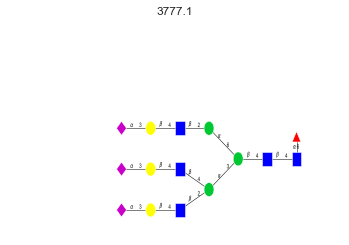

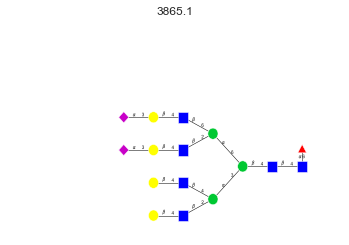

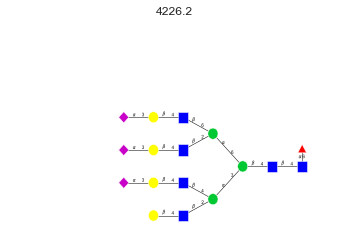

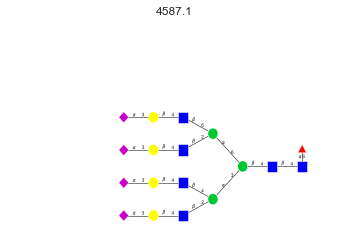

17


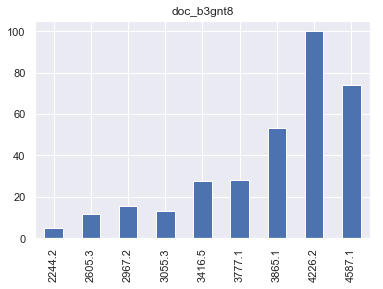

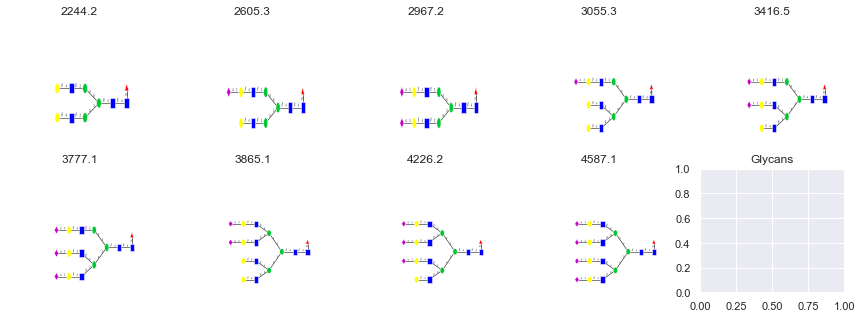

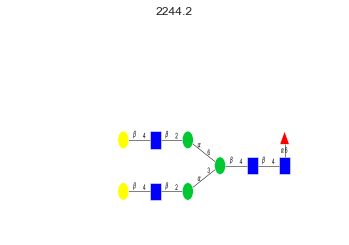

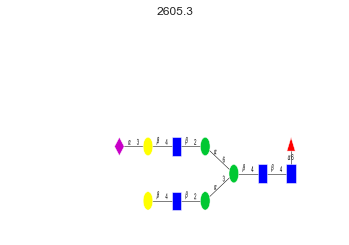

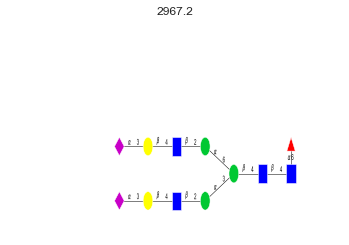

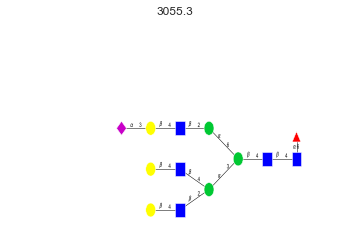

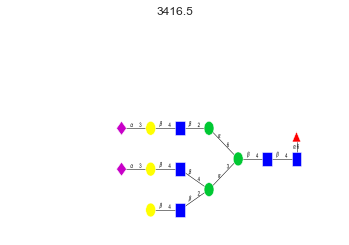

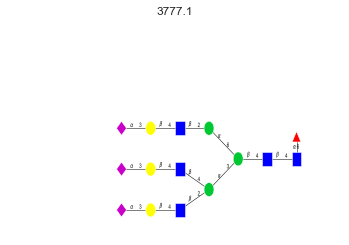

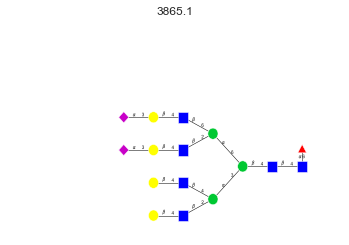

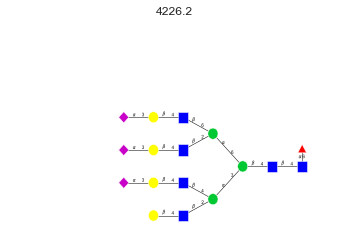

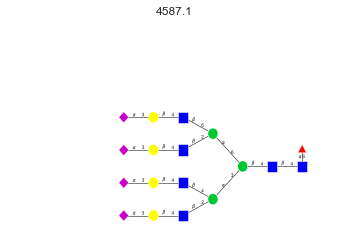

18


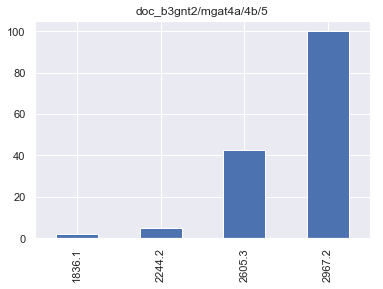

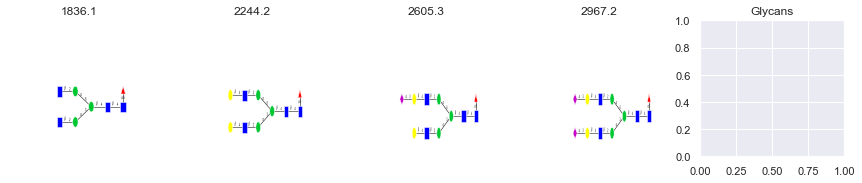

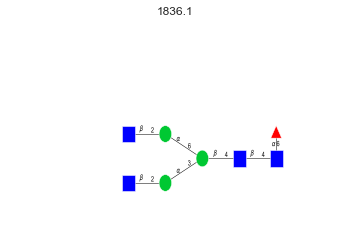

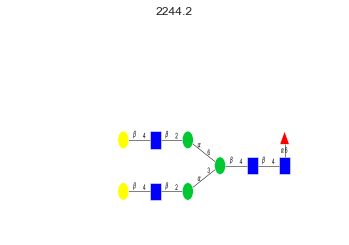

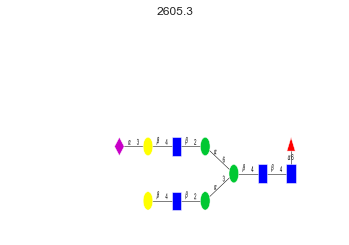

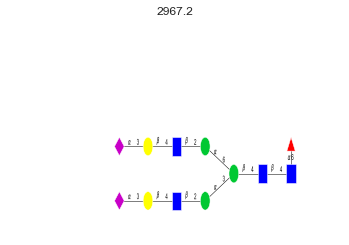

19


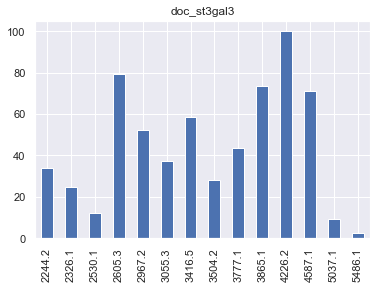

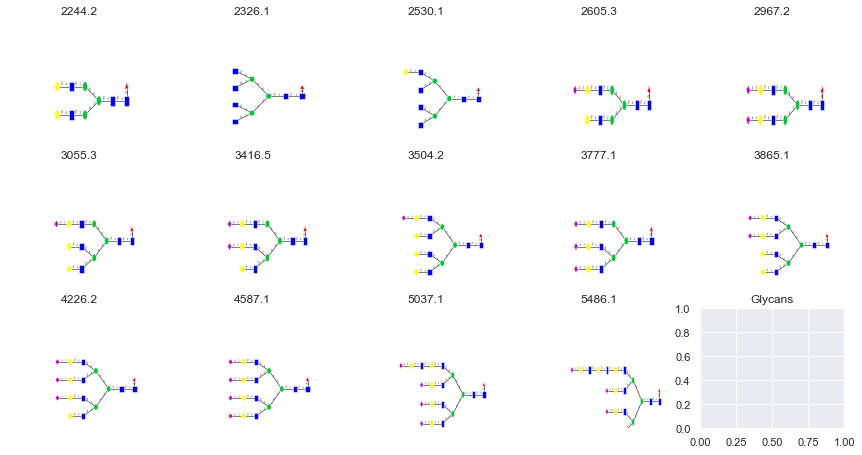

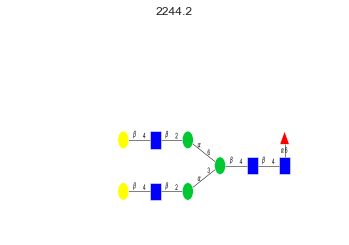

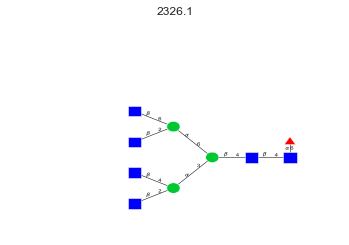

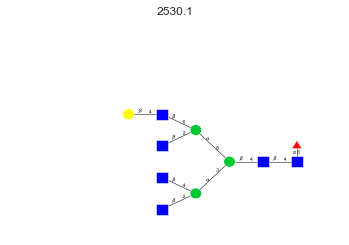

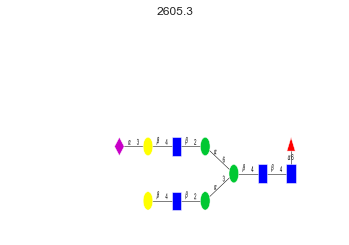

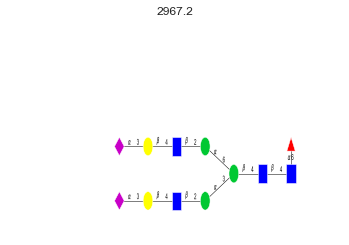

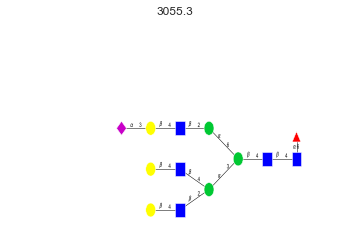

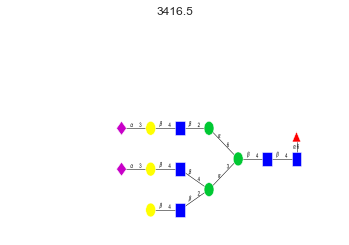

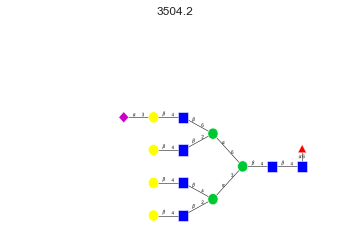

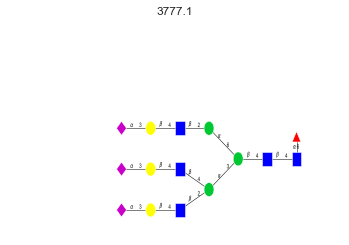

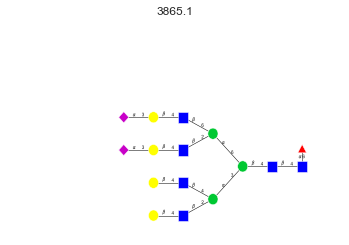

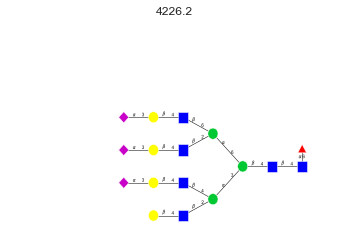

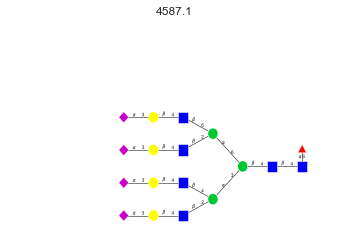

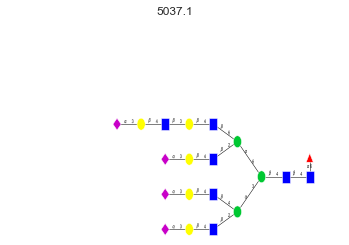

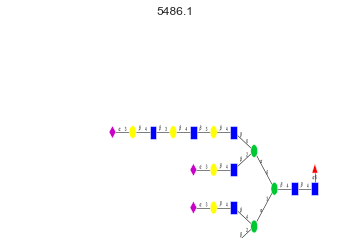

20


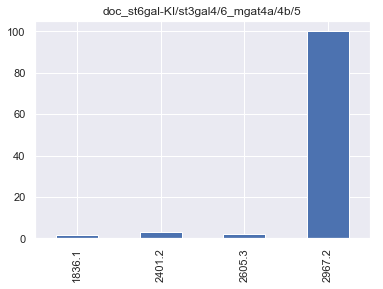

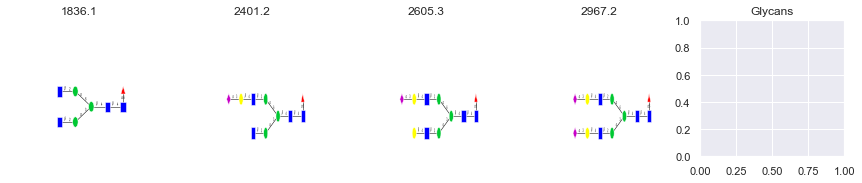

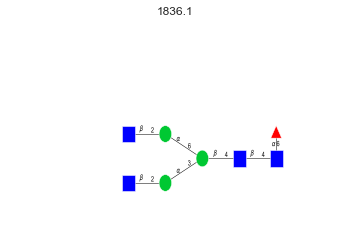

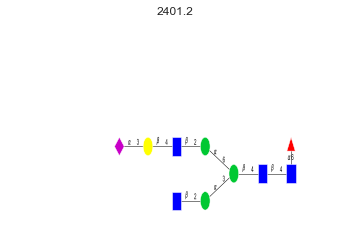

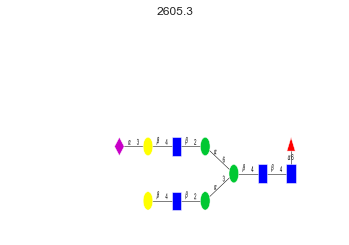

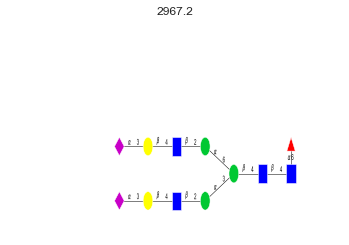

21


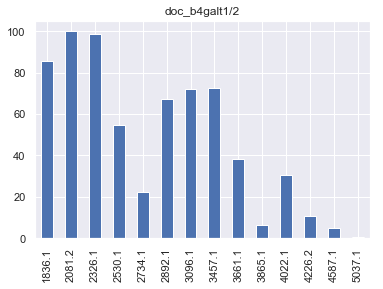

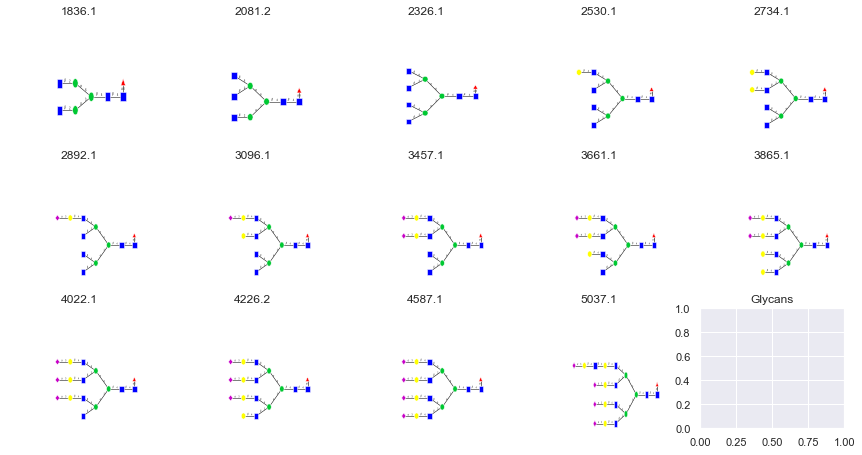

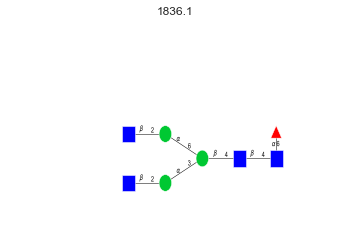

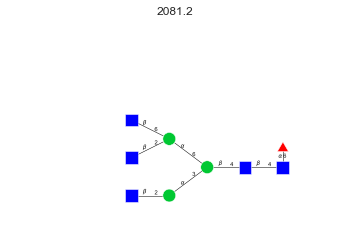

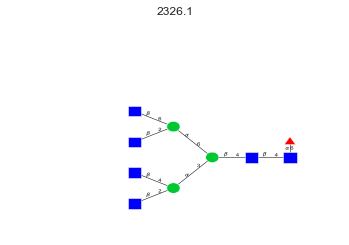

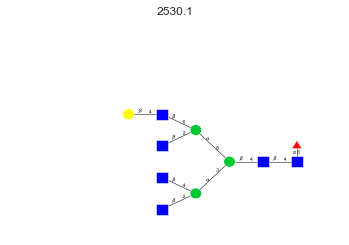

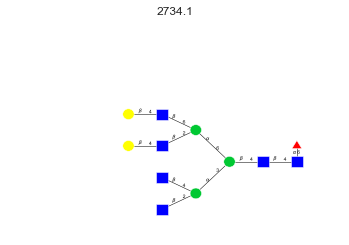

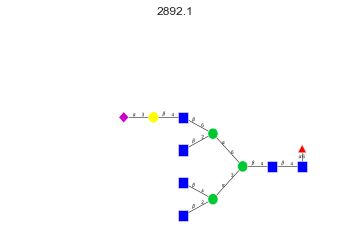

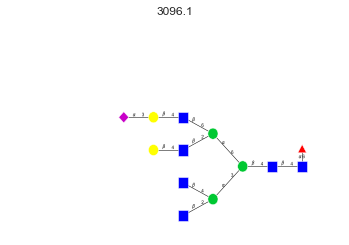

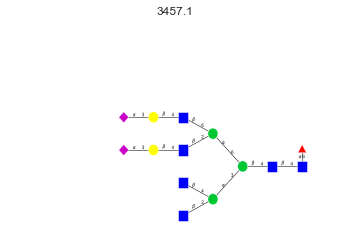

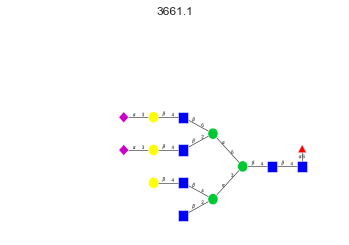

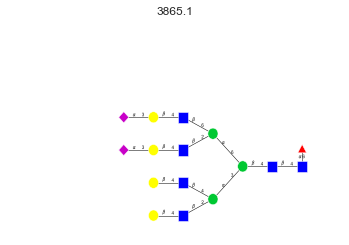

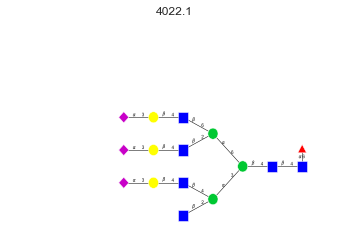

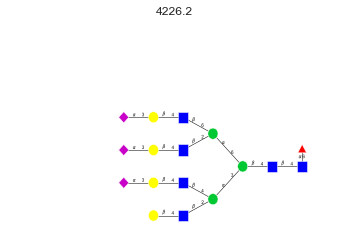

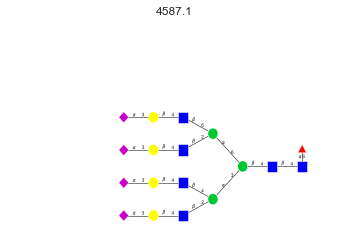

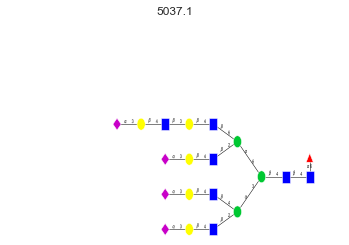

22


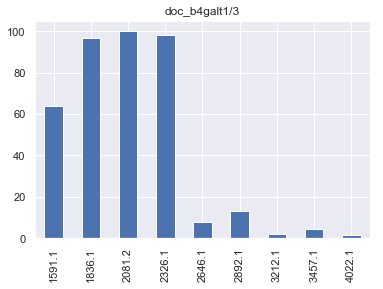

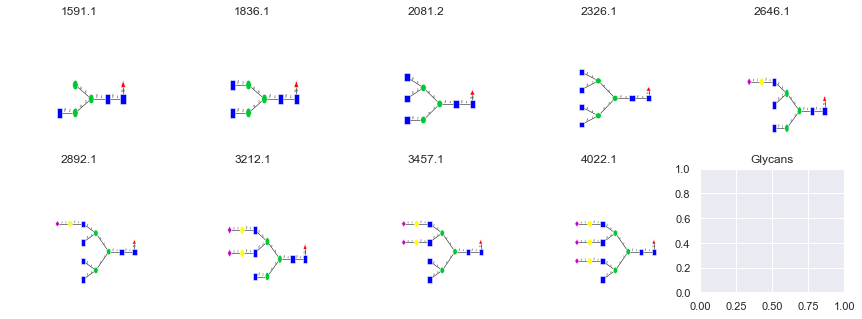

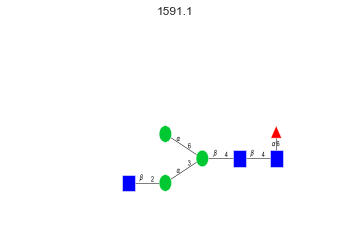

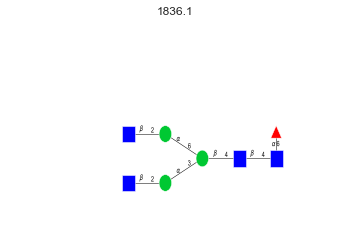

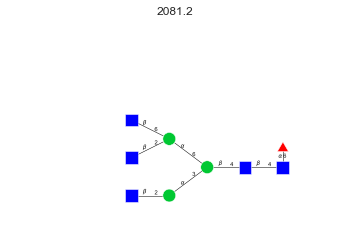

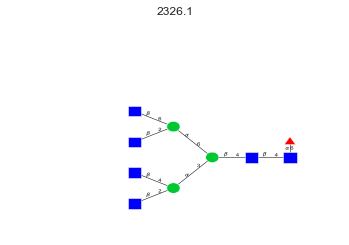

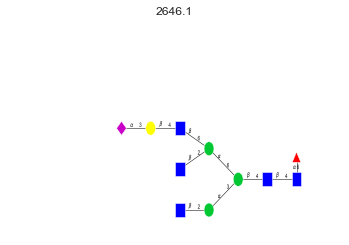

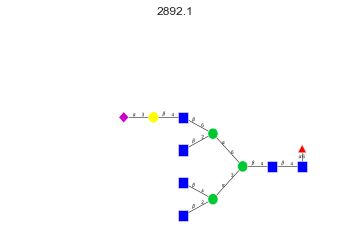

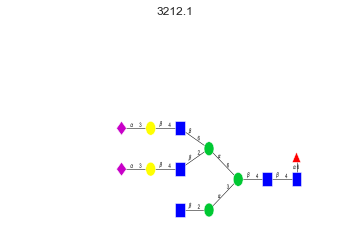

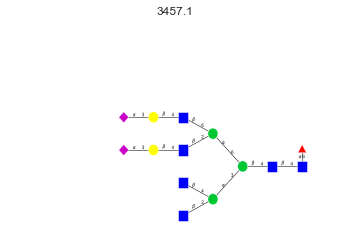

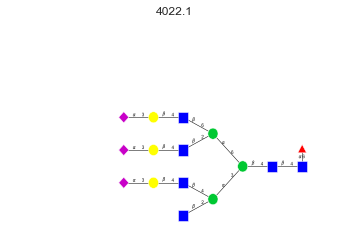

23


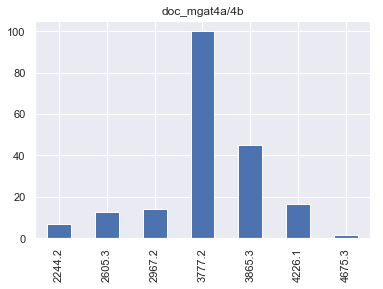

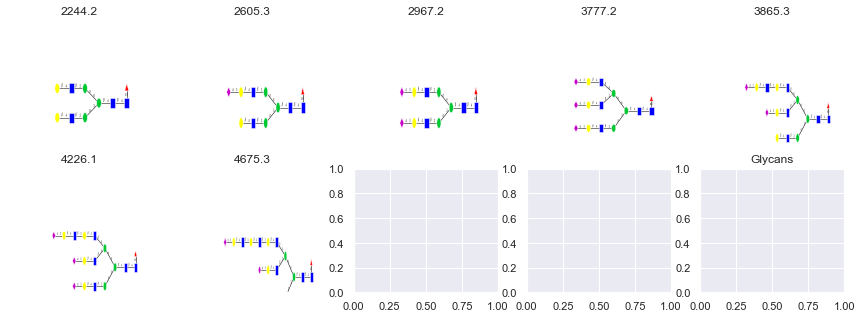

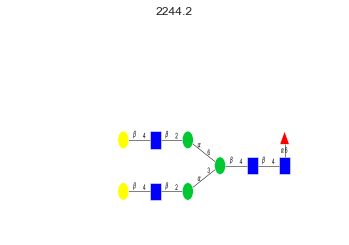

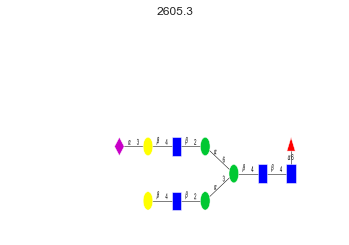

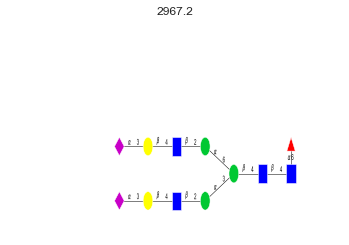

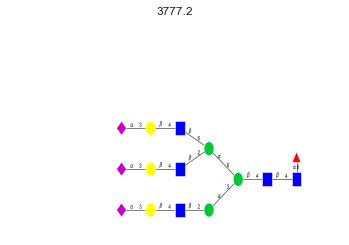

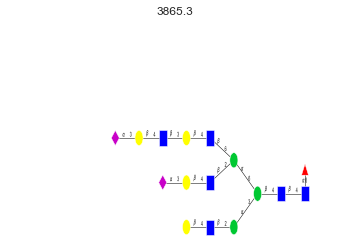

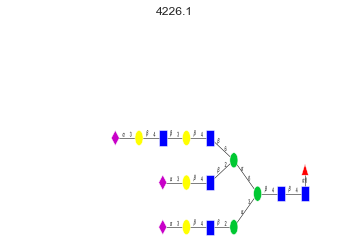

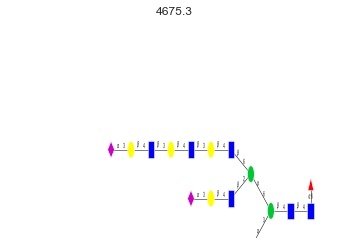

24


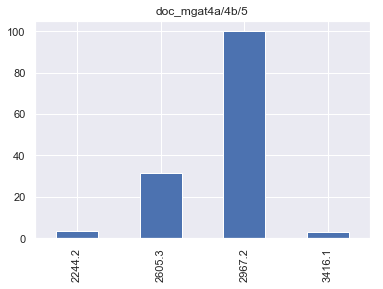

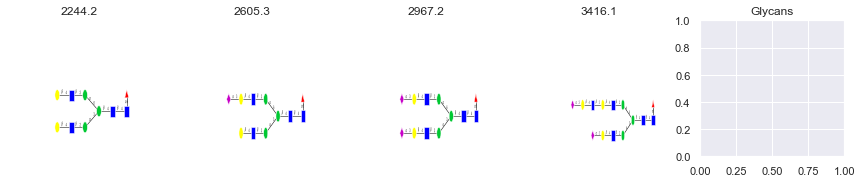

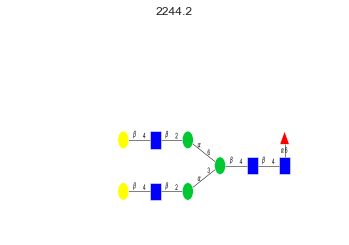

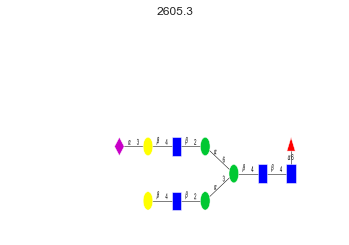

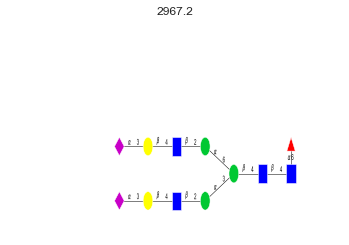

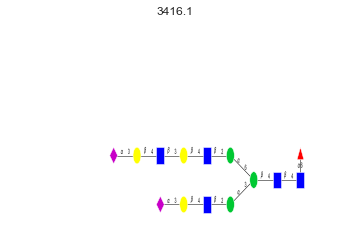

25


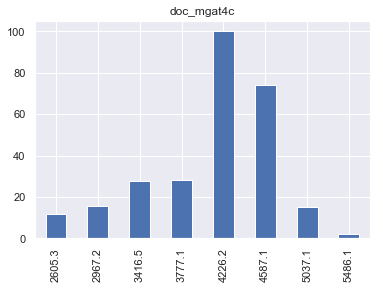

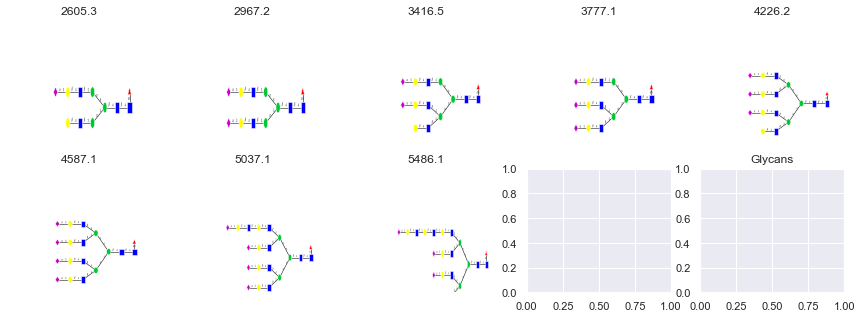

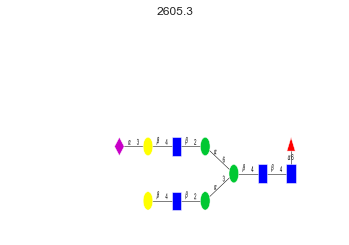

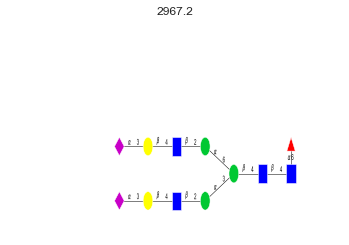

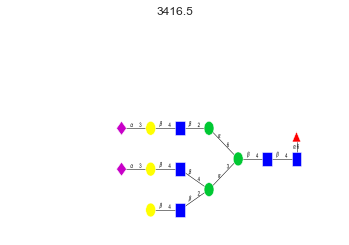

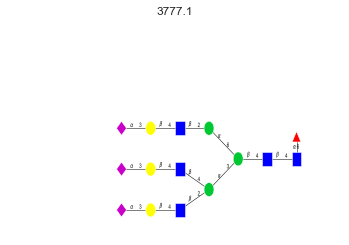

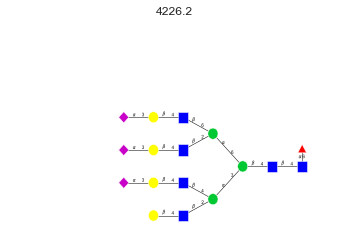

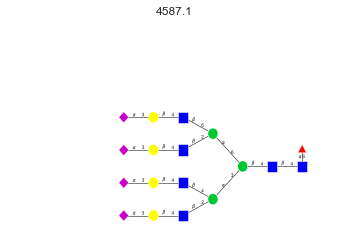

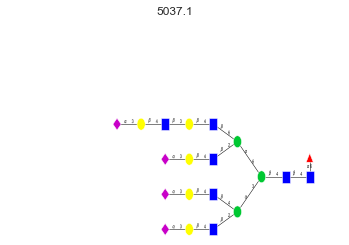

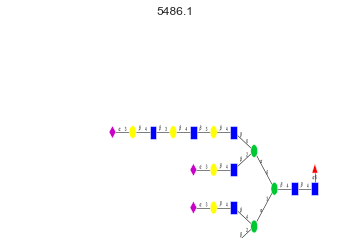

26


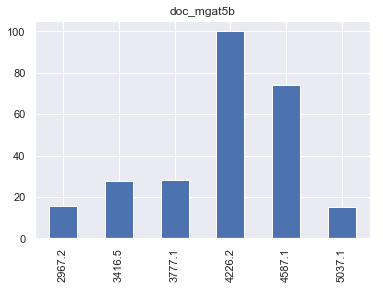

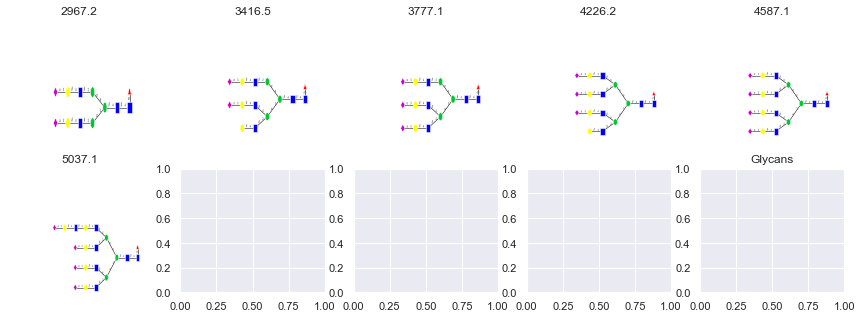

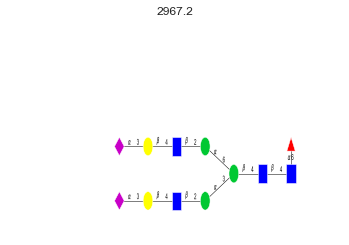

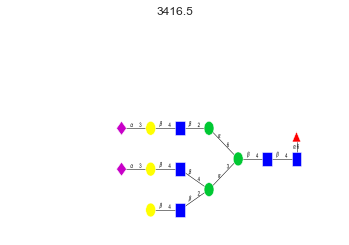

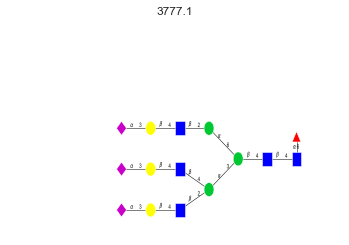

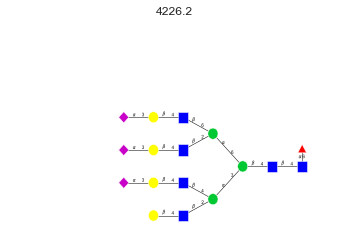

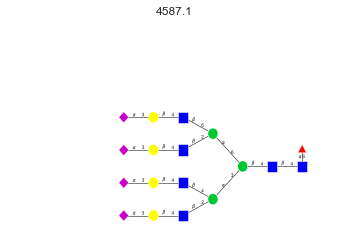

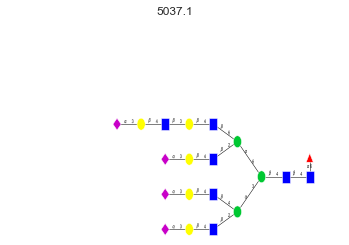

27


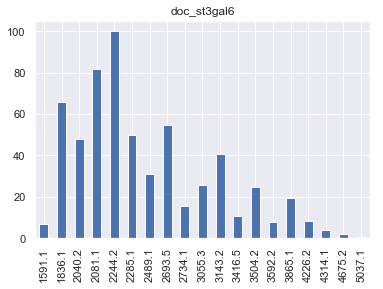

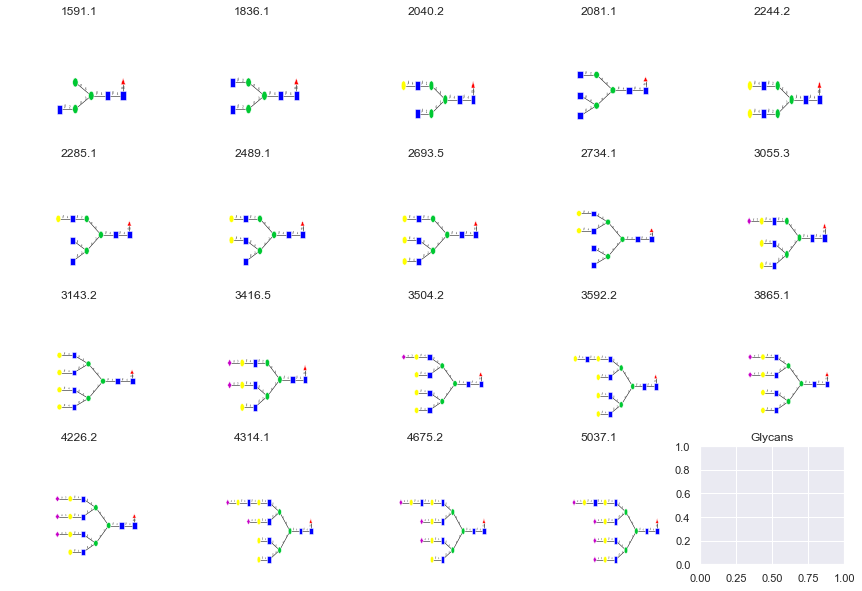

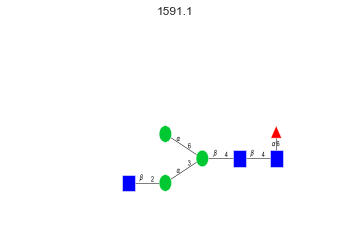

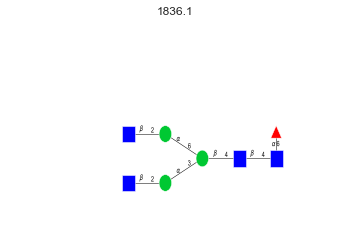

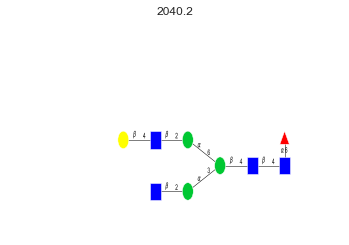

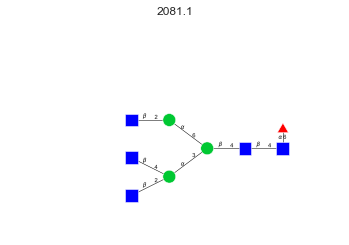

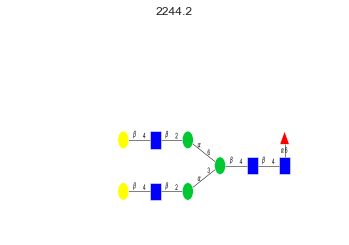

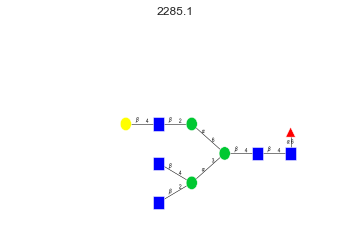

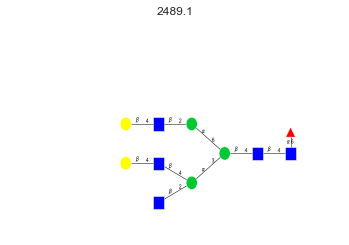

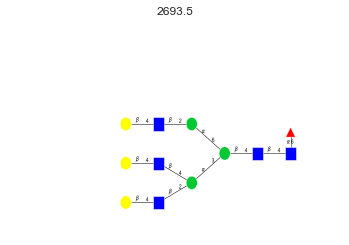

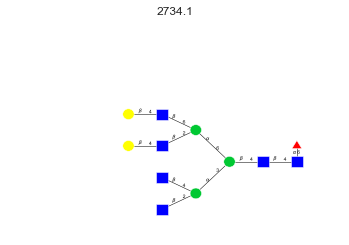

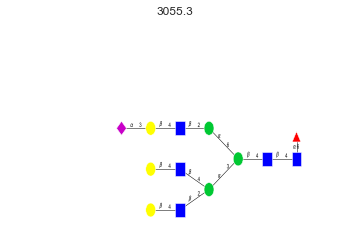

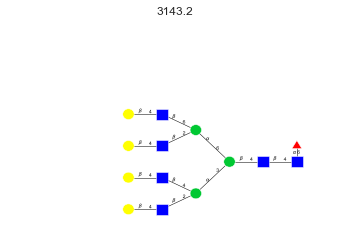

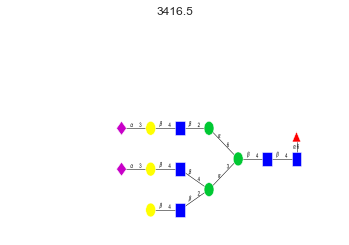

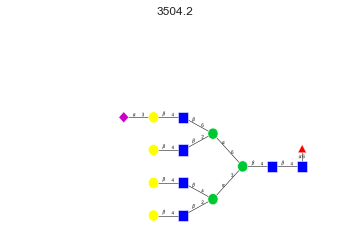

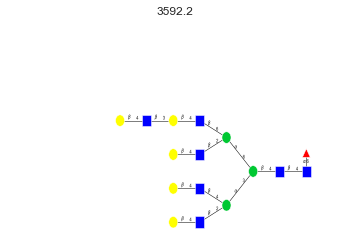

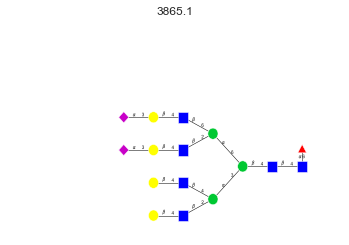

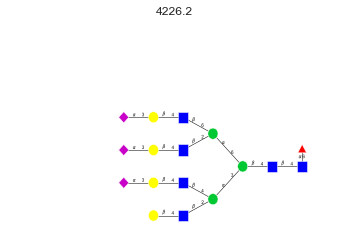

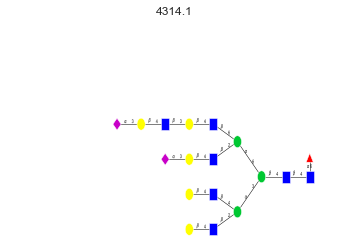

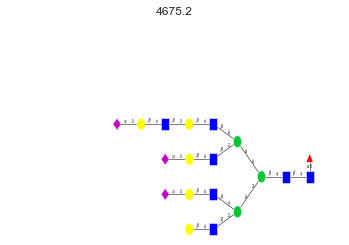

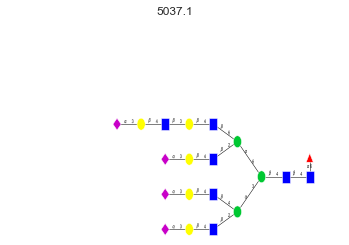

28


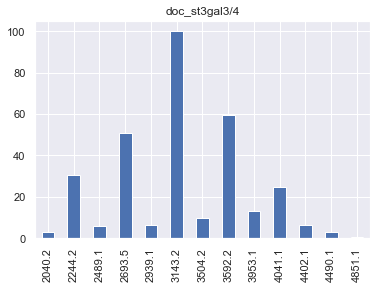

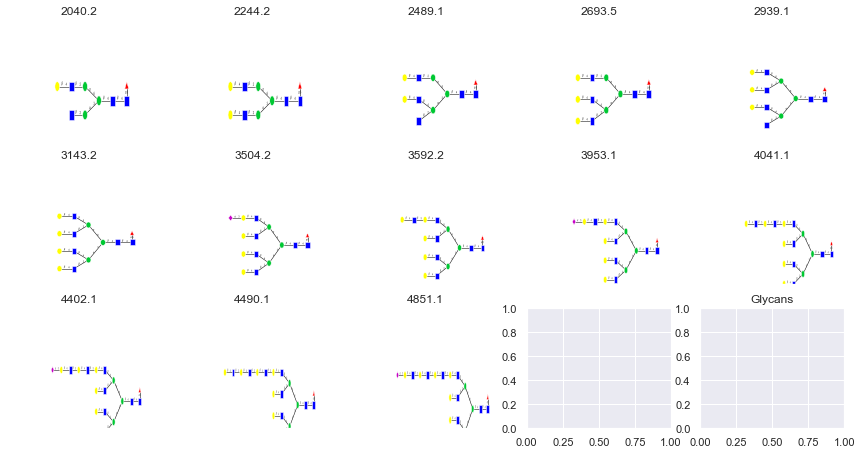

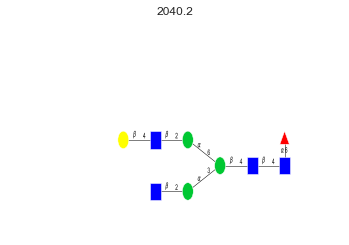

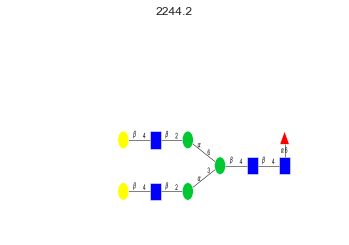

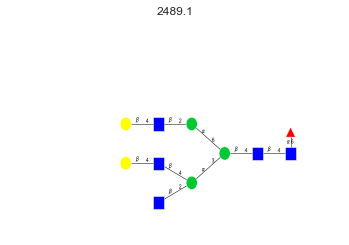

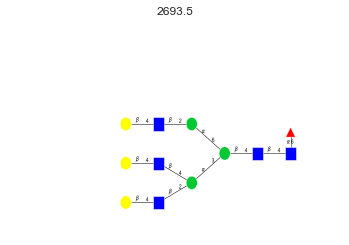

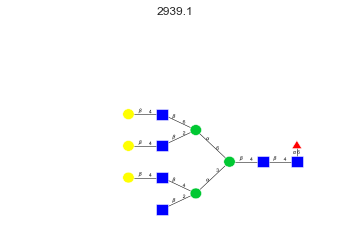

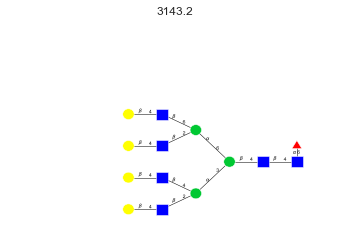

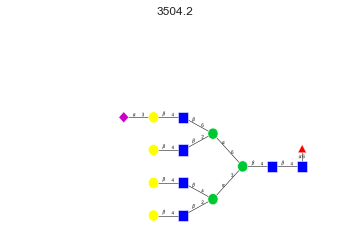

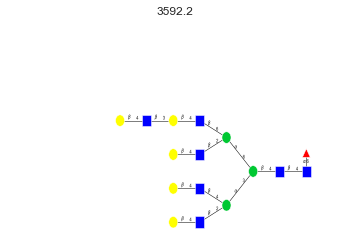

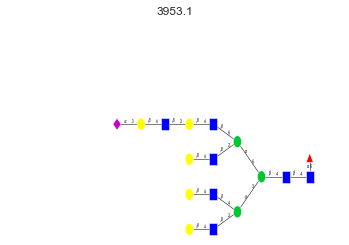

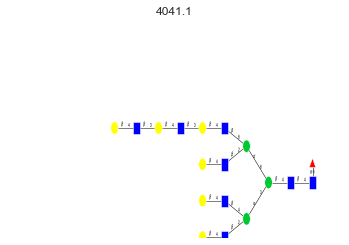

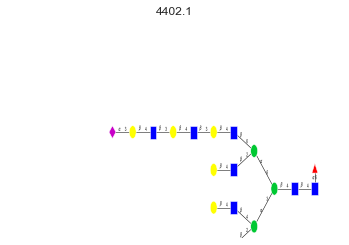

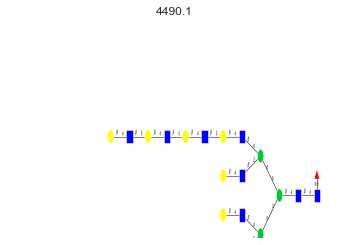

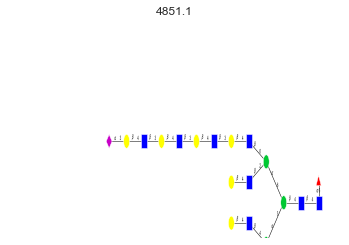

29


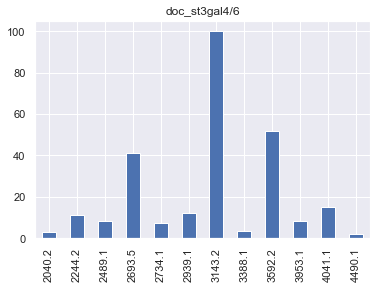

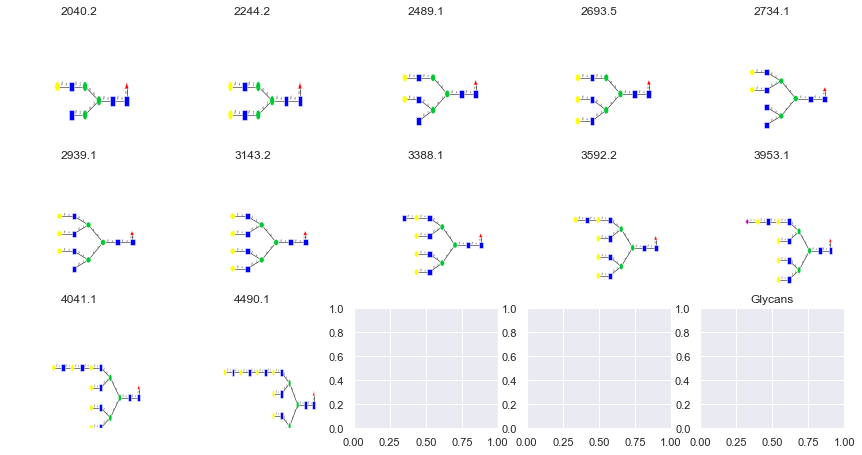

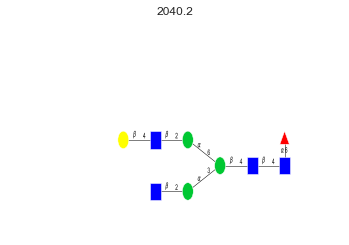

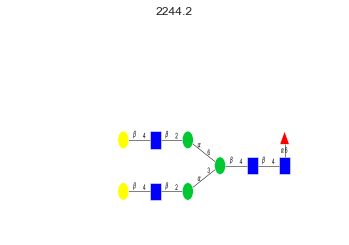

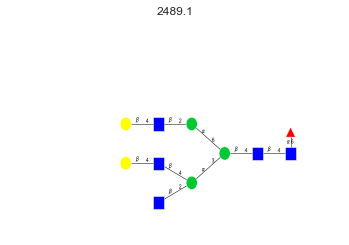

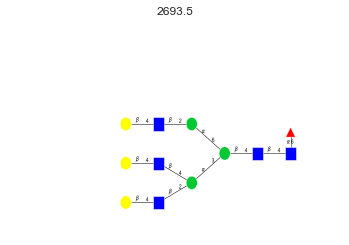

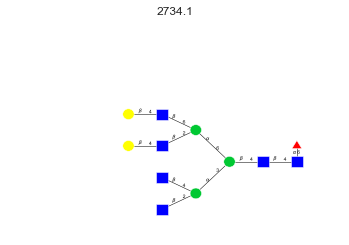

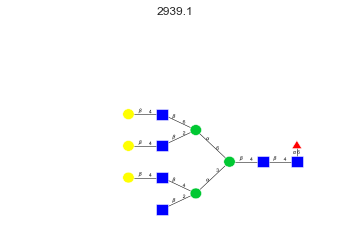

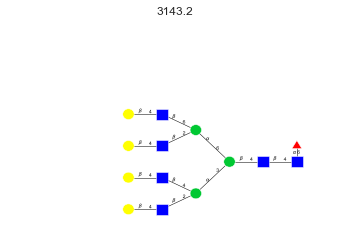

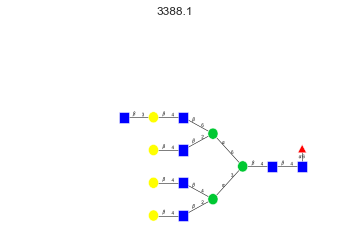

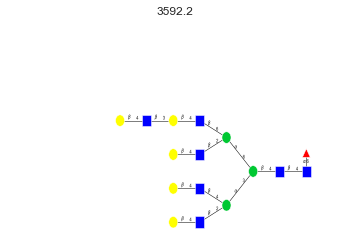

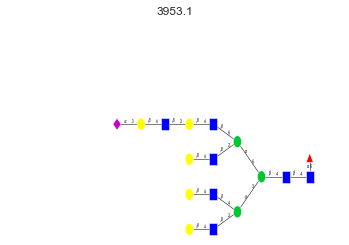

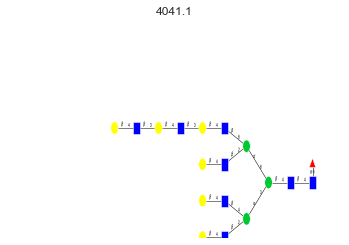

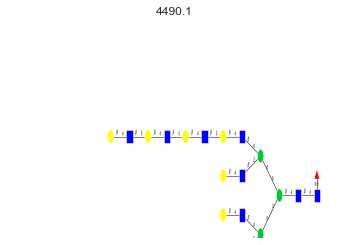

30


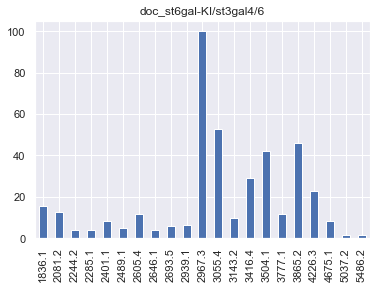

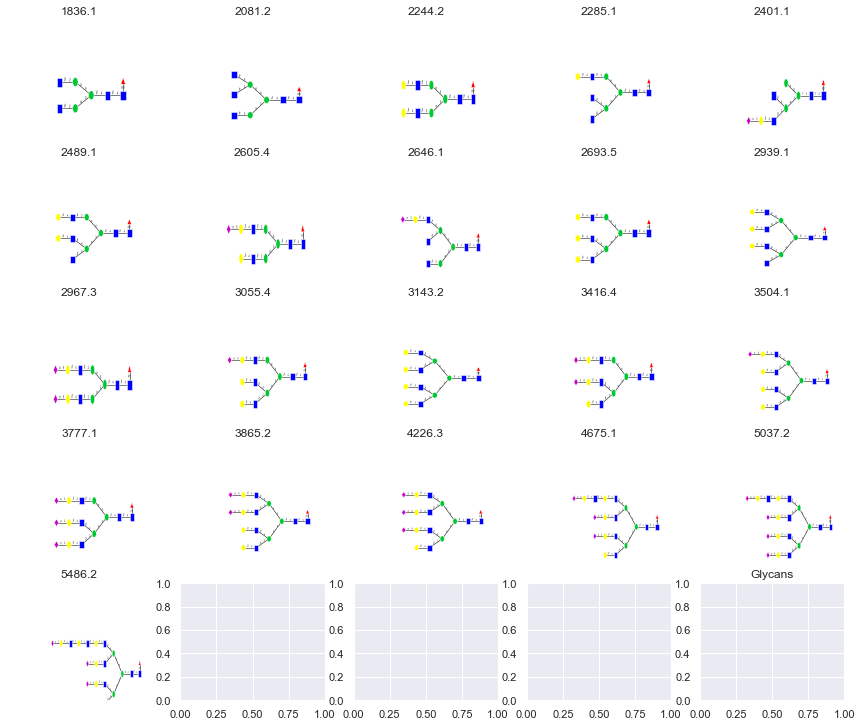

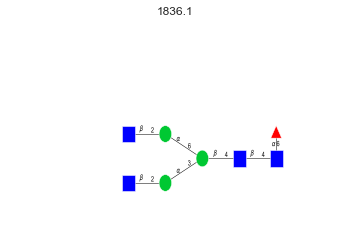

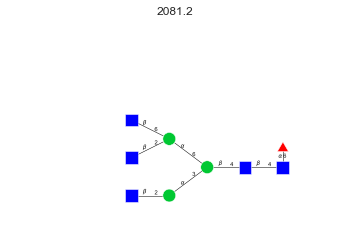

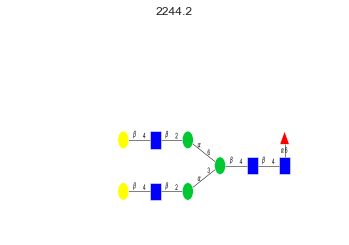

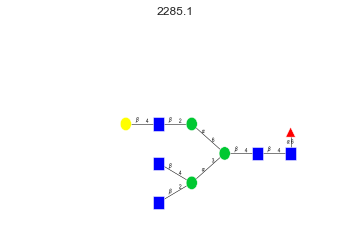

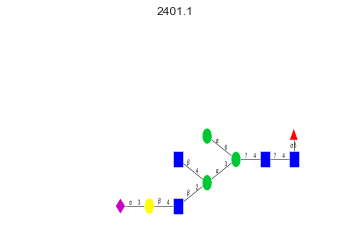

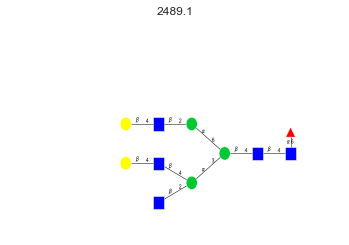

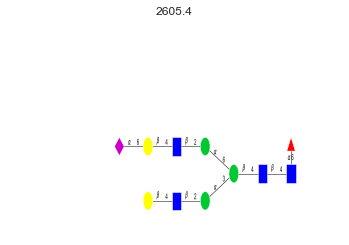

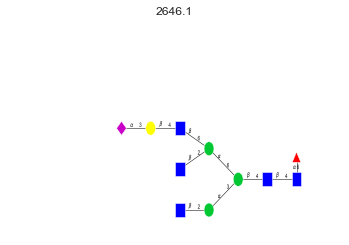

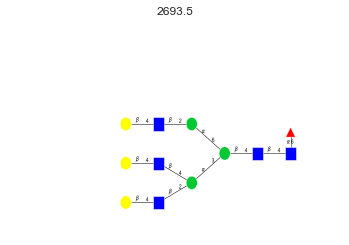

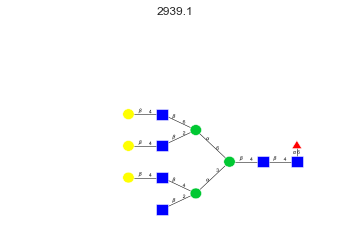

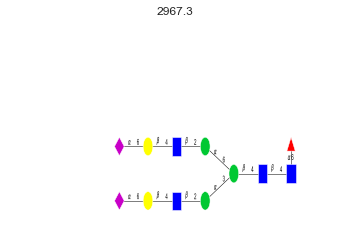

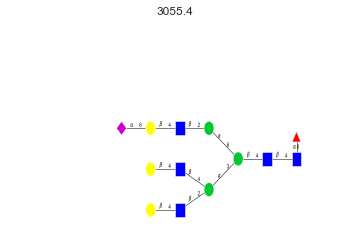

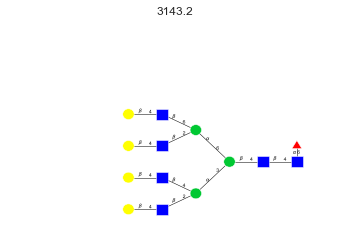

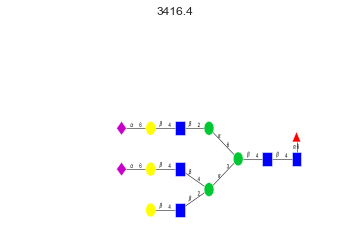

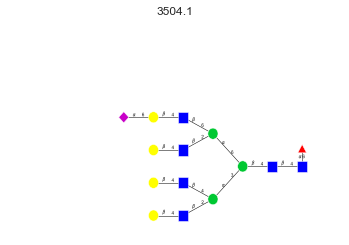

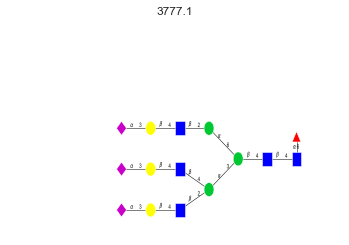

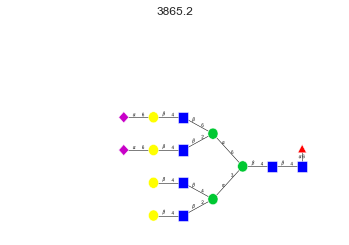

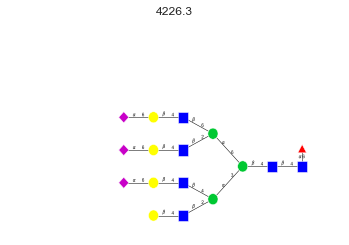

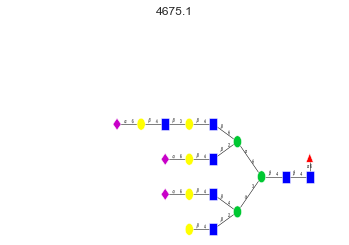

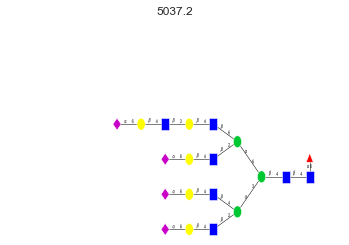

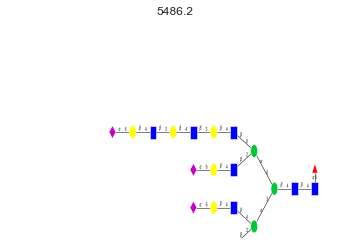

31


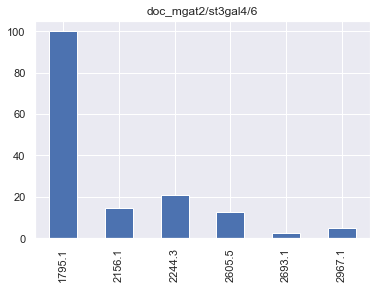

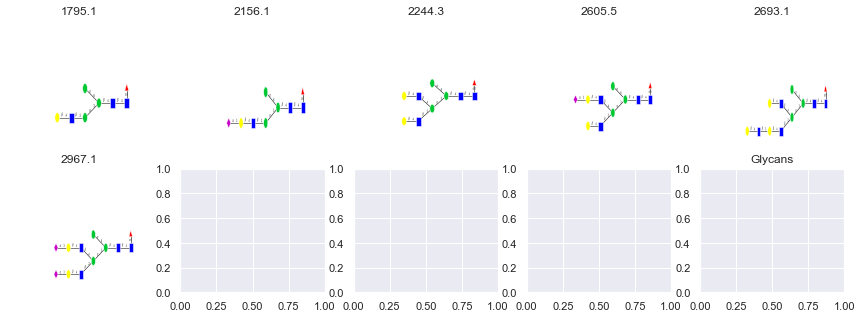

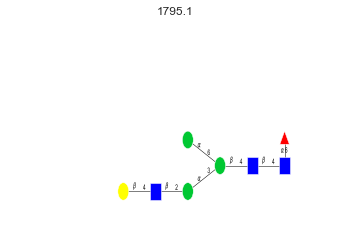

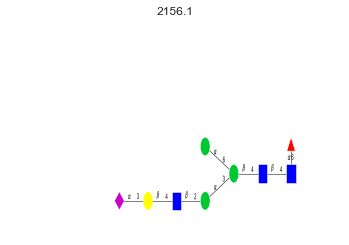

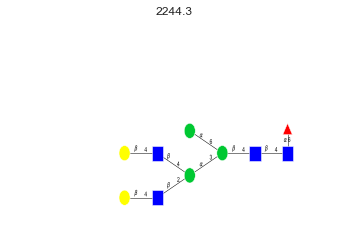

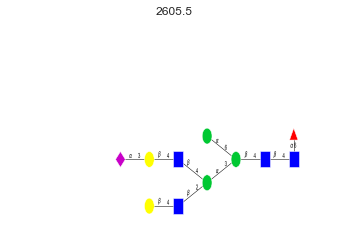

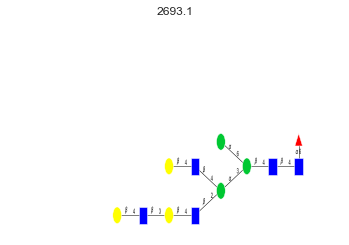

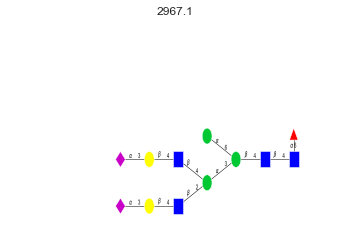

32


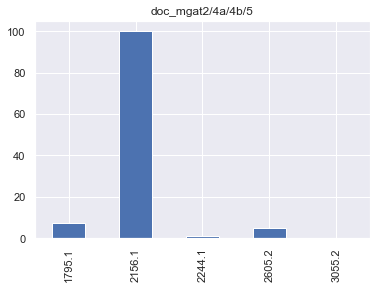

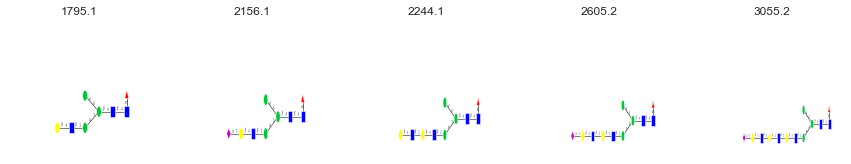

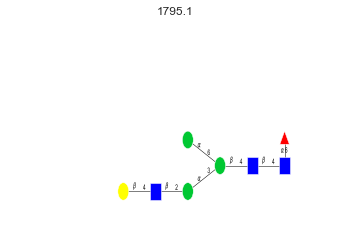

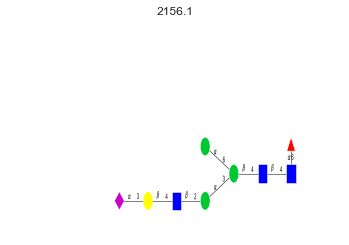

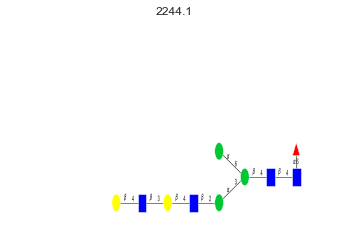

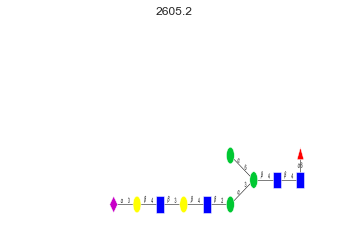

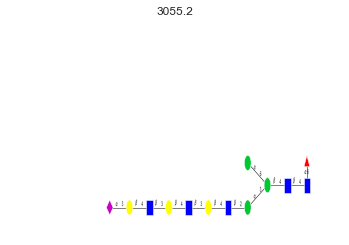

33


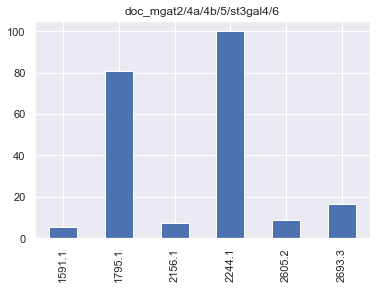

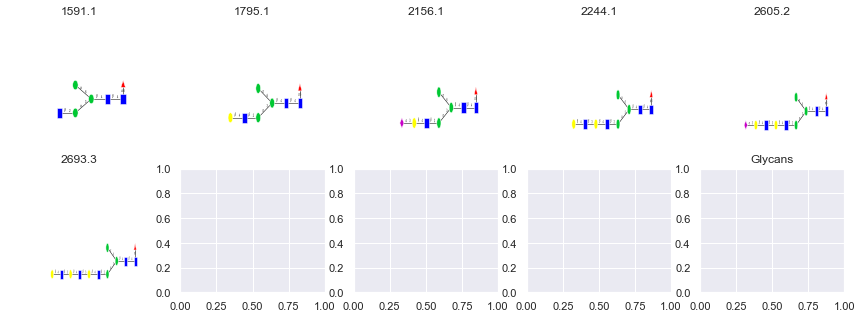

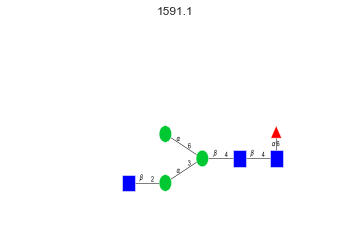

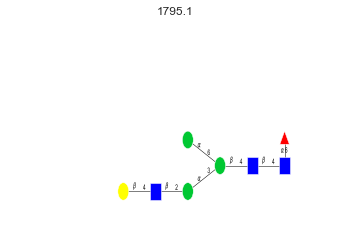

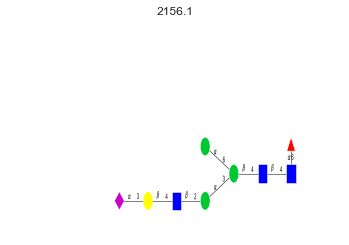

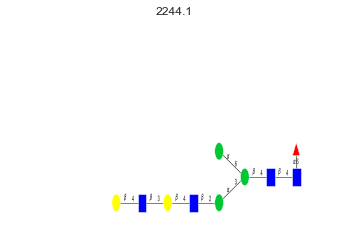

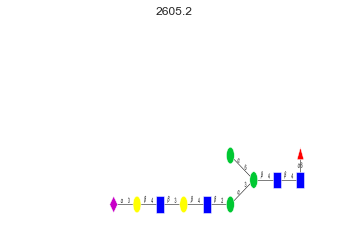

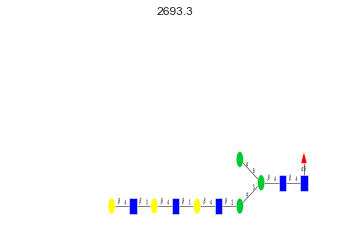

In [7]:
for i in range(5, 34):
    print(i)
    _table = meta_name[[meta_name.columns[0], meta_name.columns[i]]]
    _table = _table[_table[_table.columns[1]]>0]
    pd.Series({mz:id_ for mz, id_ in zip(_table.glycan_id, _table[_table.columns[1]])}).plot(kind='bar')
    plt.title("doc_"+_table.columns[1])
    plt.show()
    plot_glycan_utilities.plot_glycan_list([glycan_dict[str(j)] for j in _table.glycan_id], idex_list=[str(k) for k in _table.glycan_id], label=True)
    plt.show()
    for j in _table.glycan_id:
        plot_glycan_utilities.plot_glycan(glycan_dict[str(j)], idex_list=str(j), label=True, title=str(j))
    plt.show()

In [4]:
import matplotlib as mpl
from IPython.display import set_matplotlib_formats, display
# mpl.rcParams.update(mpl.rcParamsDefault)
# set_matplotlib_formats("svg")
glycan_dict = json_utility.load_json("/Users/apple/PycharmProjects/GlyCompare/intermediate_file/glycan_dict.json")

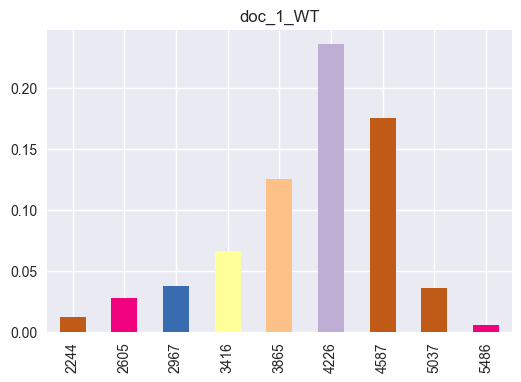

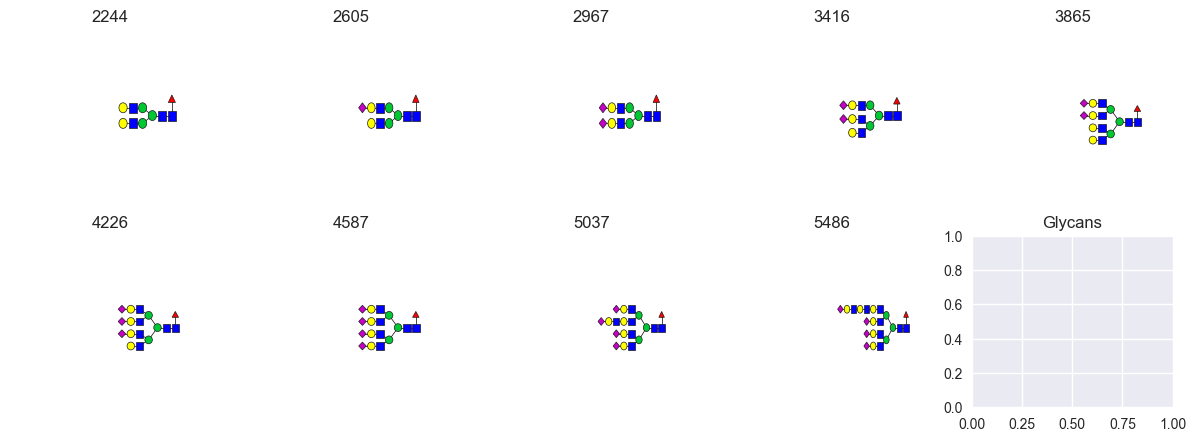

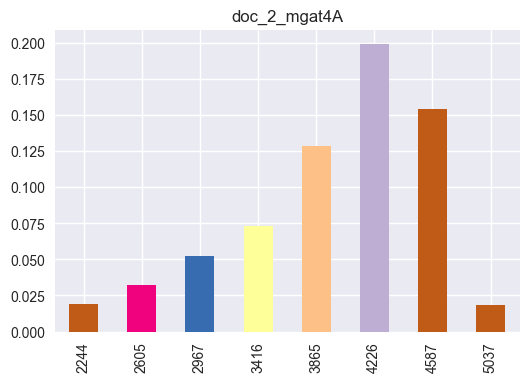

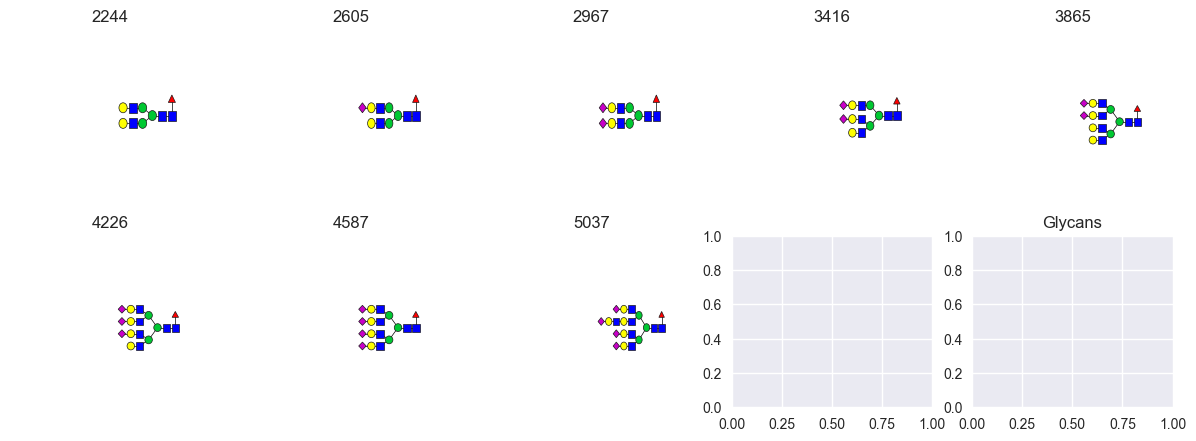

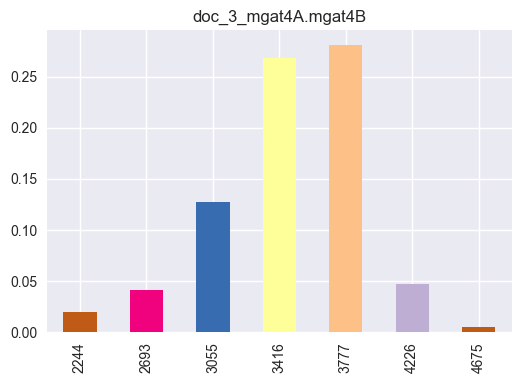

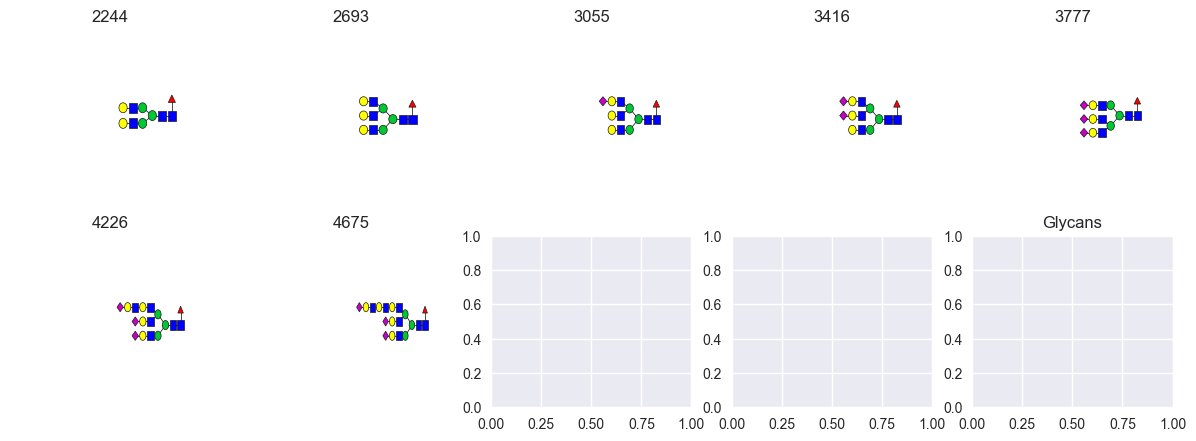

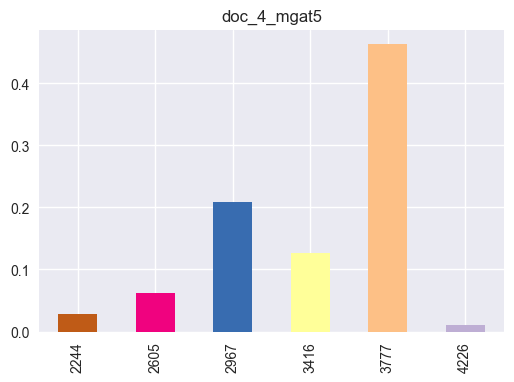

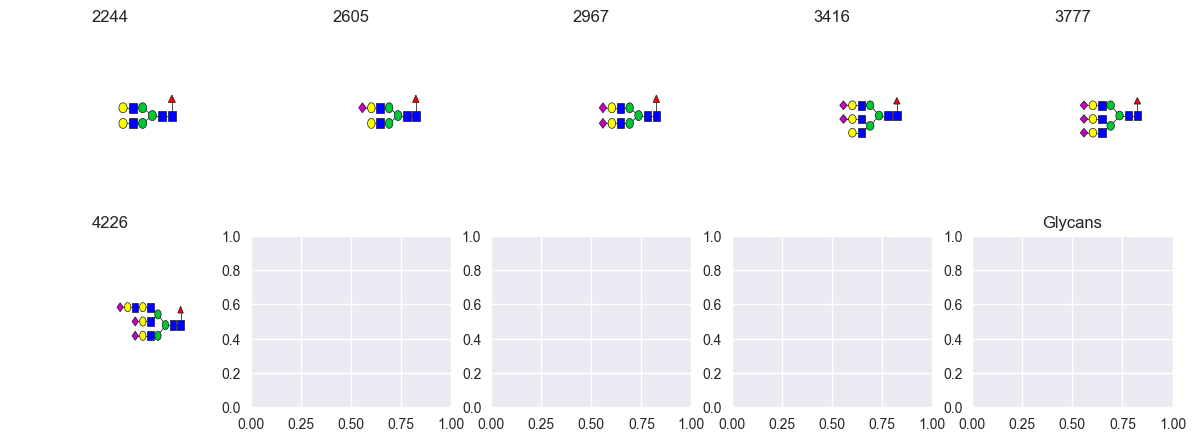

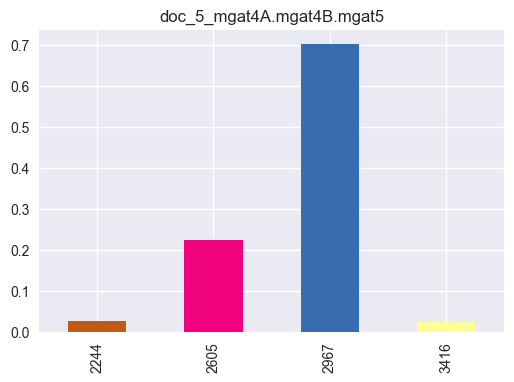

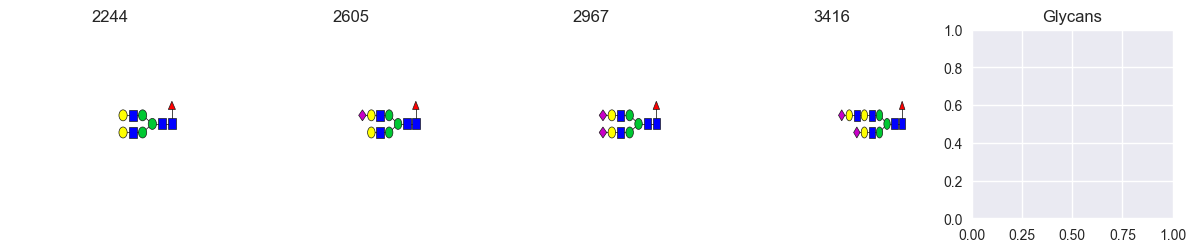

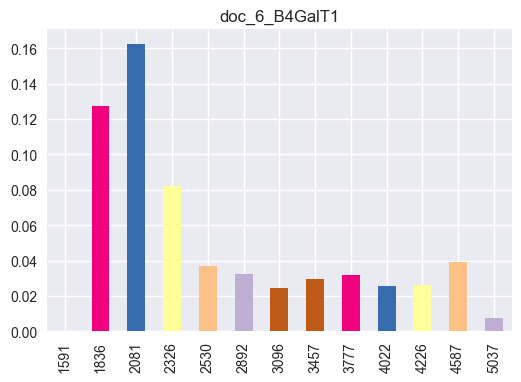

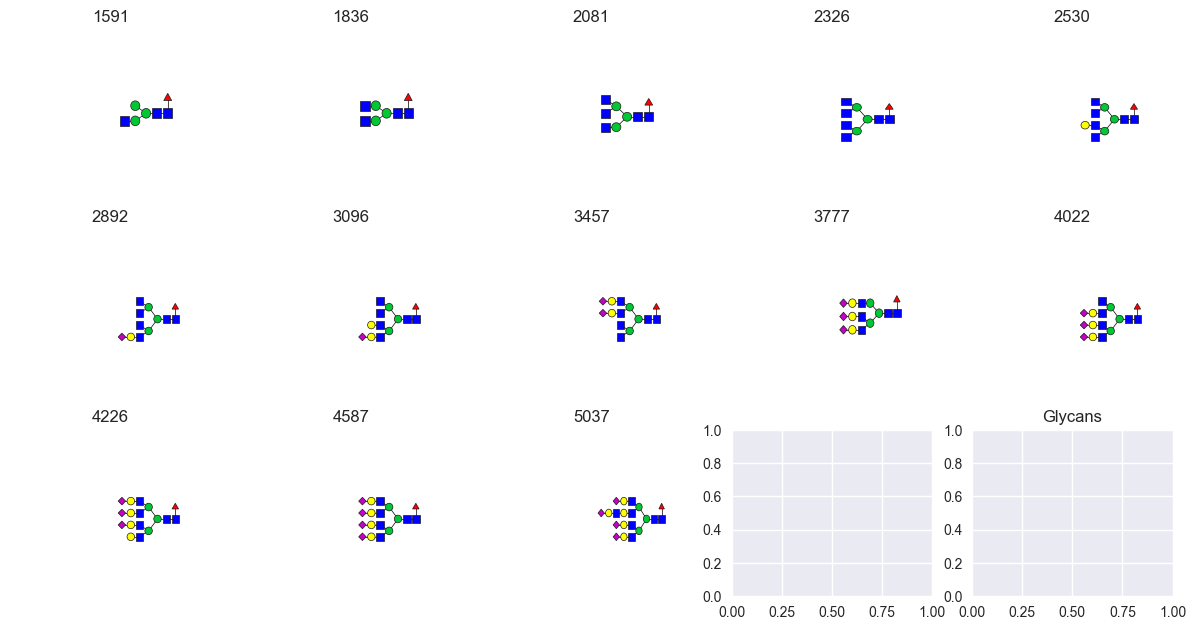

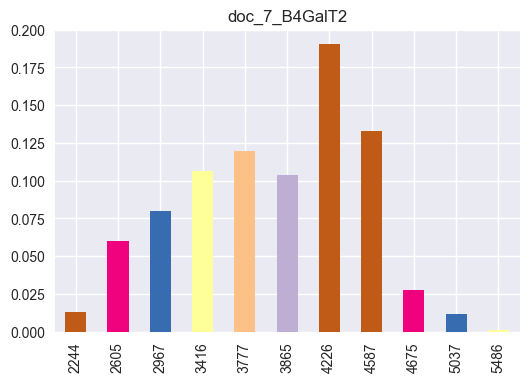

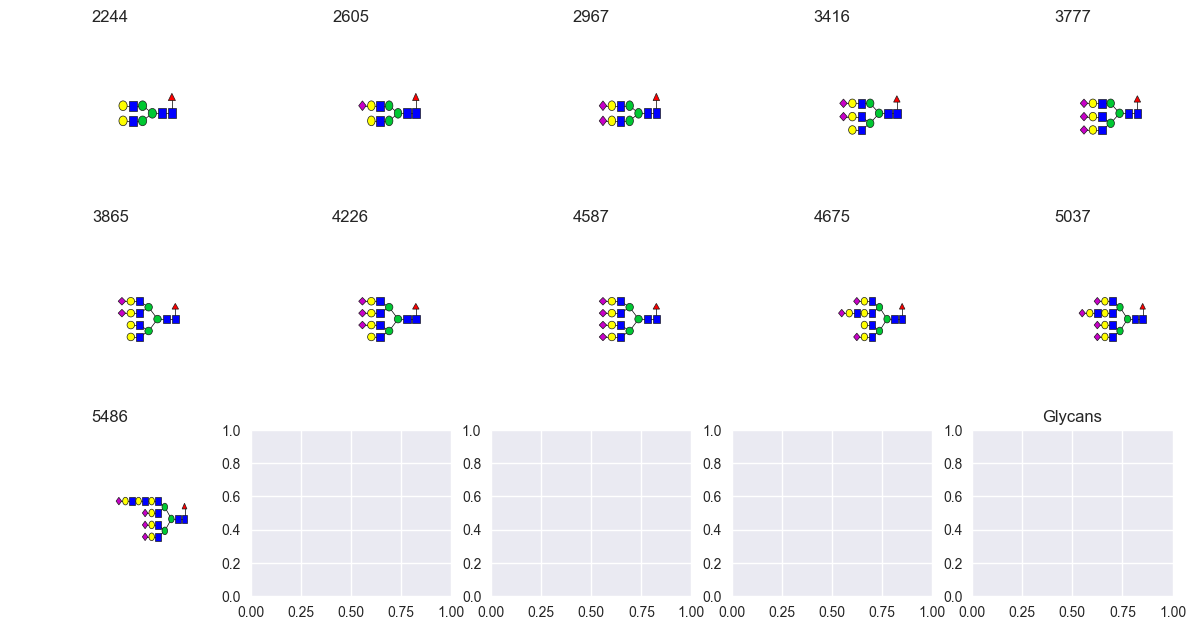

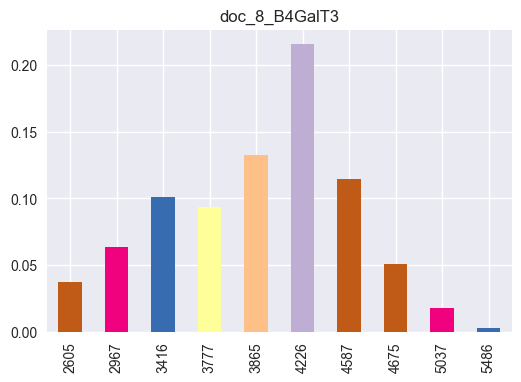

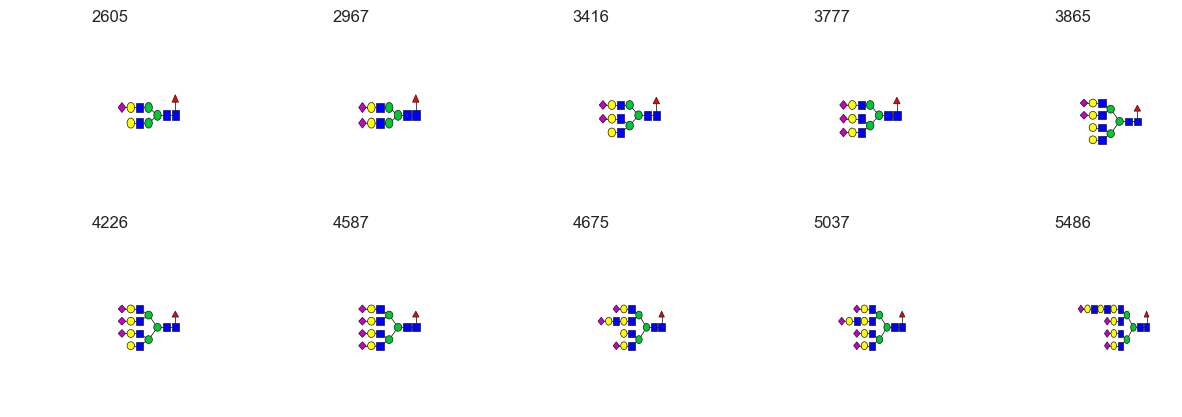

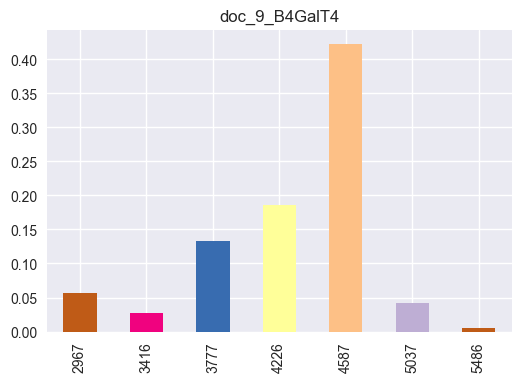

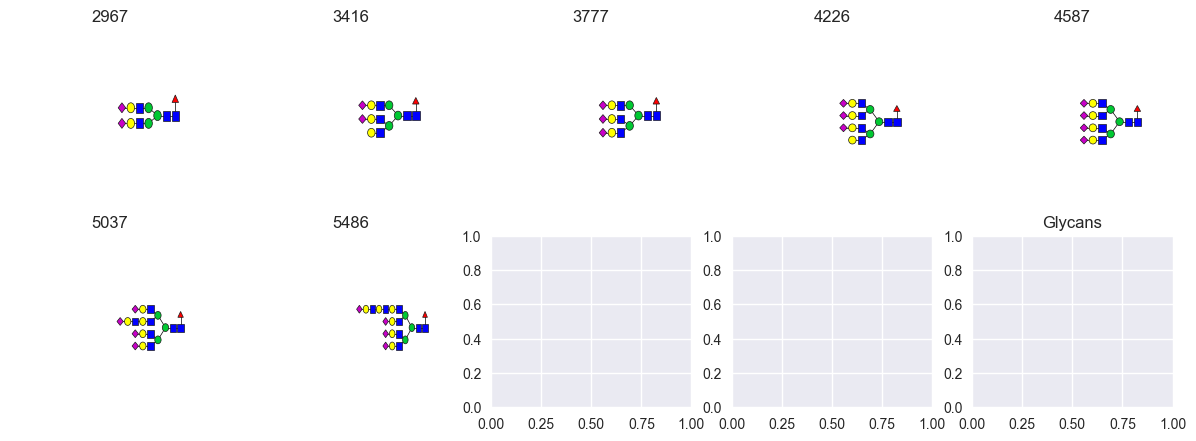

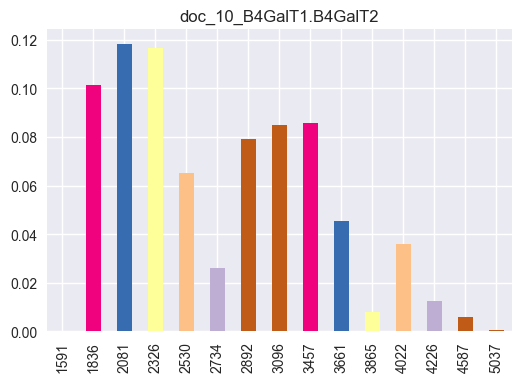

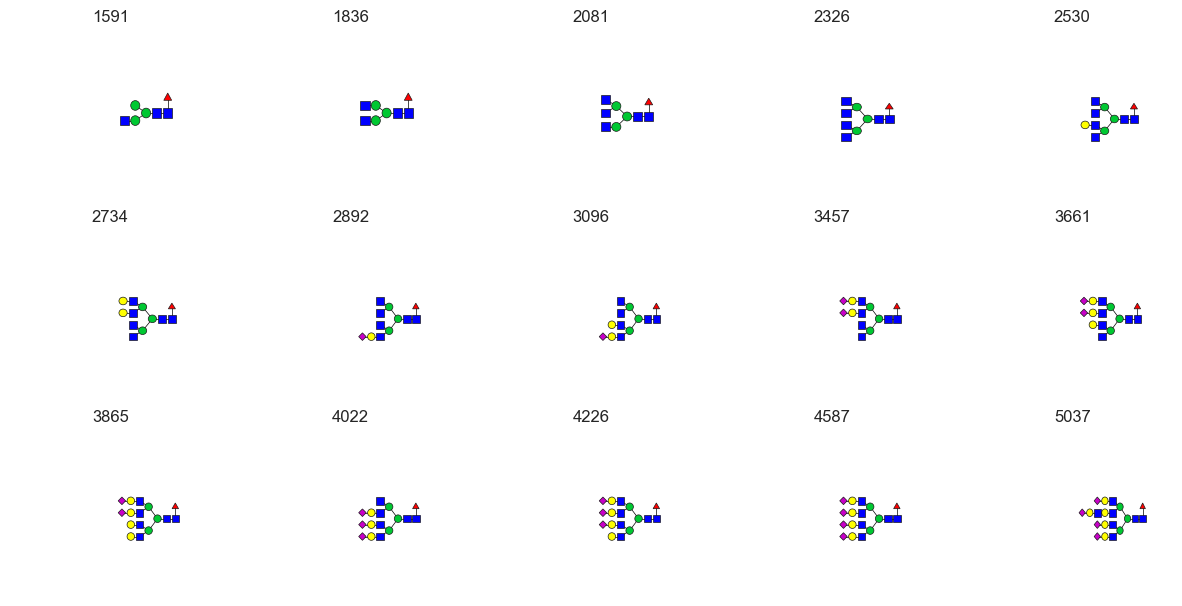

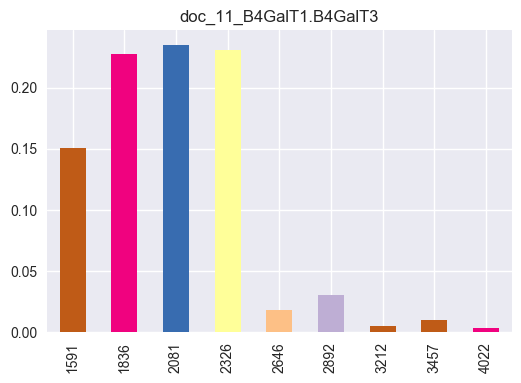

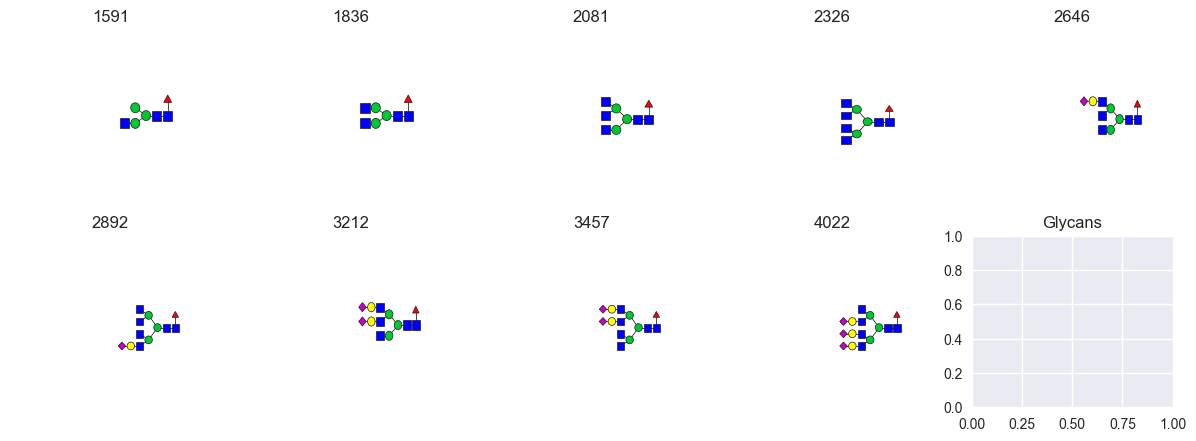

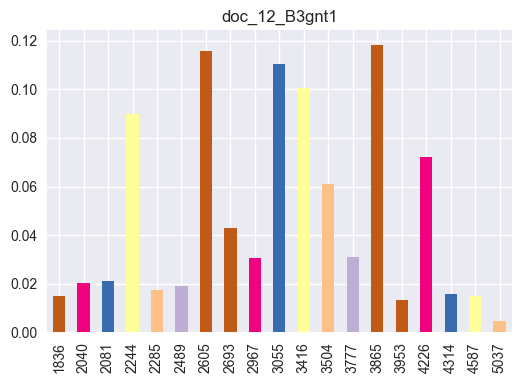

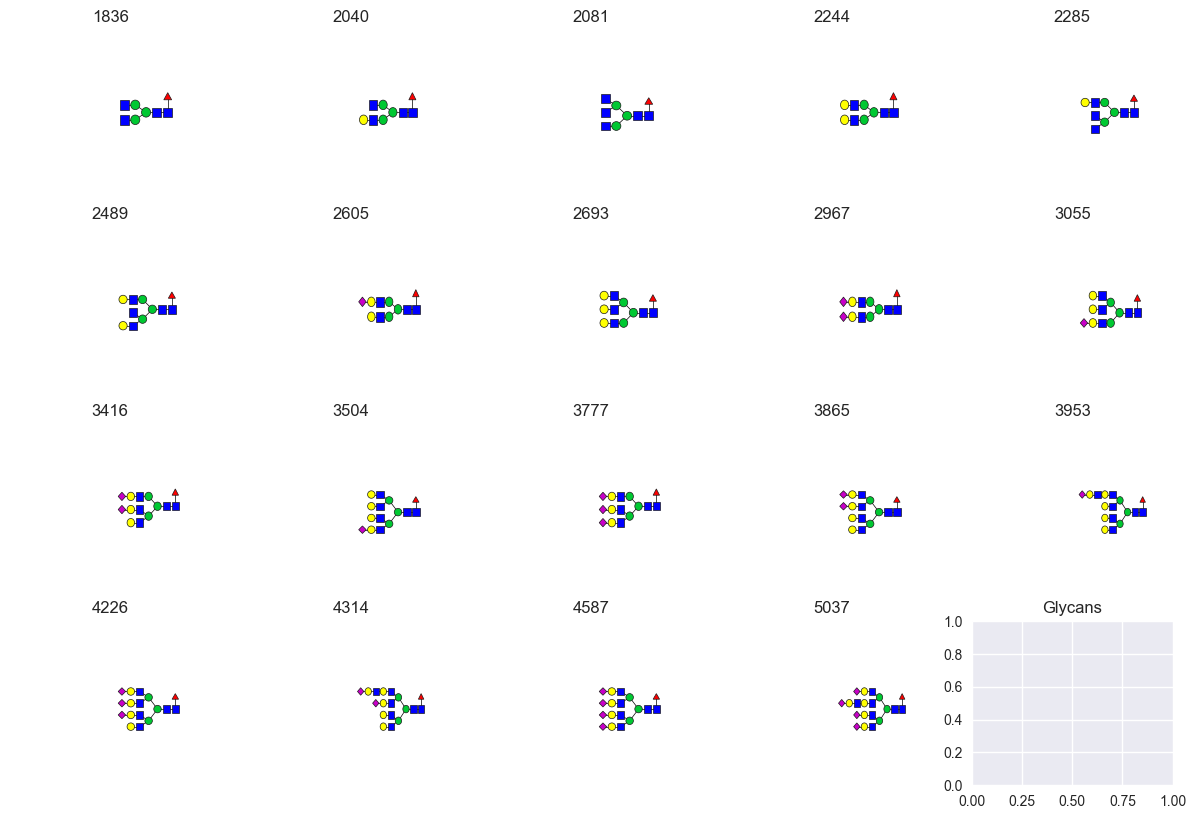

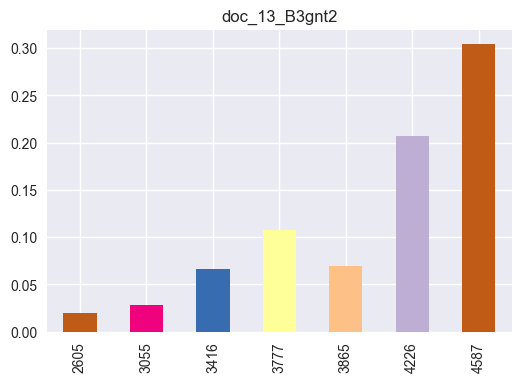

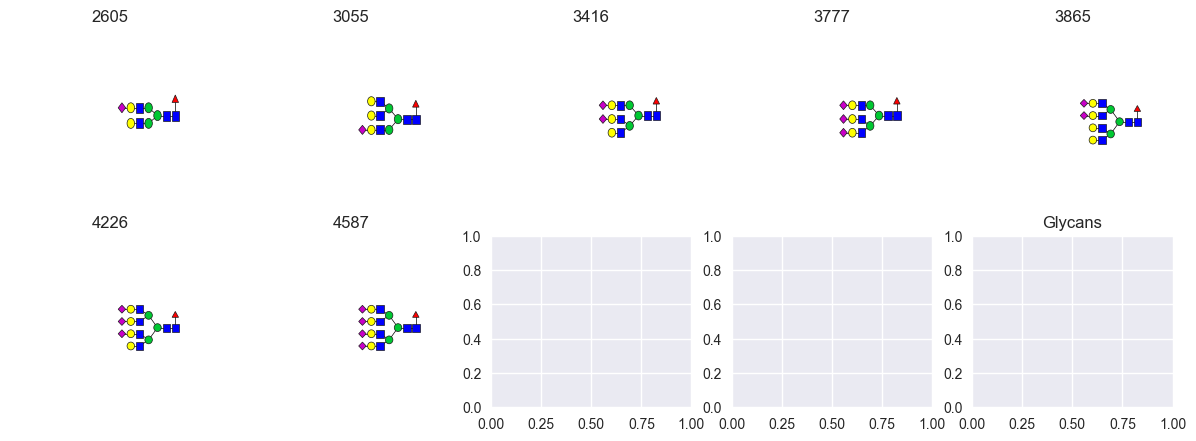

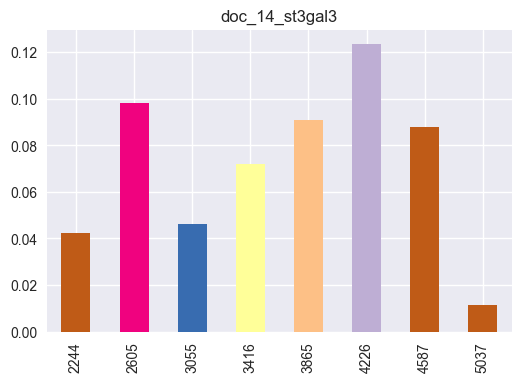

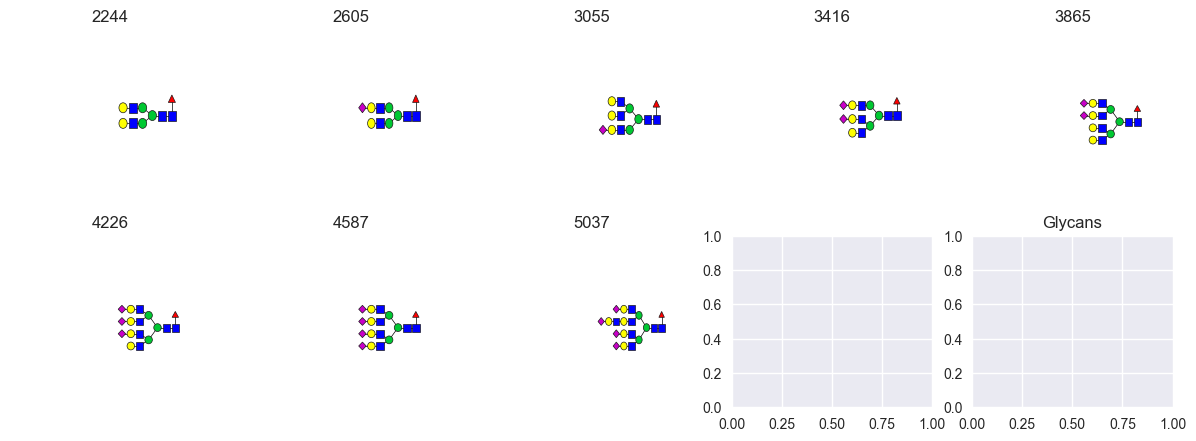

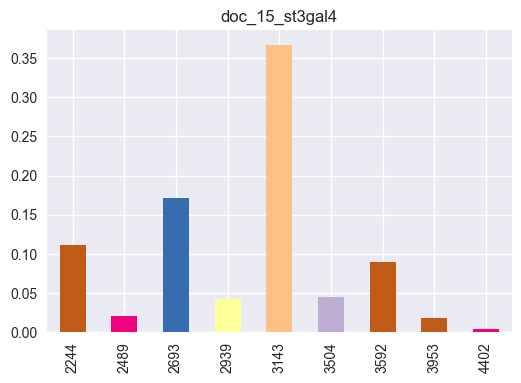

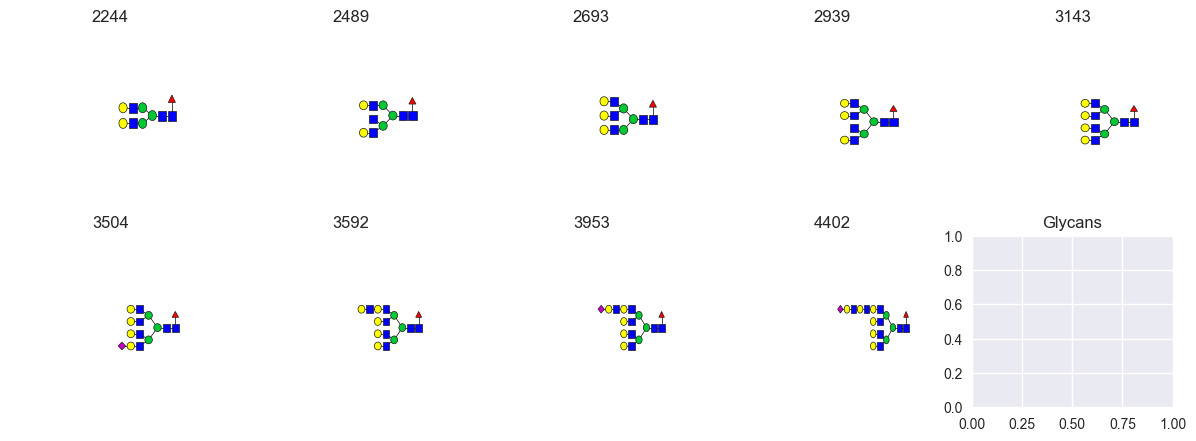

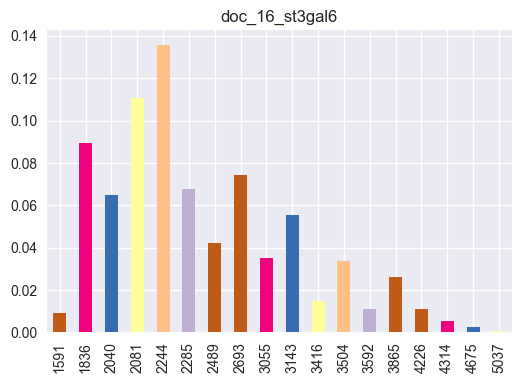

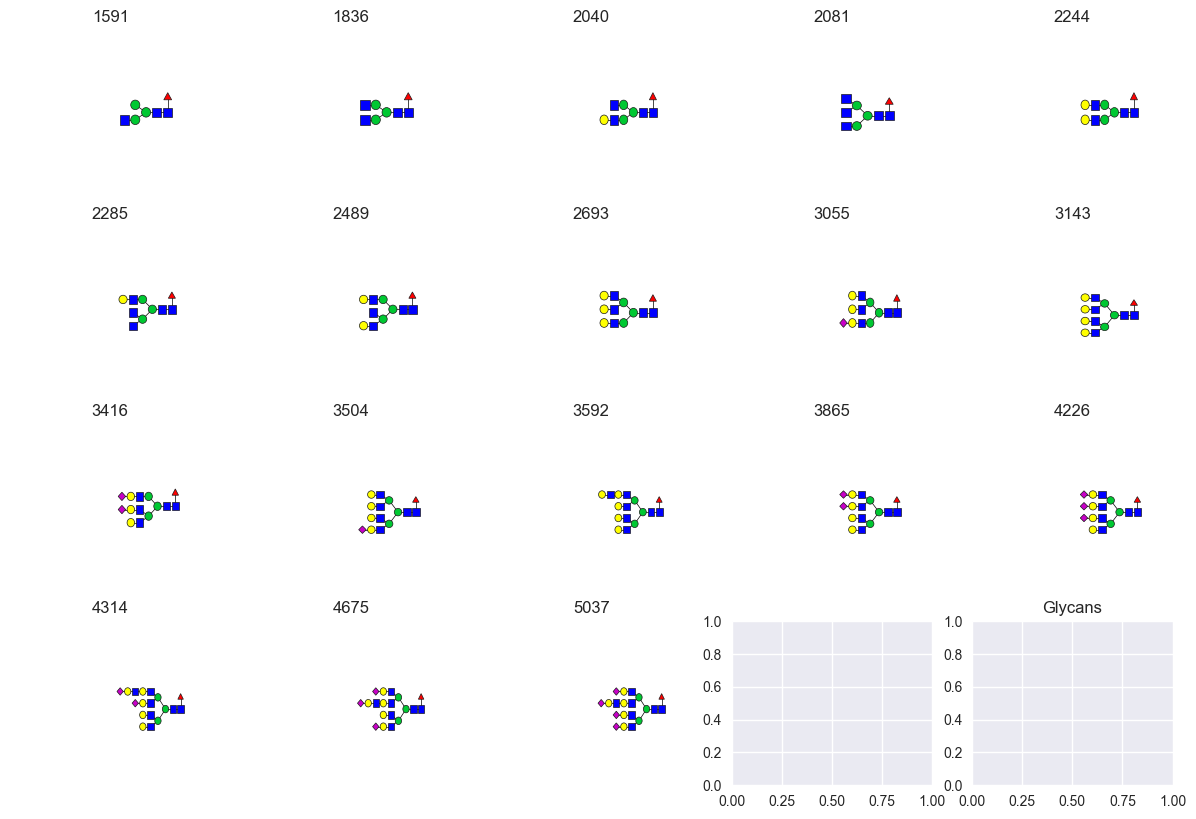

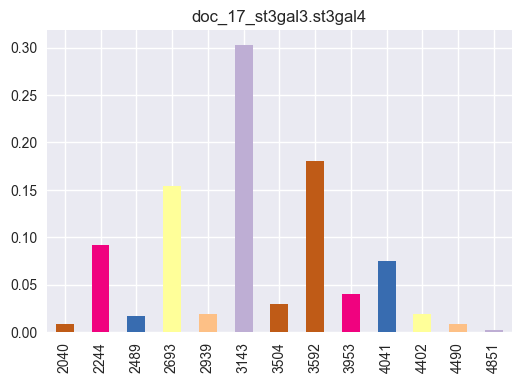

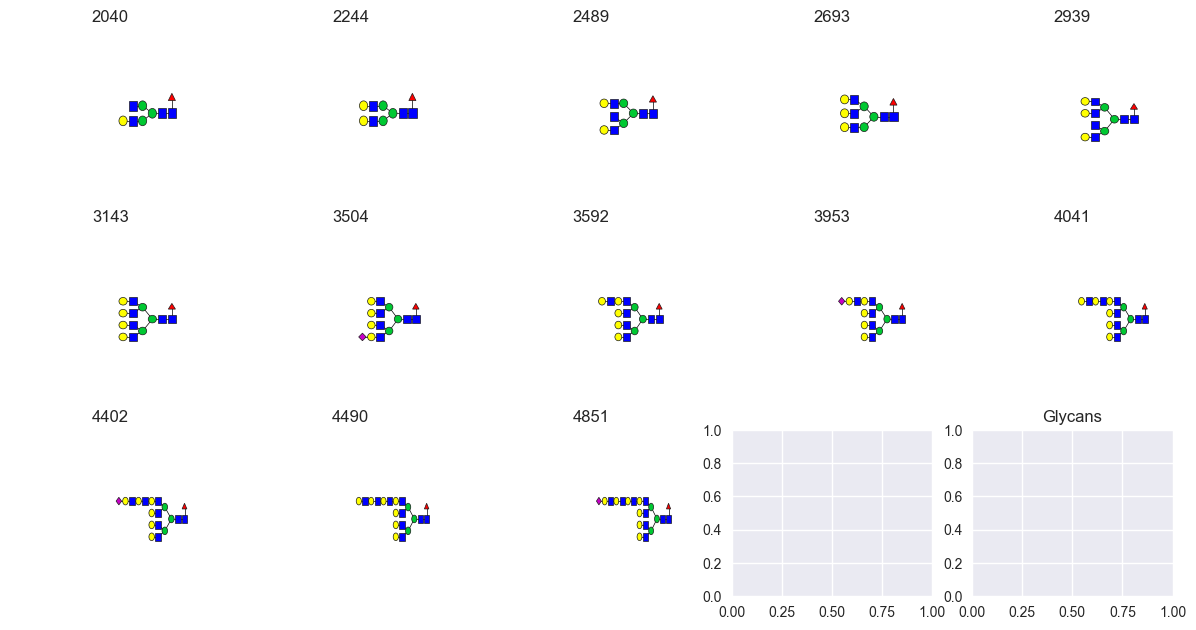

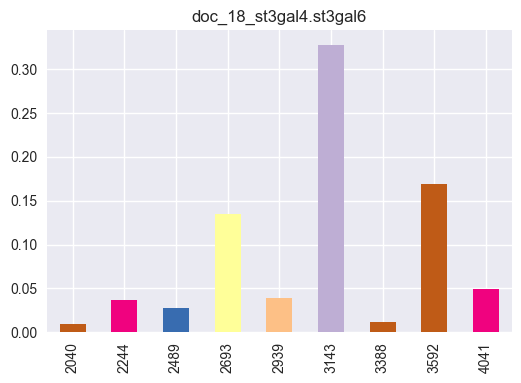

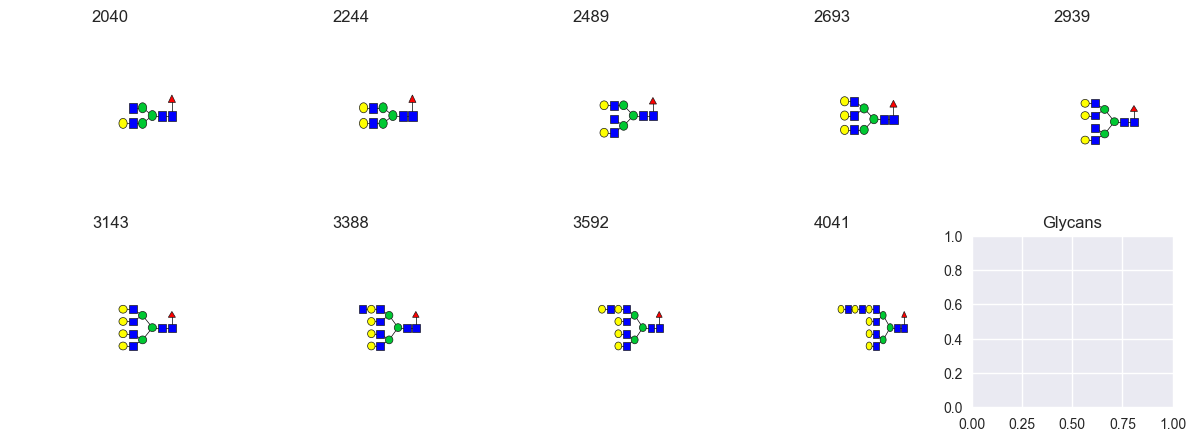

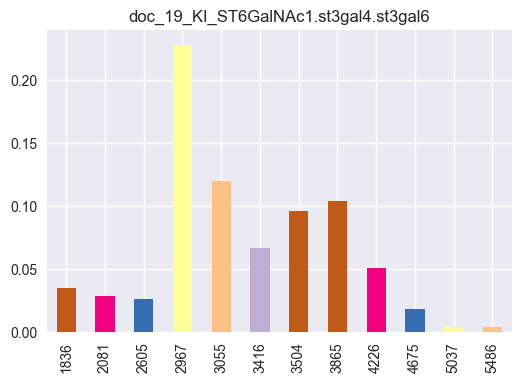

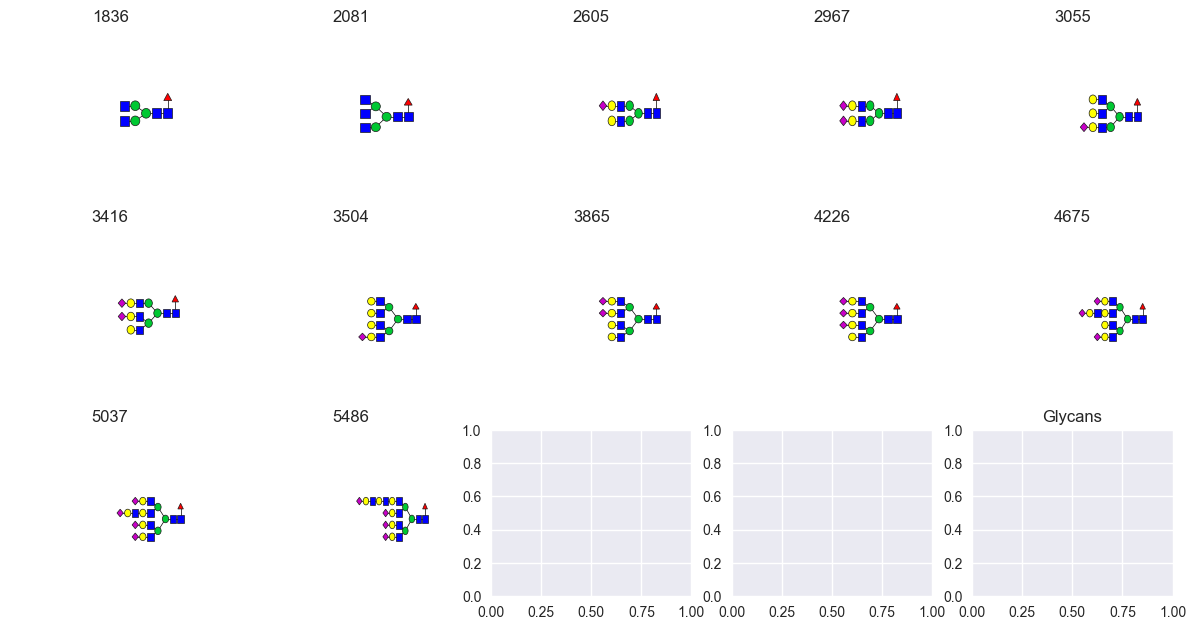

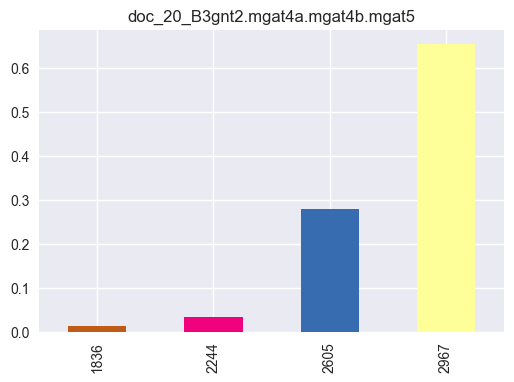

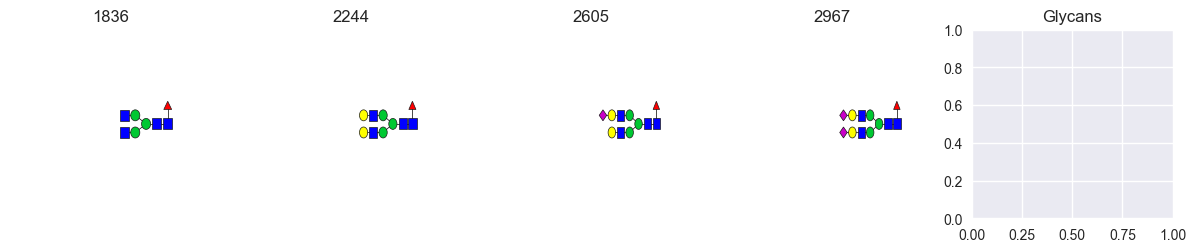

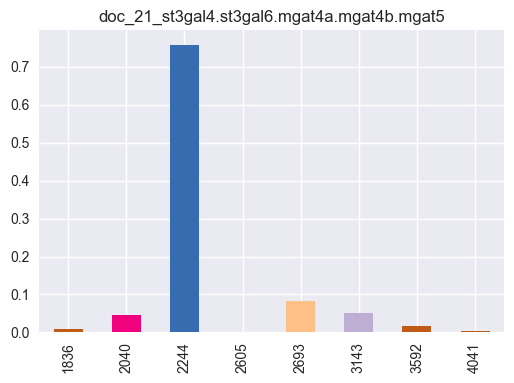

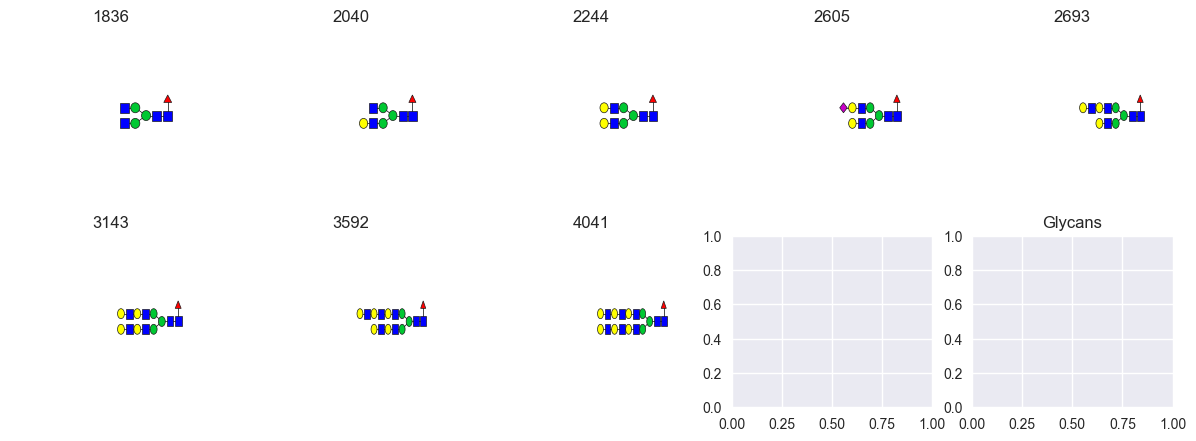

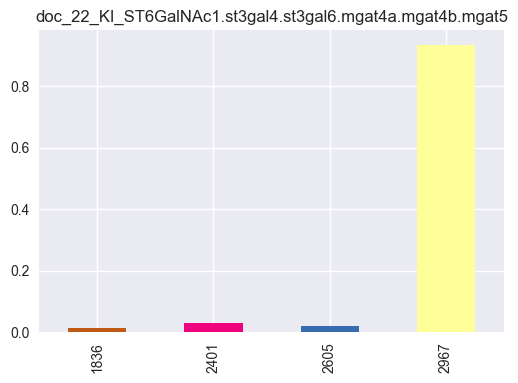

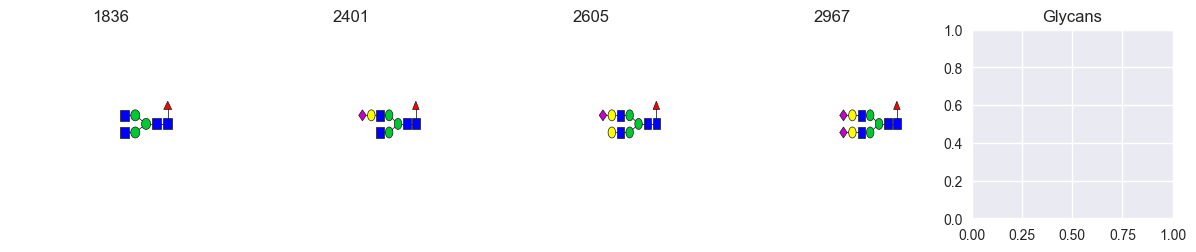

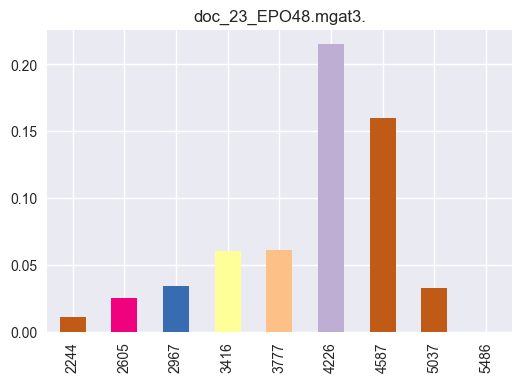

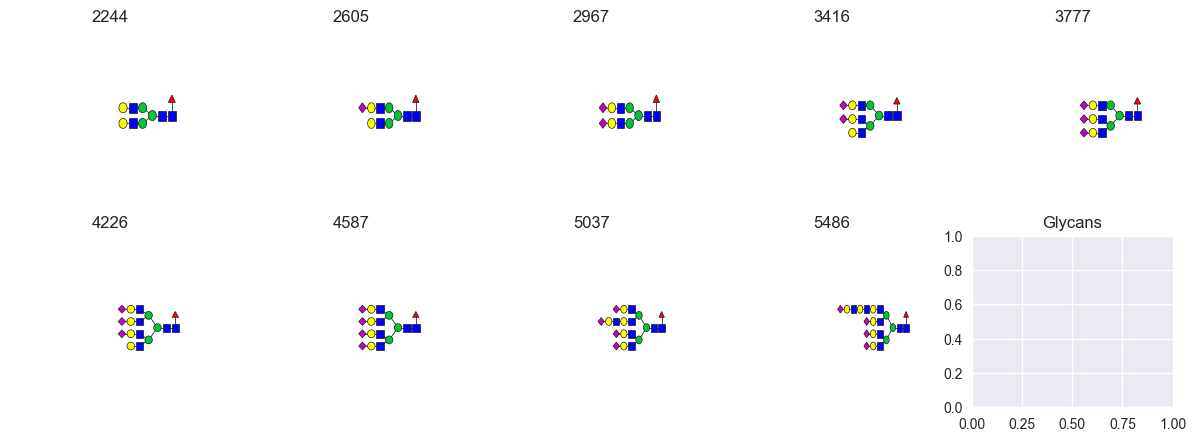

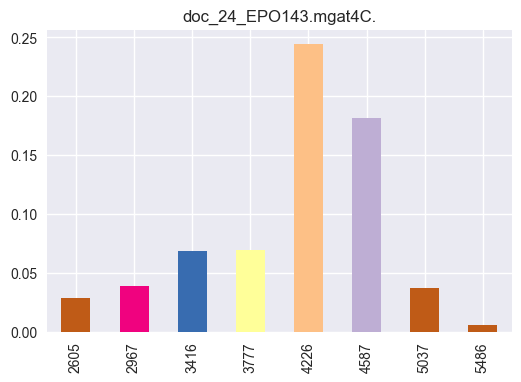

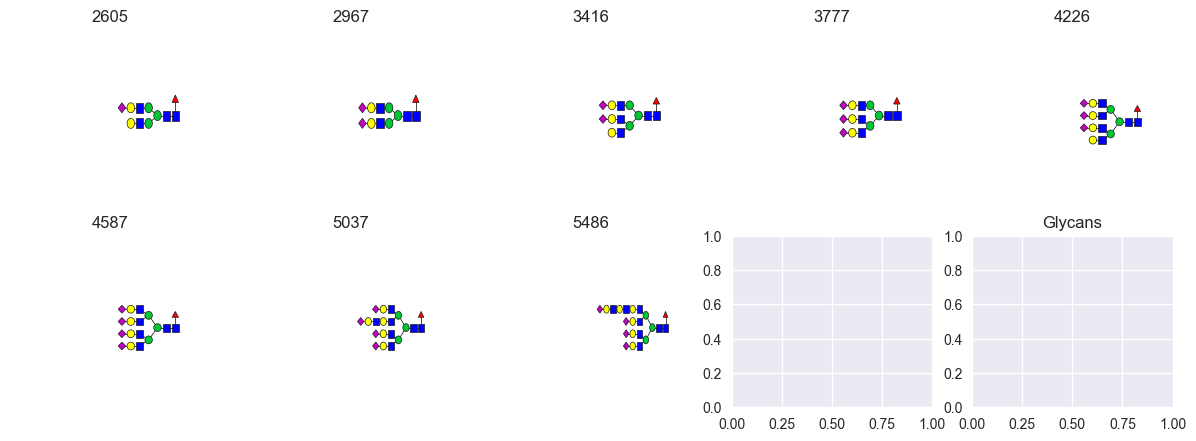

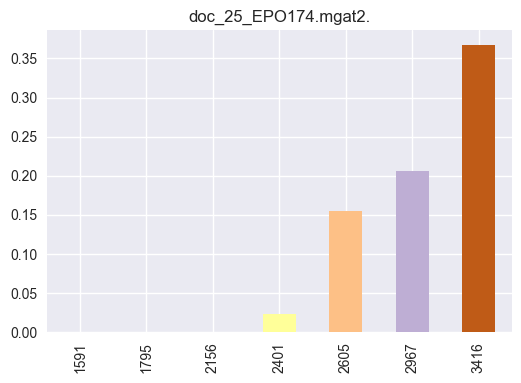

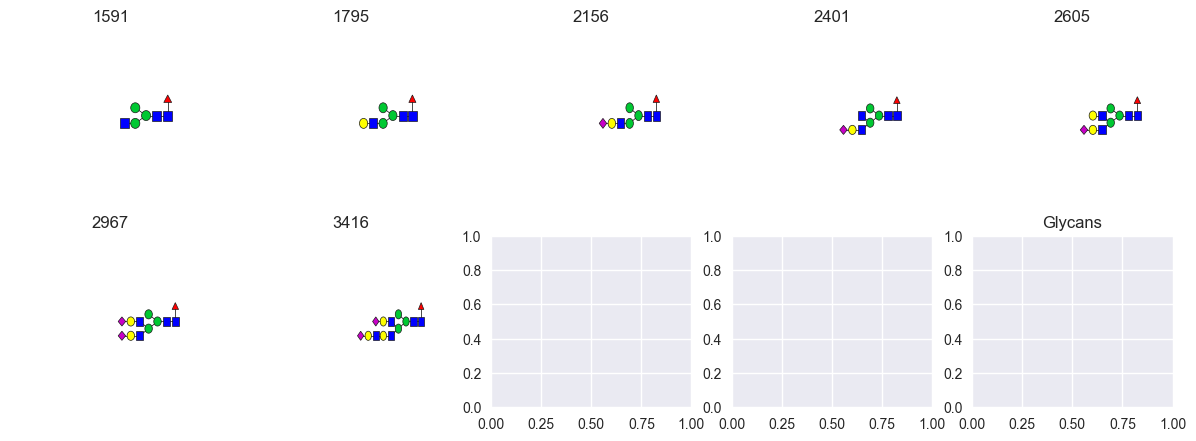

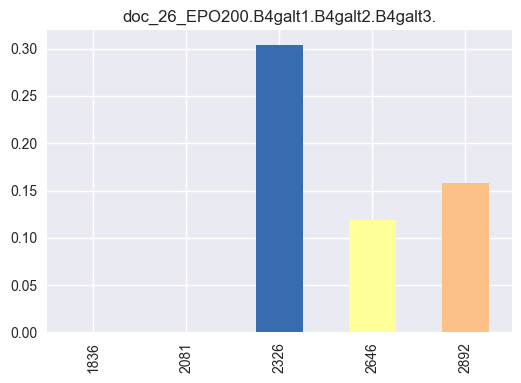

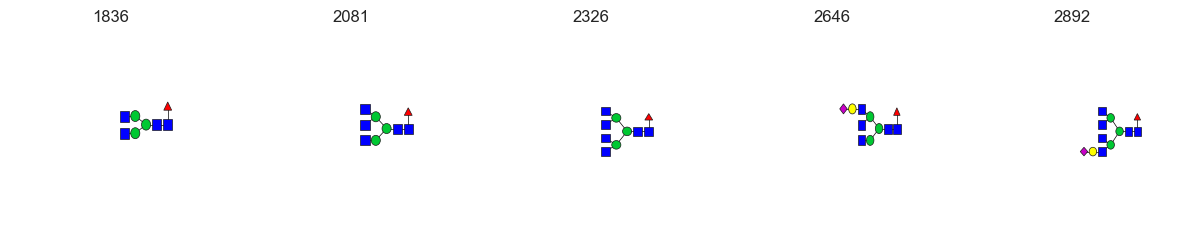

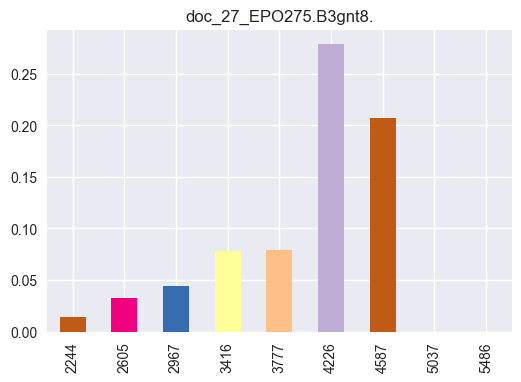

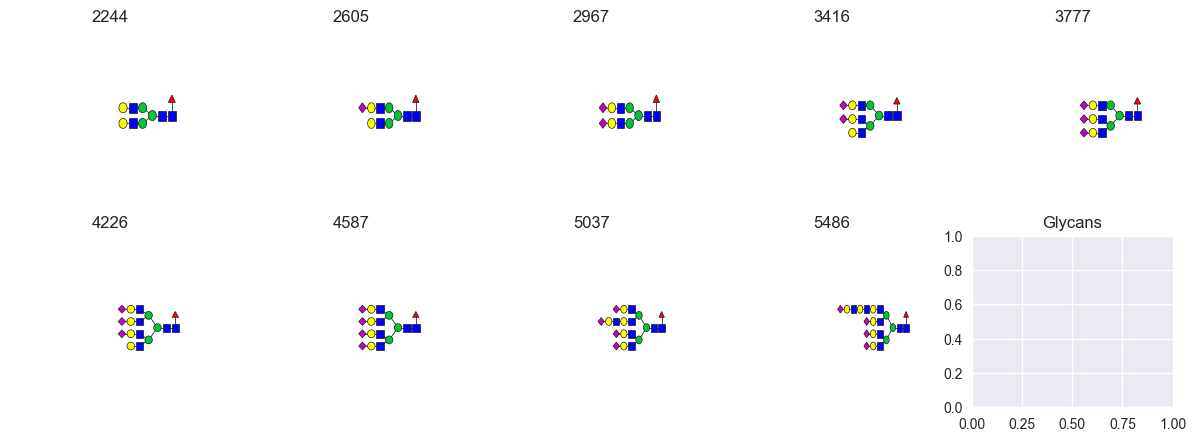

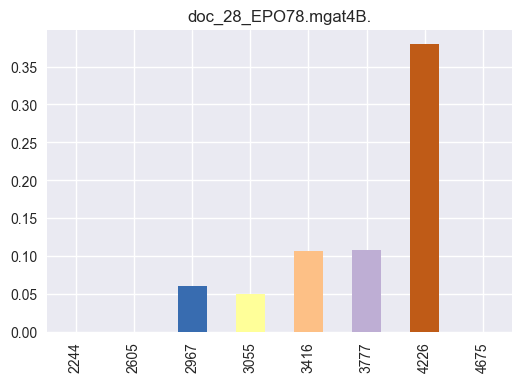

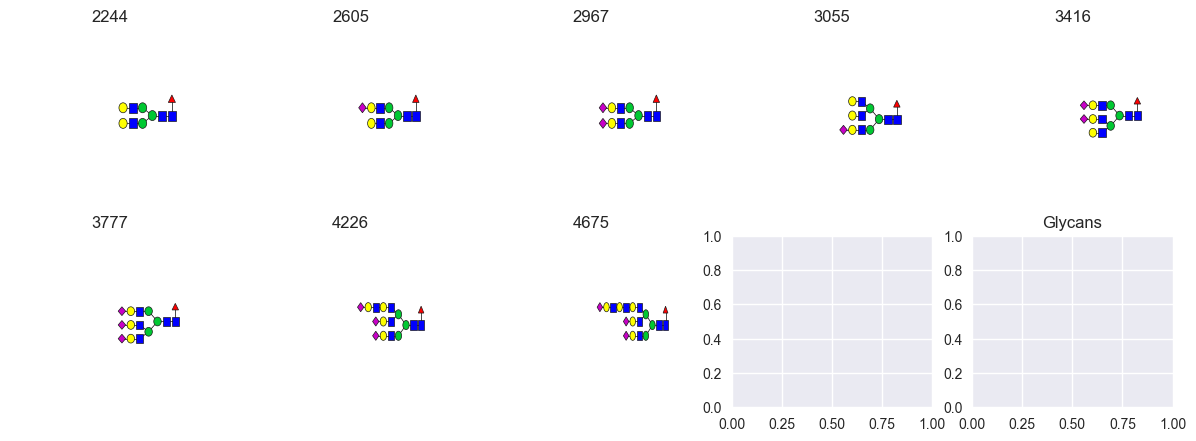

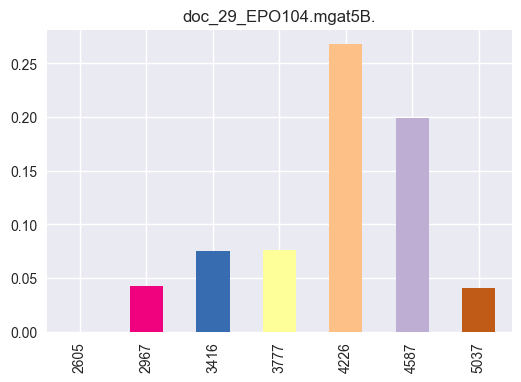

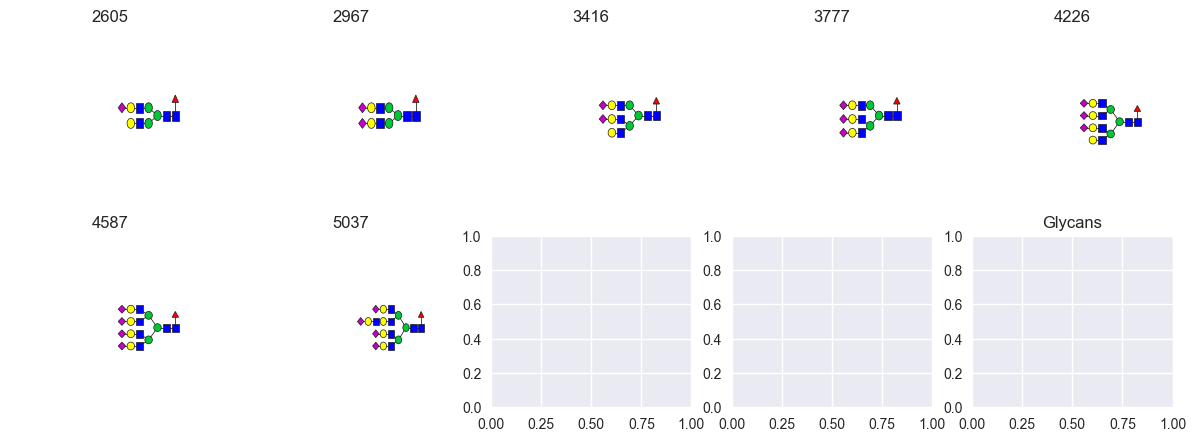

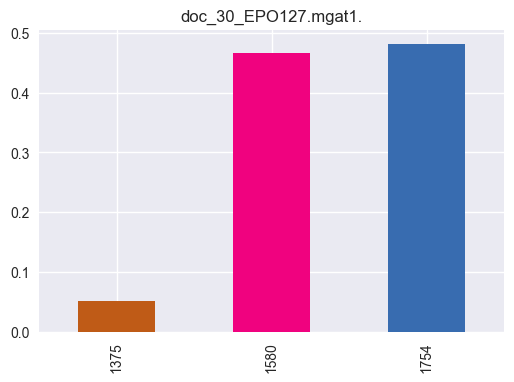

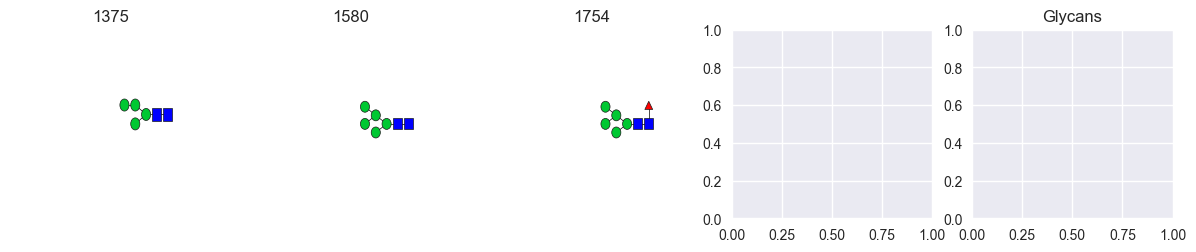

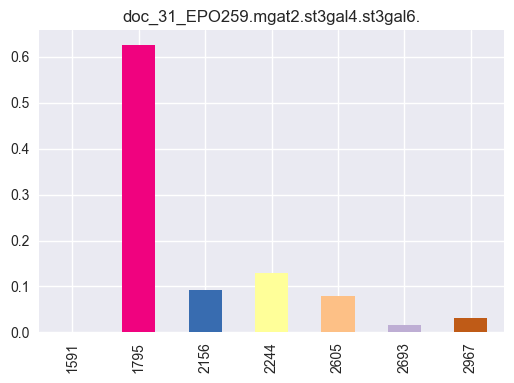

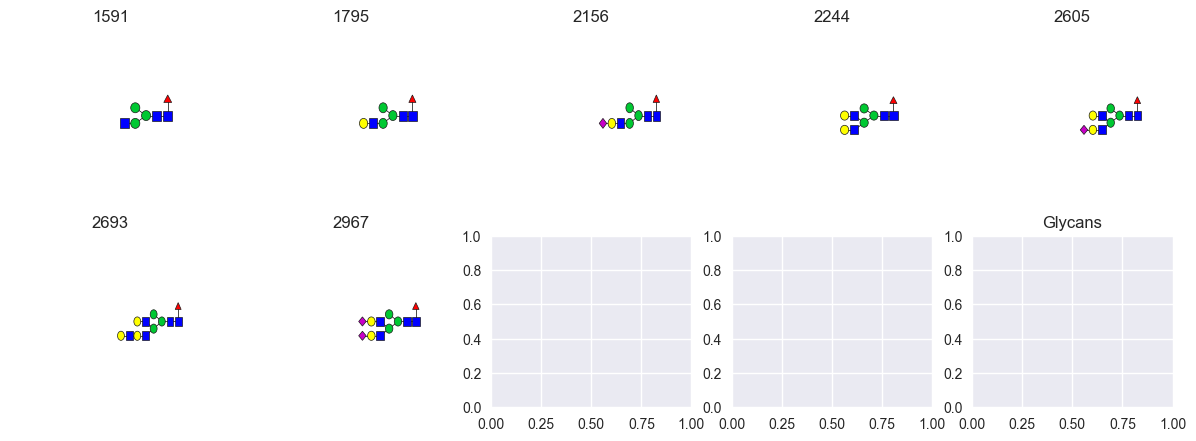

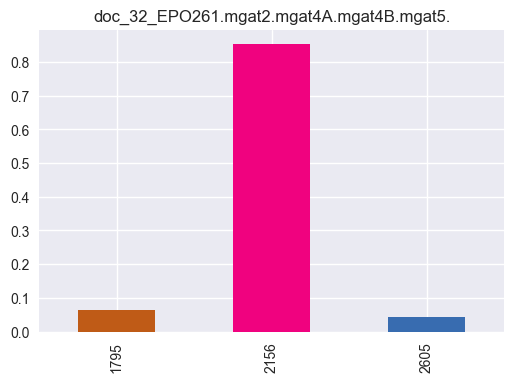

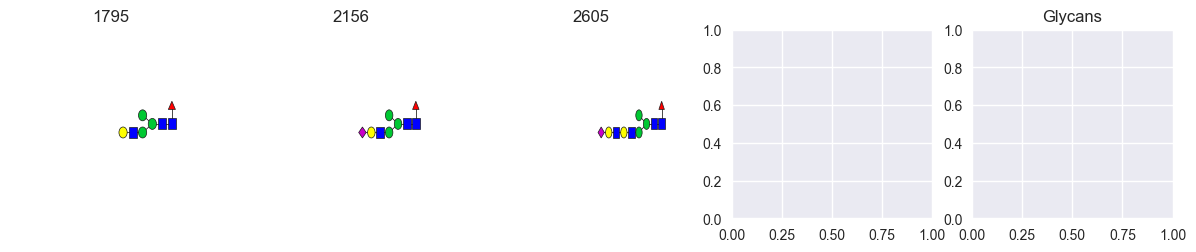

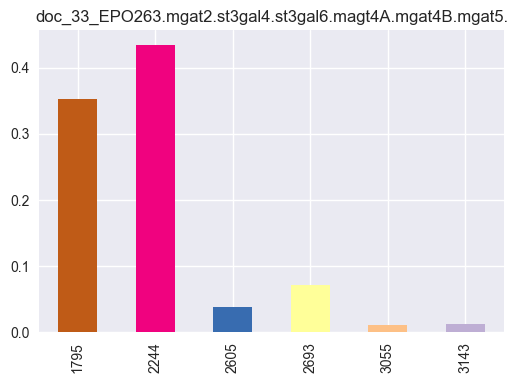

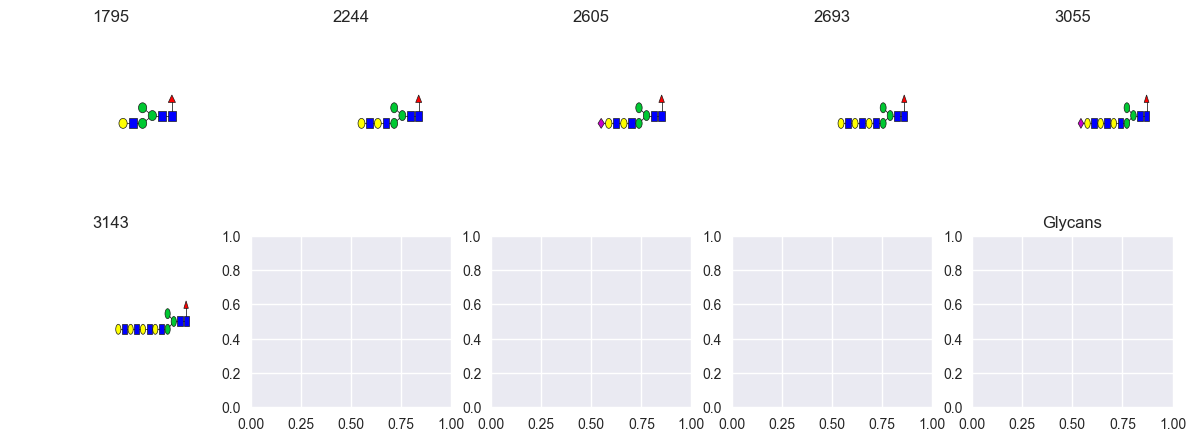

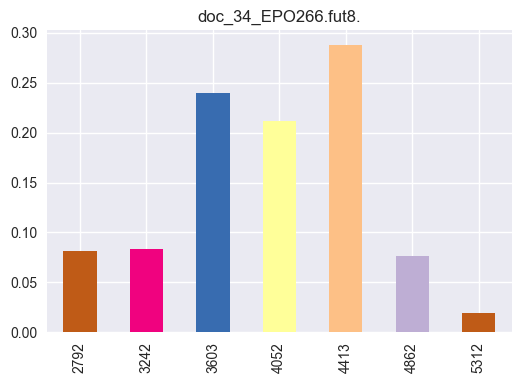

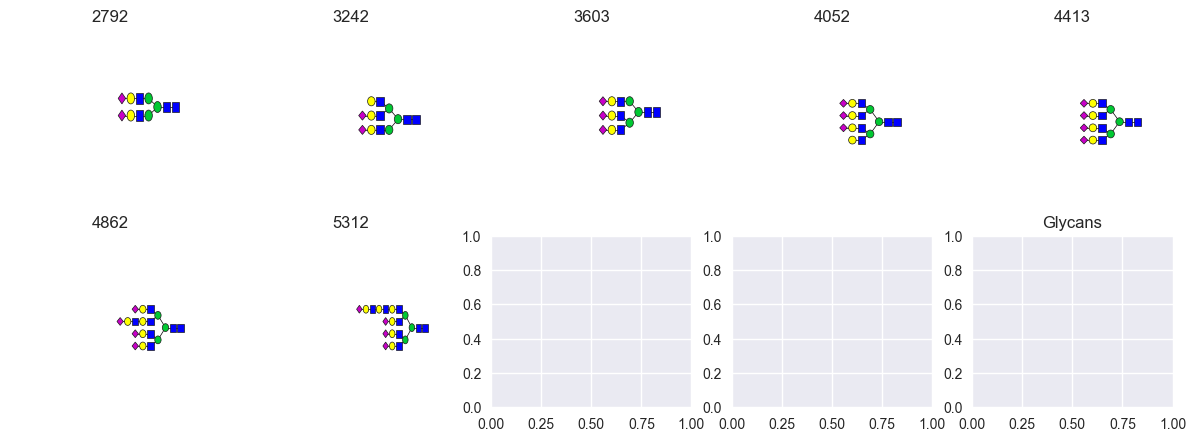

In [5]:
for i,j in enumerate(glycoprofile_list):
#     print('profile', i)
    pd.Series({mz:id_ for mz, id_ in zip(glycoprofile_list[i].mz_id_list, glycoprofile_list[i].relative_abundance)}).plot(kind='bar')
    plt.title("doc_"+str(glycoprofile_list[i].name)+ "_" + __init__.aaa_re[i])
    plt.savefig('/Users/apple/Desktop/NathanLab/NBT_Glycan_structure/Data_check_BNT/'+"doc_"+str(glycoprofile_list[i].name)+ "_" + __init__.aaa_re[i]+'.png')
    plot_glycan_utilities.plot_glycan_list([glycoct.loads(glycan_dict[i]) for i in glycoprofile_list[i].glycan_id_list], idex_list=glycoprofile_list[i].mz_id_list, addr='/Users/apple/Desktop/NathanLab/NBT_Glycan_structure/Data_check_BNT/'+"doc_substructure_"+str(glycoprofile_list[i].name)+ "_" + __init__.aaa_re[i]+'.png')
    plt.show()


In [1]:
feature_name = []
profile_name = []
name_list = ['WT',
          'mgat4A',
          'mgat4A.mgat4B',
          'mgat5',
          'mgat4A.mgat4B.mgat5',
          'B4GalT1',
          'B4GalT2',
          'B4GalT3',
          'B4GalT4',
          'B4GalT1.B4GalT2',
          'B4GalT1.B4GalT3',
          'B3gnt1',
          'B3gnt2',
          'st3gal3',
          'st3gal4',
          'st3gal6',
          'st3gal3.st3gal4',
          'st3gal4.st3gal6',
          'KI_ST6GalNAc1.st3gal4.st3gal6',
          'B3gnt2.mgat4a.mgat4b.mgat5',
          'st3gal4.st3gal6.mgat4a.mgat4b.mgat5',
          'KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5',
          'EPO48.mgat3.',
          'EPO143.mgat4C.',
          'EPO174.mgat2.',
          'EPO200.B4galt1.B4galt2.B4galt3.',
          'EPO275.B3gnt8.',
          'EPO78.mgat4B.',
          'EPO104.mgat5B.',
          'EPO127.mgat1.',
          'EPO259.mgat2.st3gal4.st3gal6.',
          'EPO261.mgat2.mgat4A.mgat4B.mgat5.',
          'EPO263.mgat2.st3gal4.st3gal6.magt4A.mgat4B.mgat5.',
          'EPO266.fut8.'
         ]
selected_profile = [30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
for i in selected_profile:
    profile_name.append(name_list[i-1])
    for j in glycoprofile_list[i-1].glycan_id_list:
        feature_name.append(j)

feature_name = list(set(feature_name))
print(feature_name)
print(selected_profile)
print(profile_name)

NameError: name 'glycoprofile_list' is not defined

In [13]:
abundance_table = np.zeros((len(feature_name), len(selected_profile)))
for i in range(len(selected_profile)):
    _profile_idex = selected_profile[i]-1
    _profile_dict = dict(zip(glycoprofile_list[_profile_idex].glycan_id_list, glycoprofile_list[_profile_idex].relative_abundance))
    
    for j in range(len(feature_name)):
        if feature_name[j] in _profile_dict:
            abundance_table[j,i] = _profile_dict[feature_name[j]]
index_list = []
for i in range(len(abundance_table)):
    if sum(abundance_table[i,:])!=0:
        index_list.append(i)
# len(index_list)
abundance_table = abundance_table[index_list,:]
feature_name=[feature_name[i] for i in index_list]
pd_table = pd.DataFrame(abundance_table, columns=profile_name, index=feature_name)
# pd_table

{}

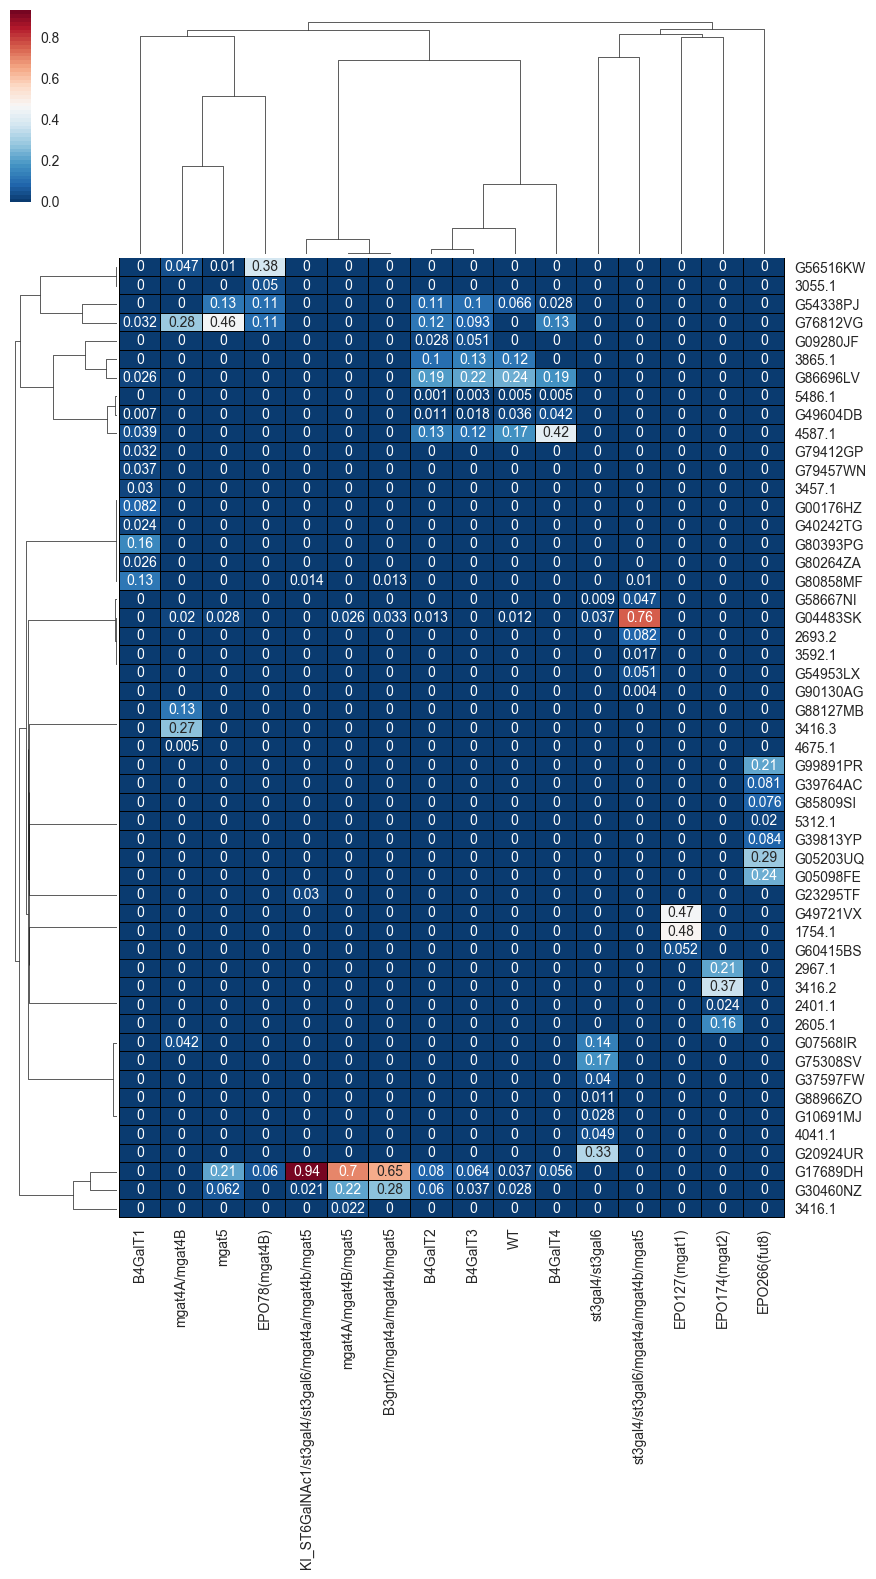

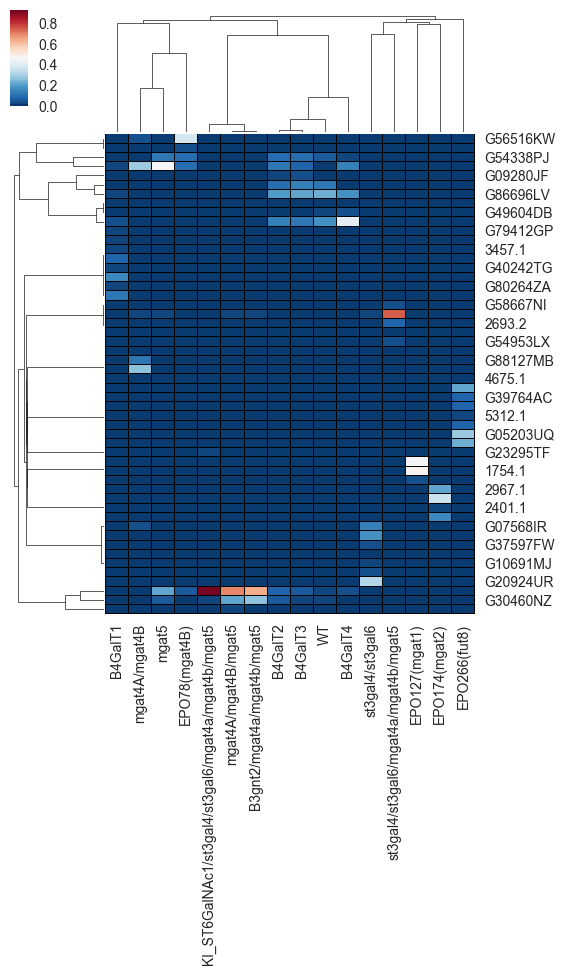

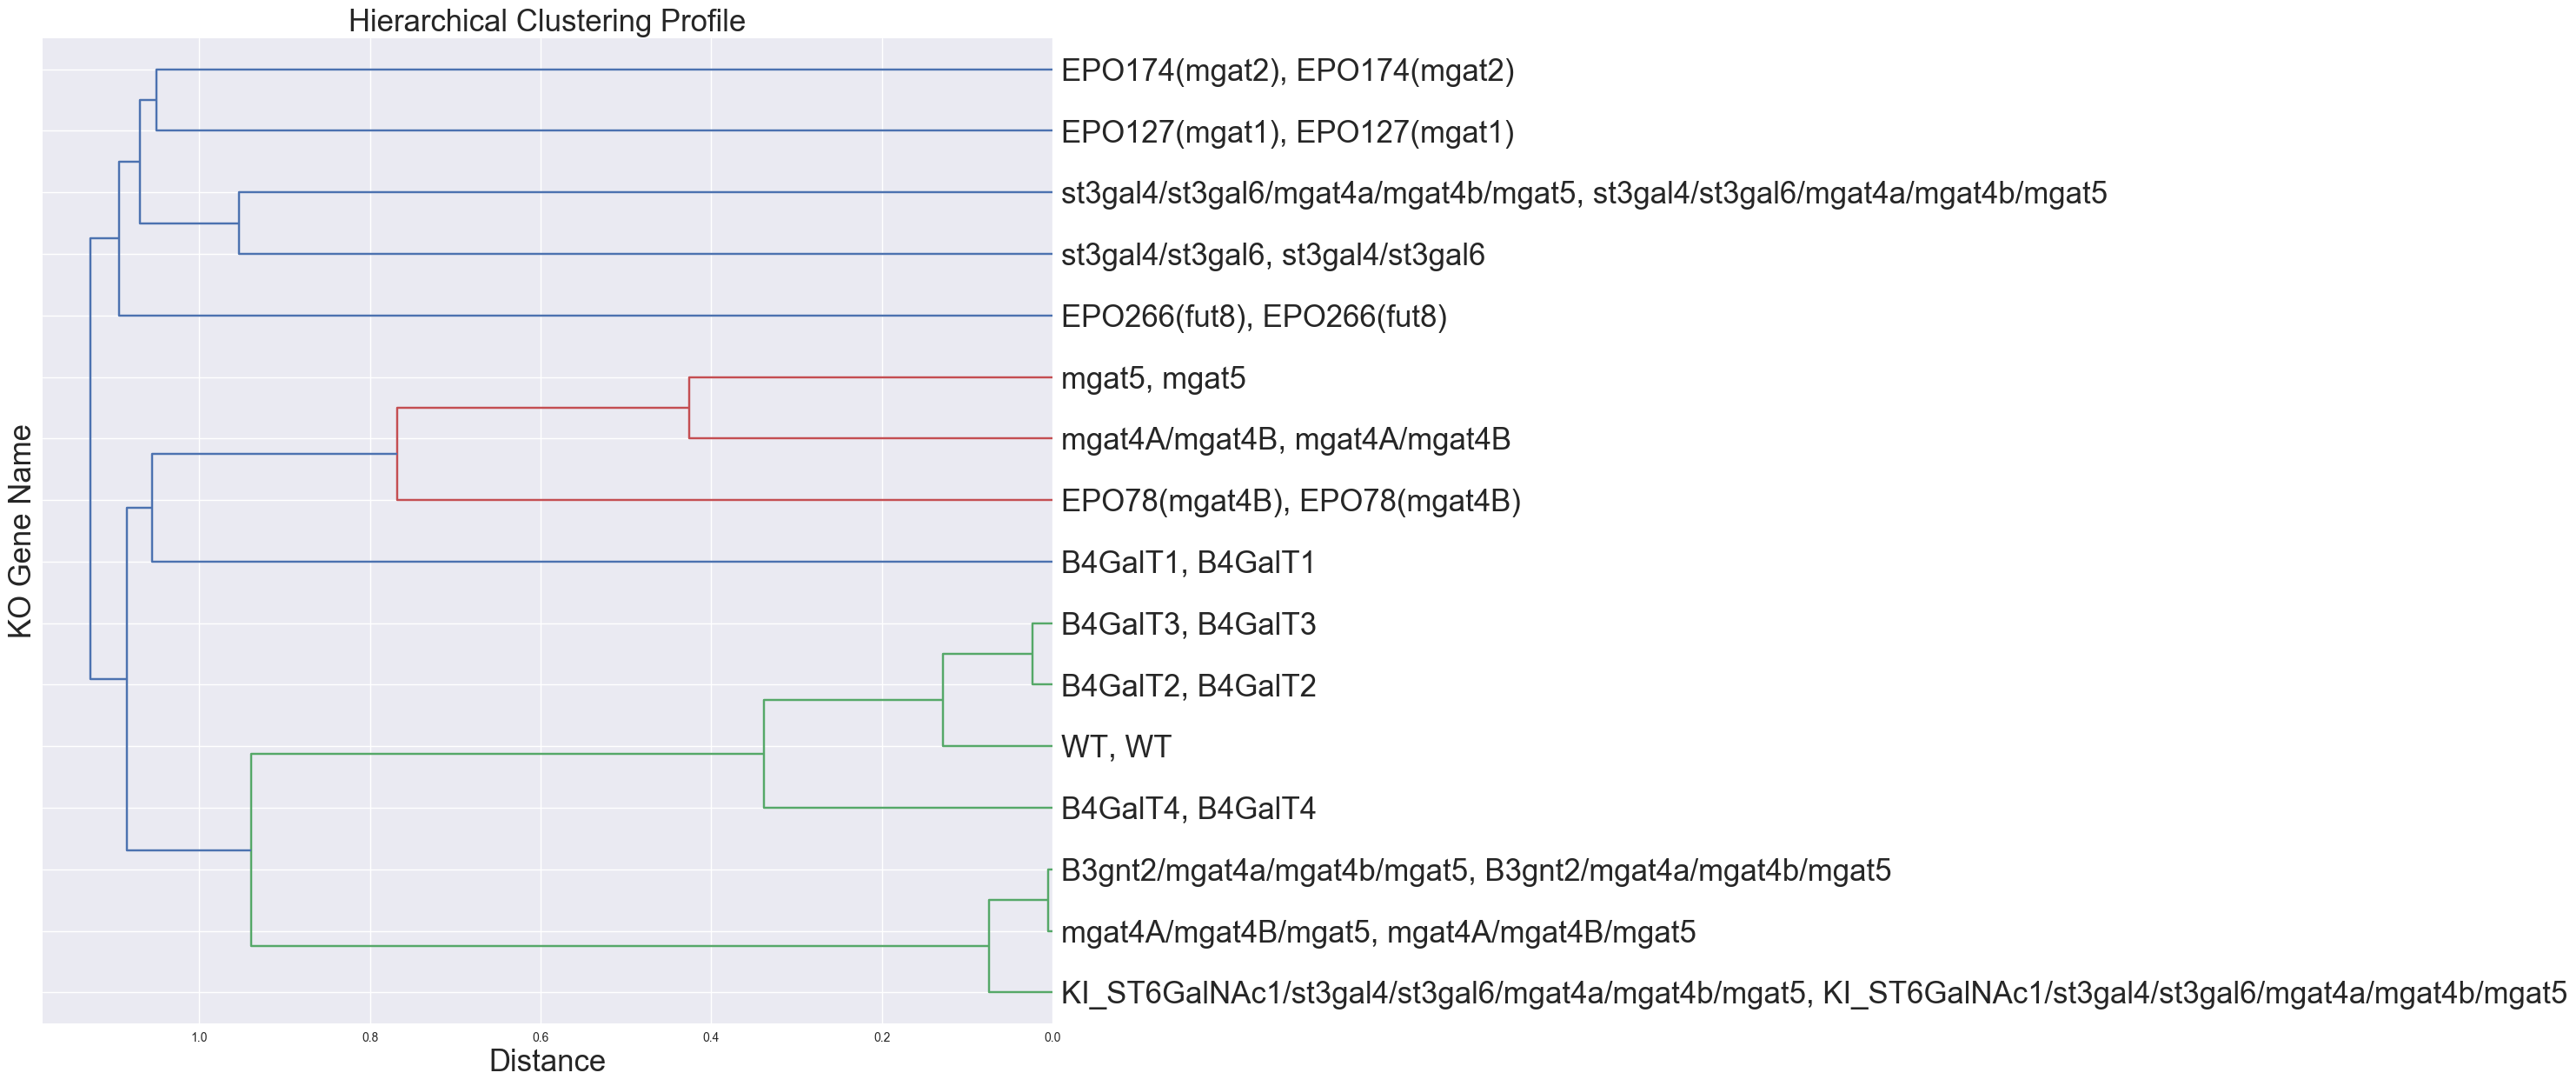

In [24]:
name_prefix = 'full_glycan'
reload(clustering_analysis_pip)
reload(__init__)

cmap = sns.color_palette("RdBu_r", 50)
g = sns.clustermap(pd_table.round(3), metric="correlation",cmap=cmap, linewidths=.01,annot=True, figsize=(10,16),linecolor='black',method='complete')
plt.savefig('/Users/apple/PycharmProjects/Glycompare/Figure/Figure2_CHO/raw_glycan_cluster.eps')
g = sns.clustermap(pd_table.round(3), metric="correlation",cmap=cmap, linewidths=.01,annot=False, figsize=(6,8),linecolor='black',method='complete')
plt.savefig('/Users/apple/PycharmProjects/Glycompare/Figure/Figure2_CHO/raw_glycan_cluster_no_anno.eps')
clustering_analysis_pip.draw_profile_cluster(g, pd_table, profile_name, name_prefix, color_threshold=0.95)

In [60]:
_motif_lab = motif_class.MotifLab(json_utility.load_json(__init__.merged_motif_dict_addr)) # unicarbkb_motifs_12259.json
match_dict

<class 'str'>


{'1417.1': [3,
  0,
  0,
  1,
  2,
  0,
  1,
  0,
  0,
  1,
  1,
  2,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  2,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


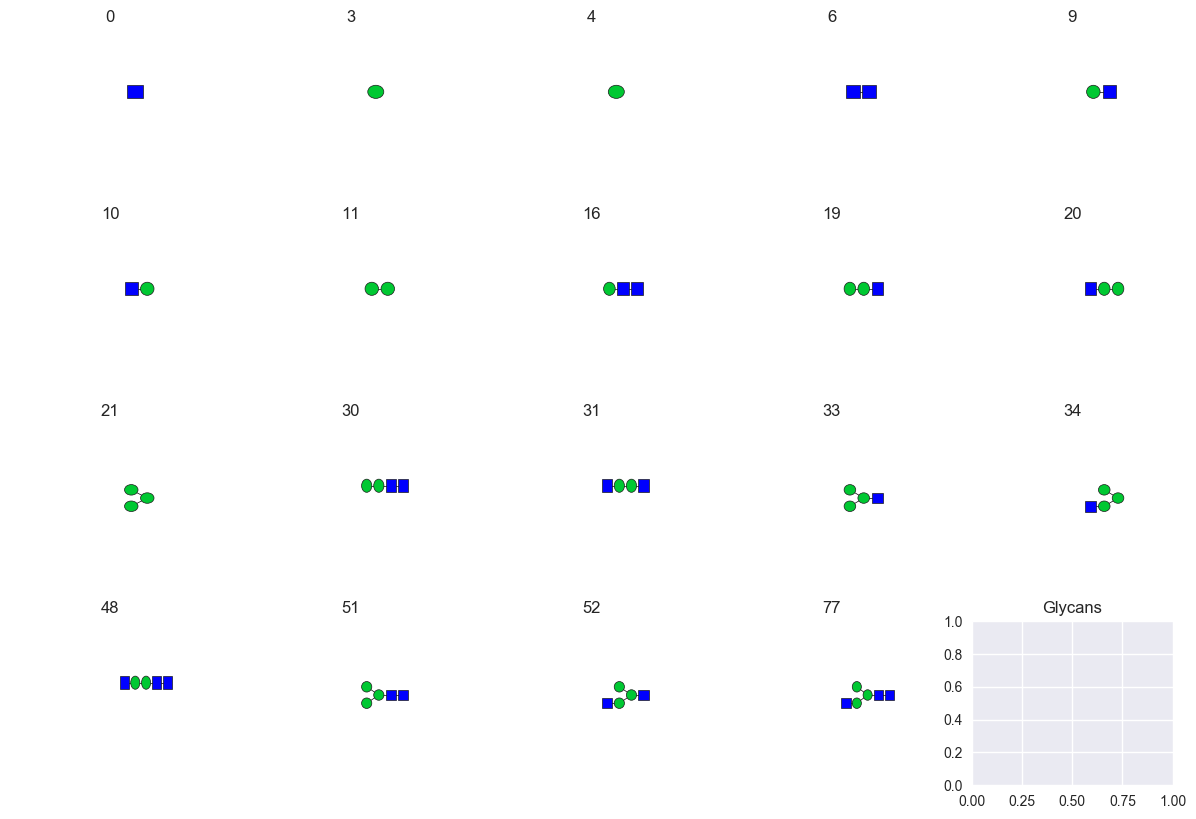

In [66]:
_list = []
for i,j in enumerate(match_dict['1417.1']):
    if j > 0:
        _list.append(i)
_motif_vec = _motif_lab.motif_vec
plot_glycan_utilities.plot_glycan_list([_motif_vec[i] for i in _list], idex_list=_list, addr='/Users/apple/27_selected_profile/motif_vec.eps')
#     match_dict nglycan_motif_lab

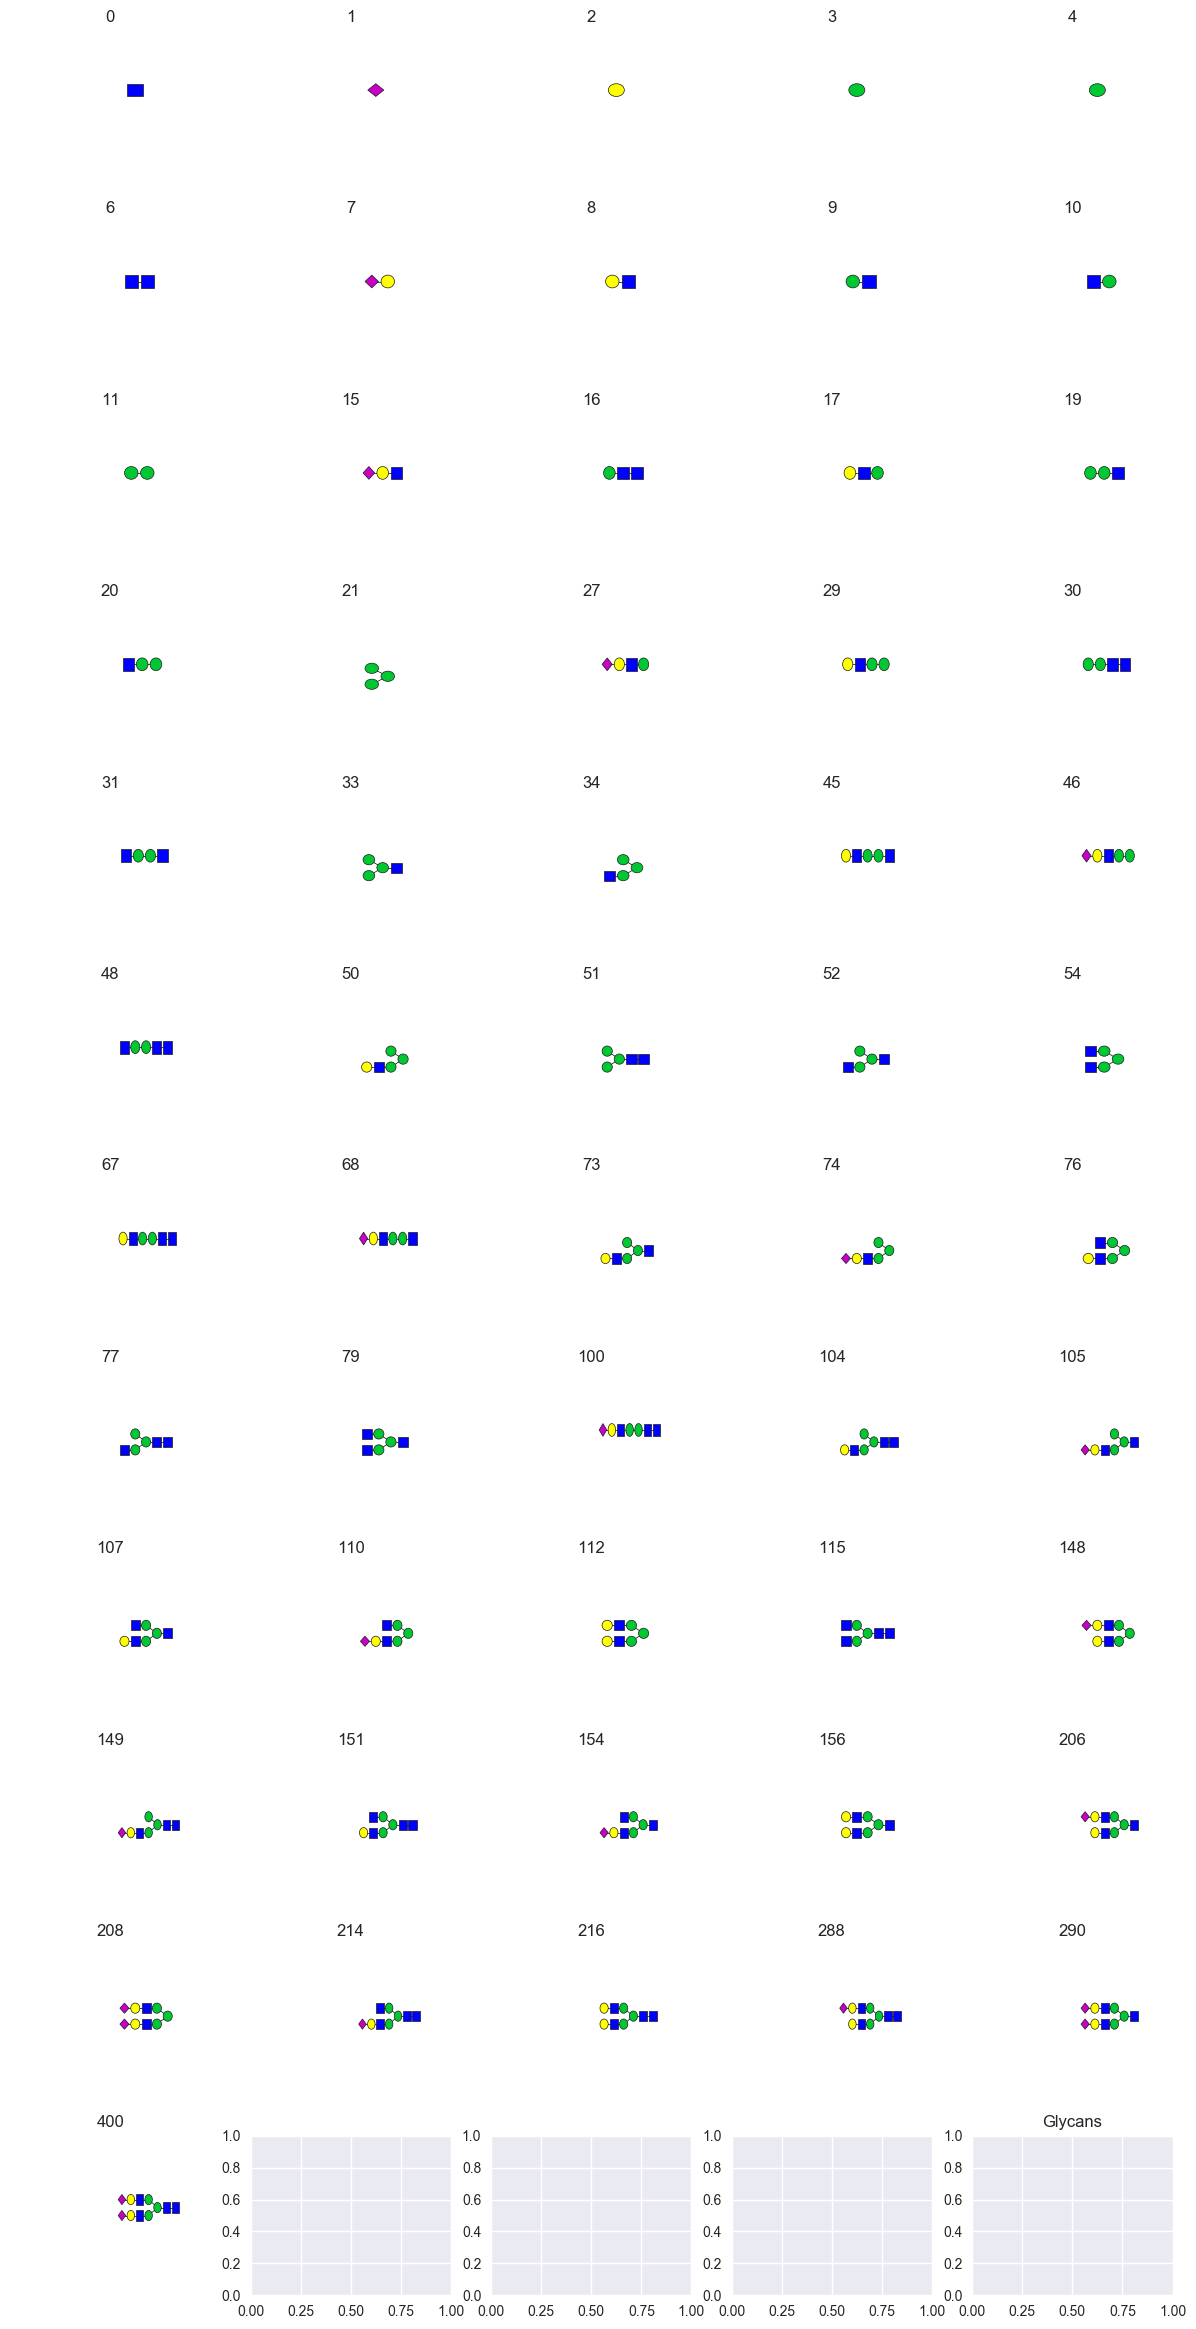

In [73]:
_list = []
for i,j in enumerate(match_dict['G39764AC']):
    if j > 0:
        _list.append(i)
_motif_vec = _motif_lab.motif_vec
plot_glycan_utilities.plot_glycan_list([_motif_vec[i] for i in _list], idex_list=_list, addr='/Users/apple/27_selected_profile/motif_vec_G39764AC.eps')
